In [1]:

%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>


# EDA

## IMPORTING dataset (**df**)

In [1]:
# Specify the file path with double backslashes

#PC_ 'D:\\P.Projects\\PIRAMAL\\SECTORAL ANALYSIS\\2.FINANCIAL\\.Factors identified\\FINANCE DS.xlsx'
#laptop_ 'D:\\SECTORAL ANALYSIS\\2.FINANCIAL\\.Factors identified\\FINANCE DS.xlsx'

file_path = 'A:\\ISI\\PLACEMENT\\.PIRAMAL\\P.Projects\\PIRAMAL\\SECTORAL ANALYSIS\\2.FINANCIAL\\.Factors identified\\FINANCE DS.xlsx'

### Trim spaces remove (,) from cells and set Index

In [2]:
import pandas as pd

# Load required sheet from above excel file
df = pd.read_excel(file_path, sheet_name='Q_DS')

# Trim spaces from column headers
df.columns = df.columns.str.strip()

# Loop through each column and perform the operations
for column in df.columns:
    if column != "Years":
        # Remove commas from the values and convert to float (if applicable)
        if df[column].dtype == object or df[column].dtype == str:
            df[column] = df[column].str.replace(',', '').astype(float)

# Change values in "Quarter ended" column to end of month dates
df["Quarter ended"] = pd.to_datetime(df["Quarter ended"]) + pd.offsets.MonthEnd(0)

# Rename col[0] as Quarters
df.rename(columns={df.columns[0]: 'Quarters'}, inplace=True)

# Set "Quarters" column as the index
df.set_index('Quarters', inplace=True)

# Convert index to DatetimeIndex if needed
df.index = pd.to_datetime(df.index)

# Set a frequency for the index
df.index.freq = 'Q'  # Replace 'D' with your desired frequency

df


SCB count Rural  SCB count Semi-Urban  SCB count Urban  \
Quarters                                                             
2008-03-31          30732.0               17212.0          26382.0   
2008-06-30          30955.0               17771.0          27277.0   
2008-09-30          31117.0               18096.0          27856.0   
2008-12-31          31204.0               18329.0          28217.0   
2009-03-31          31489.0               18764.0          28803.0   
...                     ...                   ...              ...   
2022-03-31          53069.0               42532.0          55719.0   
2022-06-30          53262.0               42911.0          56357.0   
2022-09-30          53355.0               43052.0          56630.0   
2022-12-31          53640.0               43391.0          57056.0   
2023-03-31              NaN                   NaN              NaN   

            Liabilities to the  banking system Rs. Million  \
Quarters                                                     
2008-03-31                                             NaN   
2008-06-30                                       1123514.2   
2008-09-30                                       1062924.7   
2008-12-31                                       1040083.1   
2009-03-31                                       1001155.1   
...                                                    ...   
2022-03-31                                       2586490.0   
2022-06-30                                       2814480.0   
2022-09-30                                       2985280.0   
2022-12-31                                       3262940.0   
2023-03-31                                       3518430.0   

            Liabilities to  others Rs. Million  \
Quarters                                         
2008-03-31                                 NaN   
2008-06-30                          36722497.4   
2008-09-30                          38482005.1   
2008-12-31                          40014319.6   
2009-03-31                          42555662.5   
...                                        ...   
2022-03-31                         173807550.0   
2022-06-30                         176038930.0   
2022-09-30                         187260010.0   
2022-12-31                         189268660.0   
2023-03-31                         192788940.0   

            Borrowings from RBI Rs. Million  \
Quarters                                      
2008-03-31                              NaN   
2008-06-30                          30961.4   
2008-09-30                          60944.4   
2008-12-31                         135161.8   
2009-03-31                         117279.2   
...                                     ...   
2022-03-31                         942990.0   
2022-06-30                         945140.0   
2022-09-30                        1125210.0   
2022-12-31                        1274720.0   
2023-03-31                        1650850.0   

            Cash in hand and balances with RBI Cash in hand  \
Quarters                                                      
2008-03-31                                              NaN   
2008-06-30                                         192350.1   
2008-09-30                                         234815.3   
2008-12-31                                         232260.7   
2009-03-31                                         202806.7   
...                                                     ...   
2022-03-31                                         859260.0   
2022-06-30                                        1015250.0   
2022-09-30                                        1087430.0   
2022-12-31                                         986150.0   
2023-03-31                                         902630.0   

            Cash in hand and balances with RBI  \
Quarters                                         
2008-03-31                                 NaN   
2008-06-30                           3059627.3   
2008-09-30 

In [3]:
target_text = "Net liquidity  injected  (outstanding  including today's  operations)  [injection  (+)/absorption (-)]  Rs. Million wrt RBI"
new_column_text = "Net liquidity  injected Rs. Million wrt RBI"

# Find the column header with the specified text
target_column = None
for column in df.columns:
    if target_text in column:
        target_column = column
        break

# Replace the column header with the new text (if found)
if target_column is not None:
    df.rename(columns={target_column: new_column_text}, inplace=True)
    print("Column header replaced:", new_column_text)
else:
    print("Column header not found.")

# Print the updated DataFrame
df

Column header replaced: Net liquidity  injected Rs. Million wrt RBI


SCB count Rural  SCB count Semi-Urban  SCB count Urban  \
Quarters                                                             
2008-03-31          30732.0               17212.0          26382.0   
2008-06-30          30955.0               17771.0          27277.0   
2008-09-30          31117.0               18096.0          27856.0   
2008-12-31          31204.0               18329.0          28217.0   
2009-03-31          31489.0               18764.0          28803.0   
...                     ...                   ...              ...   
2022-03-31          53069.0               42532.0          55719.0   
2022-06-30          53262.0               42911.0          56357.0   
2022-09-30          53355.0               43052.0          56630.0   
2022-12-31          53640.0               43391.0          57056.0   
2023-03-31              NaN                   NaN              NaN   

            Liabilities to the  banking system Rs. Million  \
Quarters                                                     
2008-03-31                                             NaN   
2008-06-30                                       1123514.2   
2008-09-30                                       1062924.7   
2008-12-31                                       1040083.1   
2009-03-31                                       1001155.1   
...                                                    ...   
2022-03-31                                       2586490.0   
2022-06-30                                       2814480.0   
2022-09-30                                       2985280.0   
2022-12-31                                       3262940.0   
2023-03-31                                       3518430.0   

            Liabilities to  others Rs. Million  \
Quarters                                         
2008-03-31                                 NaN   
2008-06-30                          36722497.4   
2008-09-30                          38482005.1   
2008-12-31                          40014319.6   
2009-03-31                          42555662.5   
...                                        ...   
2022-03-31                         173807550.0   
2022-06-30                         176038930.0   
2022-09-30                         187260010.0   
2022-12-31                         189268660.0   
2023-03-31                         192788940.0   

            Borrowings from RBI Rs. Million  \
Quarters                                      
2008-03-31                              NaN   
2008-06-30                          30961.4   
2008-09-30                          60944.4   
2008-12-31                         135161.8   
2009-03-31                         117279.2   
...                                     ...   
2022-03-31                         942990.0   
2022-06-30                         945140.0   
2022-09-30                        1125210.0   
2022-12-31                        1274720.0   
2023-03-31                        1650850.0   

            Cash in hand and balances with RBI Cash in hand  \
Quarters                                                      
2008-03-31                                              NaN   
2008-06-30                                         192350.1   
2008-09-30                                         234815.3   
2008-12-31                                         232260.7   
2009-03-31                                         202806.7   
...                                                     ...   
2022-03-31                                         859260.0   
2022-06-30                                        1015250.0   
2022-09-30                                        1087430.0   
2022-12-31                                         986150.0   
2023-03-31                                         902630.0   

            Cash in hand and balances with RBI  \
Quarters                                         
2008-03-31                                 NaN   
2008-06-30                           3059627.3   
2008-09-30 

### dataset summary

In [4]:
df.shape

(61, 94)

In [5]:
df.describe()

SCB count Rural  SCB count Semi-Urban  SCB count Urban  \
count        60.000000             60.000000        60.000000   
mean      43508.100000          32279.133333     44260.333333   
std        8208.274458           8754.131529     10098.561273   
min       30732.000000          17212.000000     26382.000000   
25%       34137.750000          23669.500000     34599.750000   
50%       46781.000000          34701.500000     46572.500000   
75%       50410.750000          39468.750000     52833.000000   
max       53640.000000          43391.000000     57056.000000   

       Liabilities to the  banking system Rs. Million  \
count                                    6.000000e+01   
mean                                     1.858300e+06   
std                                      7.604413e+05   
min                                      8.041171e+05   
25%                                      1.111808e+06   
50%                                      1.920054e+06   
75%                                      2.512005e+06   
max                                      3.518430e+06   

       Liabilities to  others Rs. Million  Borrowings from RBI Rs. Million  \
count                        6.000000e+01                     6.000000e+01   
mean                         1.028668e+08                     7.134967e+05   
std                          4.451380e+07                     7.666560e+05   
min                          3.672250e+07                     0.000000e+00   
25%                          6.456963e+07                     8.572335e+04   
50%                          9.793411e+07                     4.217955e+05   
75%                          1.362051e+08                     9.435275e+05   
max                          1.927889e+08                     2.905120e+06   

       Cash in hand and balances with RBI Cash in hand  \
count                                     6.000000e+01   
mean                                      5.996279e+05   
std                                       2.619750e+05   
min                                       1.923501e+05   
25%                                       3.764227e+05   
50%                                       5.883743e+05   
75%                                       8.513550e+05   
max                                       1.199961e+06   

       Cash in hand and balances with RBI  \
count                        6.000000e+01   
mean                         4.326790e+06   
std                          1.563158e+06   
min                          2.063907e+06   
25%                          3.222436e+06   
50%                          3.907315e+06   
75%                          5.273750e+06   
max                          8.449130e+06   

       Balances with other banks In current account  \
count                                     60.000000   
mean                                  129130.781667   
std                                    32998.192460   
min                                    81489.800000   
25%                                   104968.825000   
50%                                   123771.200000   
75%                                   148922.175000   
max                                   247010.000000   

       Balances with other banks In other account  ...  \
count                                6.000000e+01  ...   
mean                                 1.152763e+06  ...   
std                                  5.721038e+05  ...   
min                                  2.013230e+05  ...   
25%                                  5.918224e+05  ...   
50%                                  1.286713e+06  ...   
75%                                  1.577773e+06  ...   
max                                  2.241620e+06  ...   

       Total income: Financial Services Sector: Values for Y-o-Y: Interim Corporate Sector Aggregates Rs. million  \
count                                       6.100000e+01                                                            
mean                  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2008-03-31 to 2023-03-31
Freq: Q-DEC
Data columns (total 94 columns):
 #   Column                                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                                           --------------  -----  
 0   SCB count Rural                                                                                                                                                  60 non-null     float64
 1   SCB count Semi-Urban                                                                                                                                             60 non-null     float64
 2   SCB count Urban                                                                                     

### Distribution plot of random 20 features

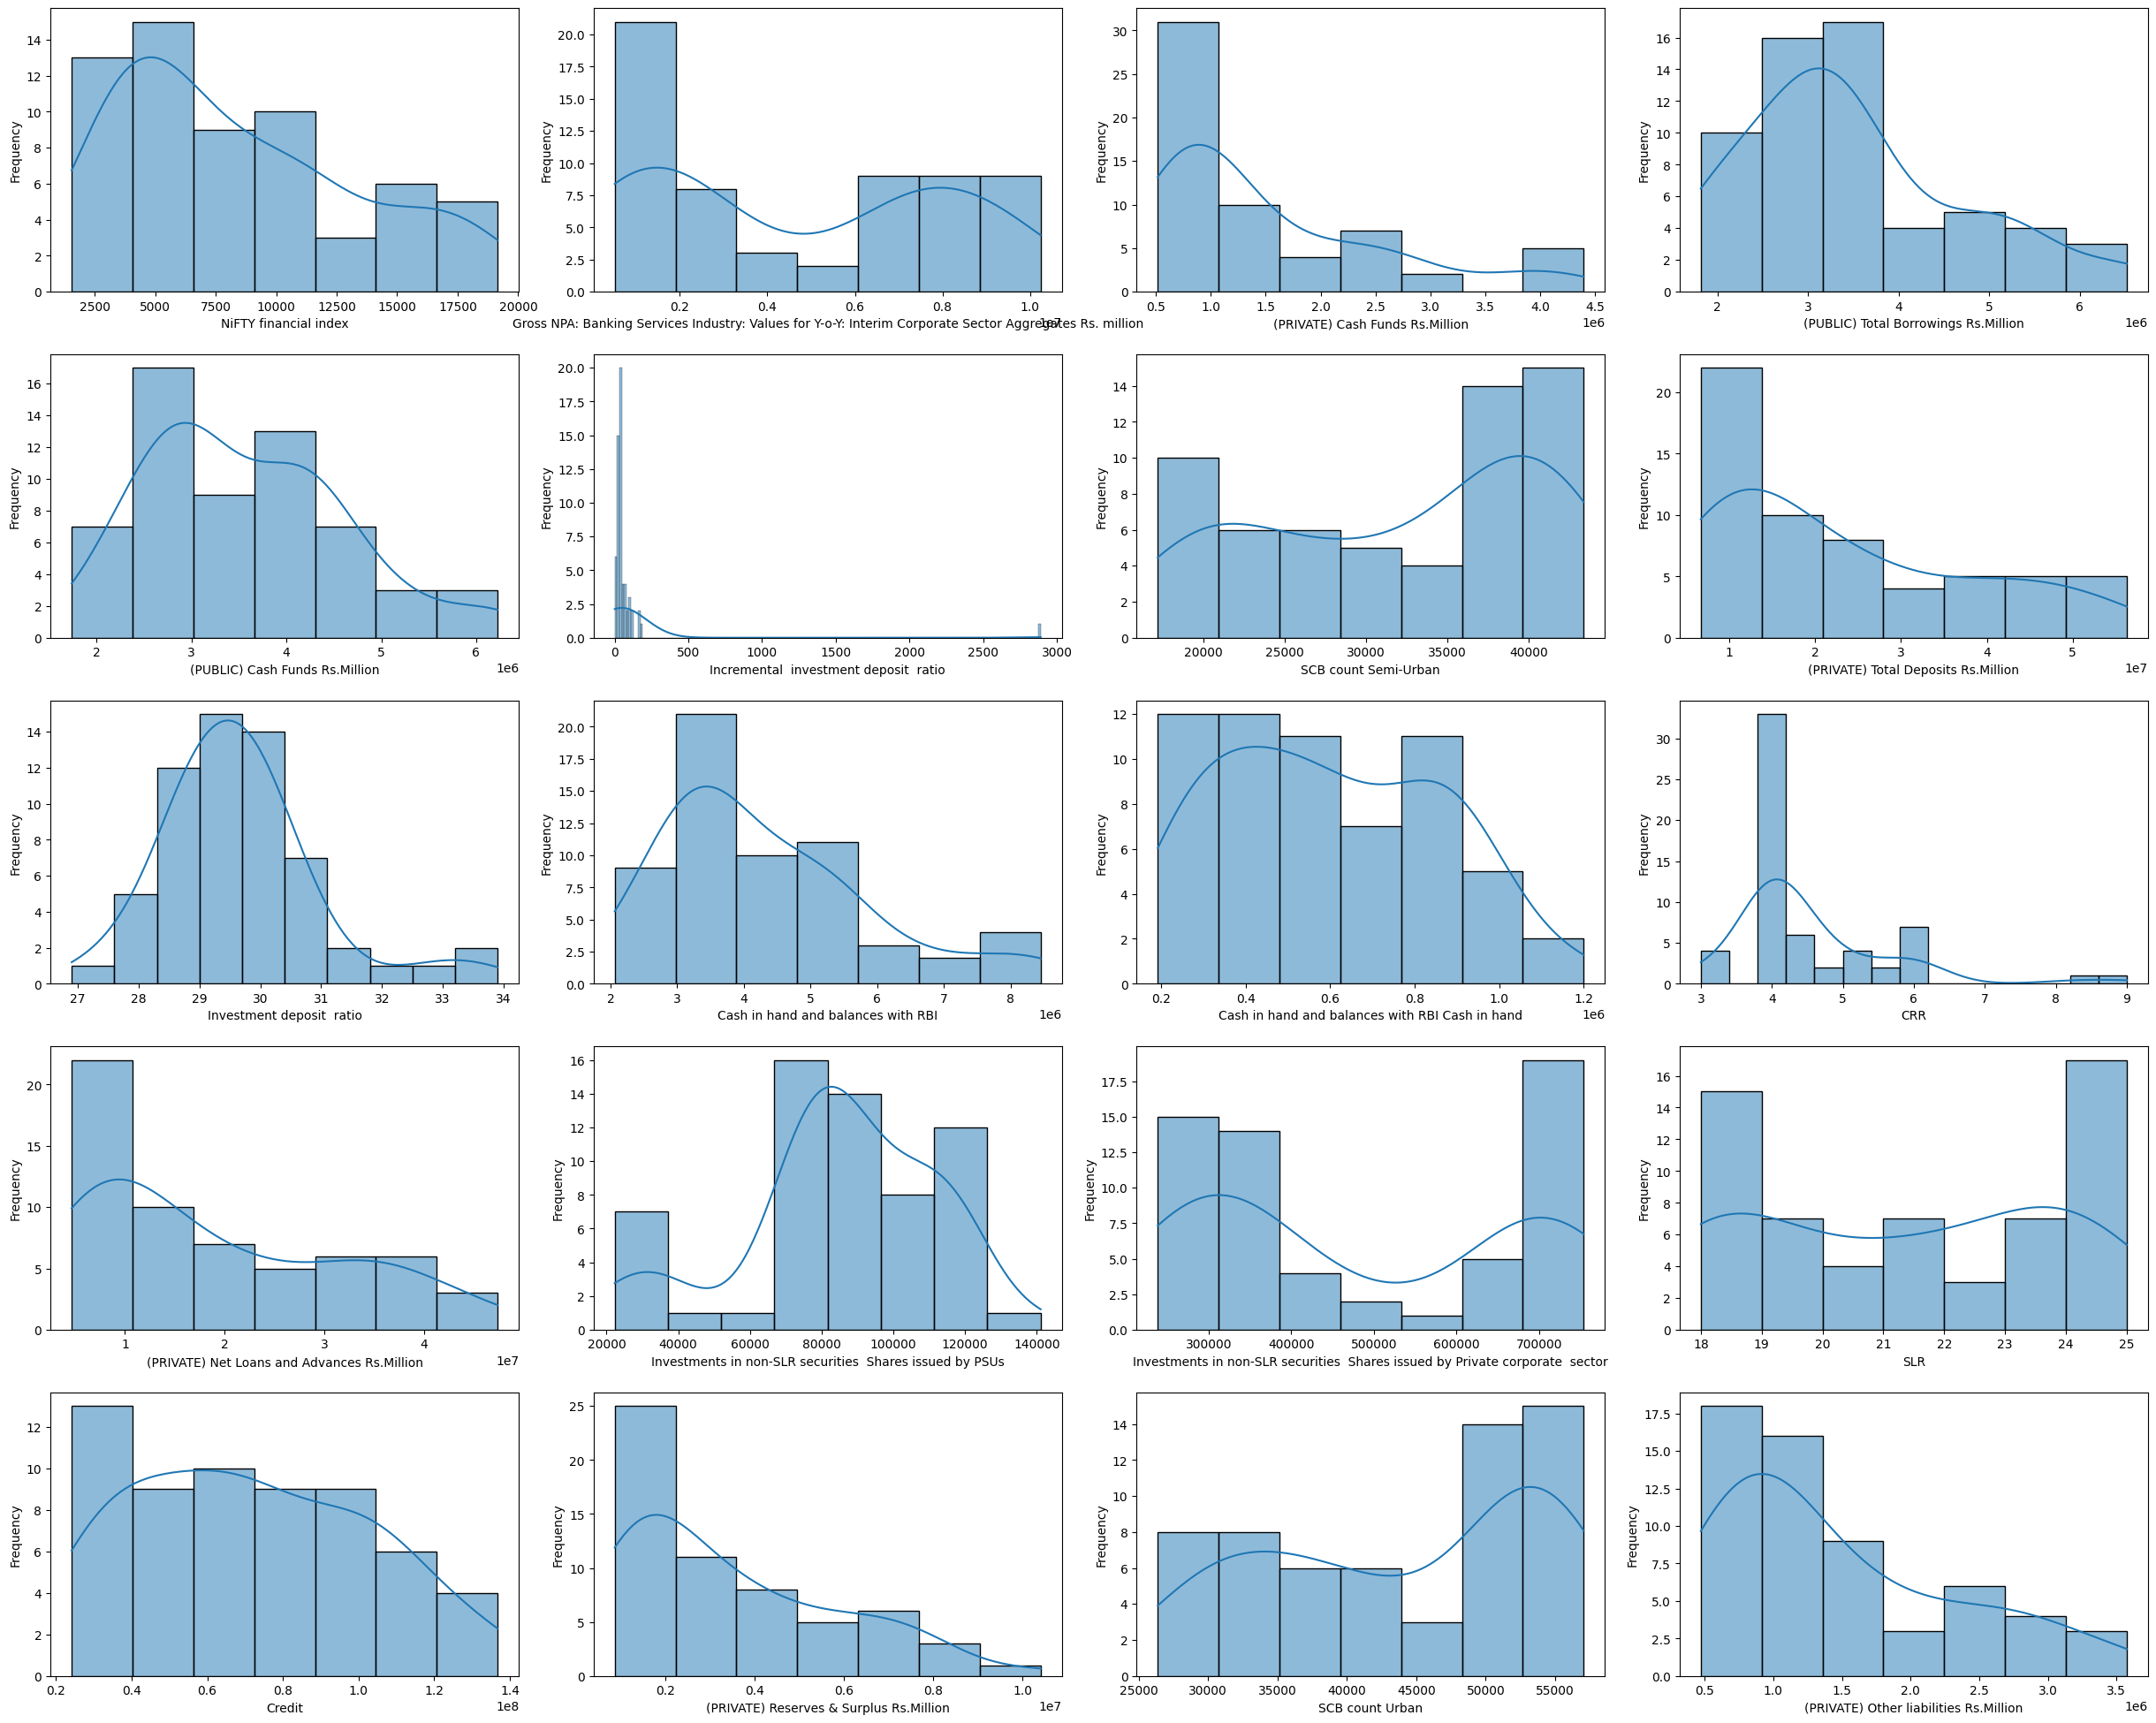

In [6]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

# Get the list of columns in the DataFrame
columns = list(df.columns)

# Randomly select 20 features from the columns
random_columns = random.sample(columns, 20)

# Determine the number of subplots needed based on the number of selected columns
num_plots = len(random_columns)

# Calculate the number of rows and columns for the subplot grid
num_cols = 4  # Define the number of columns
num_rows = (num_plots + num_cols - 1) // num_cols  # Adjusted formula for uneven plots

# Create the subplot grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(25, 4 * num_rows))
fig.tight_layout(pad=3.0)

# Iterate over the selected columns and plot each feature in a separate subplot
for i, column in enumerate(random_columns):
    # Calculate the subplot position
    row = i // num_cols
    col = i % num_cols

    # Select the appropriate subplot
    if num_rows > 1:
        ax = axs[row, col]
    else:
        ax = axs[col]

    # Plot the distribution using seaborn's histplot
    sns.histplot(data=df, x=column, kde=True, ax=ax)
    ax.set_ylabel('Frequency')
    #ax.set_title("\n".join(textwrap.wrap(column, 20)))  # Wrap and set the title

# Remove any unused subplots
for i in range(num_plots, num_rows * num_cols):
    if num_rows > 1:
        axs[row, col].axis('off')
    else:
        axs[col].axis('off')

# Show the plot
plt.show()


### line plot of 20 random features

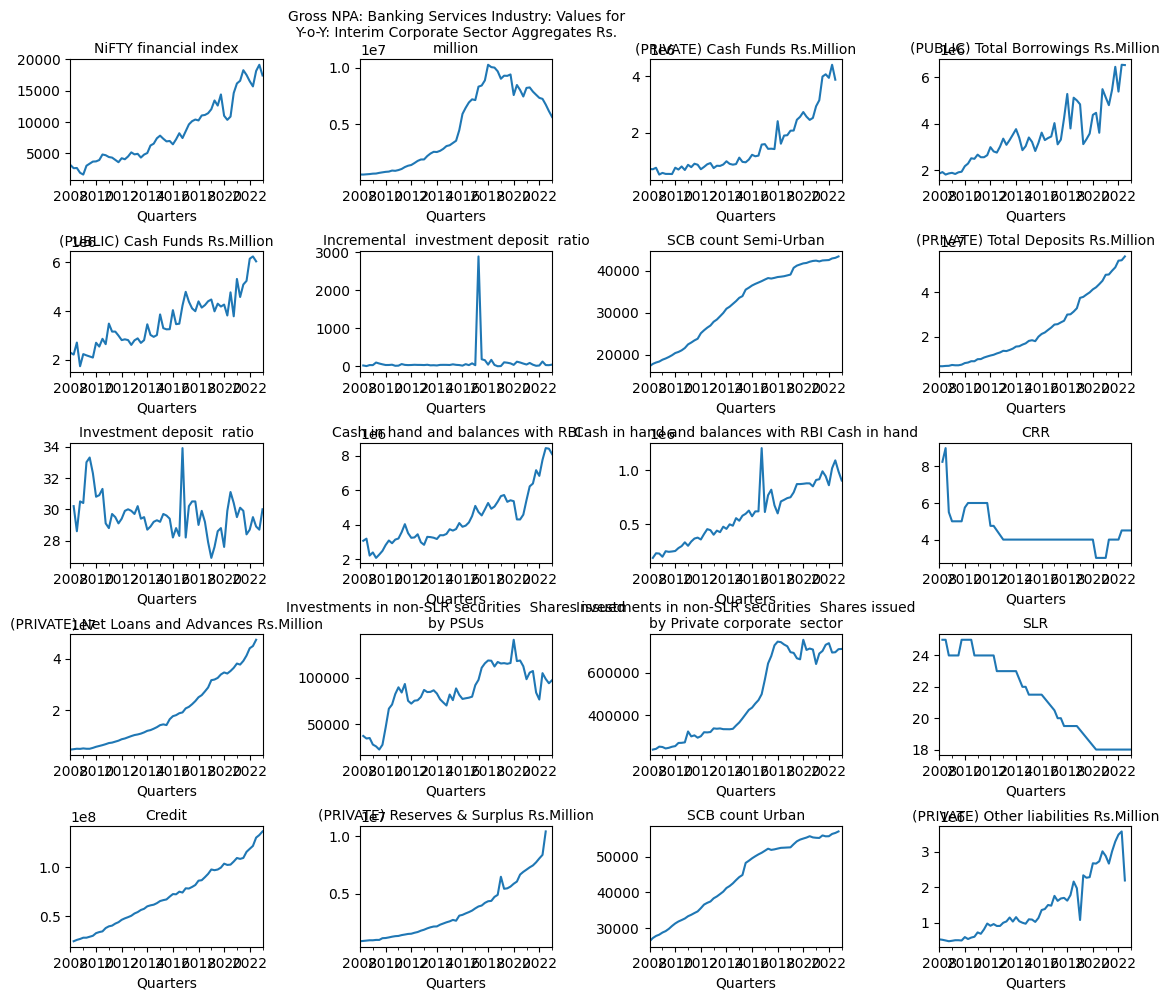

In [7]:
# Calculate the number of rows and columns for the subplot grid
num_rows = int((num_plots + num_cols - 1) / num_cols)  # Round up to handle any remaining columns

# Create the subplot grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
fig.tight_layout(pad=3.0)

# Iterate over the selected columns and plot each feature in a separate subplot
for i, column in enumerate(random_columns):
    # Calculate the subplot position
    row = i // num_cols
    col = i % num_cols

    # Select the appropriate subplot
    ax = axs[row, col]

    # Plot the line chart
    df[column].plot(ax=ax)
    ax.text(0.5, 1.05, "\n".join(textwrap.wrap(column, 50)), ha='center', transform=ax.transAxes)  # Wrap and set the title

# Remove any unused subplots
for i in range(num_plots, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].axis('off')

# Show the plot
plt.show()


## Missing value treatment

### summary table based on # Missing Values

In [7]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Count of missing values
missing_count = df.isnull().sum()

# Percentage of missing values
missing_percent = (missing_count / len(df)) * 100

# Position of missing values
missing_position = []
for col in df.columns:
    pos = []
    for val in df[col]:
        if pd.isna(val) and not pd.isna(df[col].iloc[0]):
            pos.append('End')
        elif pd.isna(val) and not (pd.isna(df[col].iloc[0]) or pd.isna(df[col].iloc[-1])):
            pos.append('Middle')
        elif pd.isna(val) and not pd.isna(df[col].iloc[-1]):
            pos.append('Beginning')
    pos_unique = ', '.join(set(pos))  # Get unique positions and join with a comma
    missing_position.append(pos_unique)

# Create summary table
summary_table = pd.DataFrame({'Feature Name': df.columns,
                              'Count of Missing Values': missing_count,
                              '% of Missing Values': missing_percent,
                              'Missing Value Position': missing_position})

# Filter out rows with zero missing values
summary_table = summary_table[summary_table['Count of Missing Values'] > 0]

# Sort table based on count of missing values in descending order
summary_table = summary_table.sort_values(by='Count of Missing Values', ascending=False)

# Reset index starting from 1
summary_table.reset_index(drop=True, inplace=True)
summary_table.index += 1

summary_table

Feature Name  Count of Missing Values  \
1                                            MSF                       13   
2             Debit Card Transactions Rs.Million                       13   
3                     Debit Card Transactions  #                       13   
4            Credit Card Transactions Rs.Million                       13   
5                     Credit Card Transactions #                       13   
..                                           ...                      ...   
77                 Investments in SLR securities                        1   
78                             Advances to banks                        1   
79               Money at call and  short notice                        1   
80  Balances with other banks In current account                        1   
81                               SCB count Rural                        1   

    % of Missing Values Missing Value Position  
1             21.311475              Beginning  
2             21.311475              Beginning  
3             21.311475              Beginning  
4             21.311475              Beginning  
5             21.311475              Beginning  
..                  ...                    ...  
77             1.639344              Beginning  
78             1.639344              Beginning  
79             1.639344              Beginning  
80             1.639344              Beginning  
81             1.639344                    End  

[81 rows x 4 columns]

### Missing value Visualization 

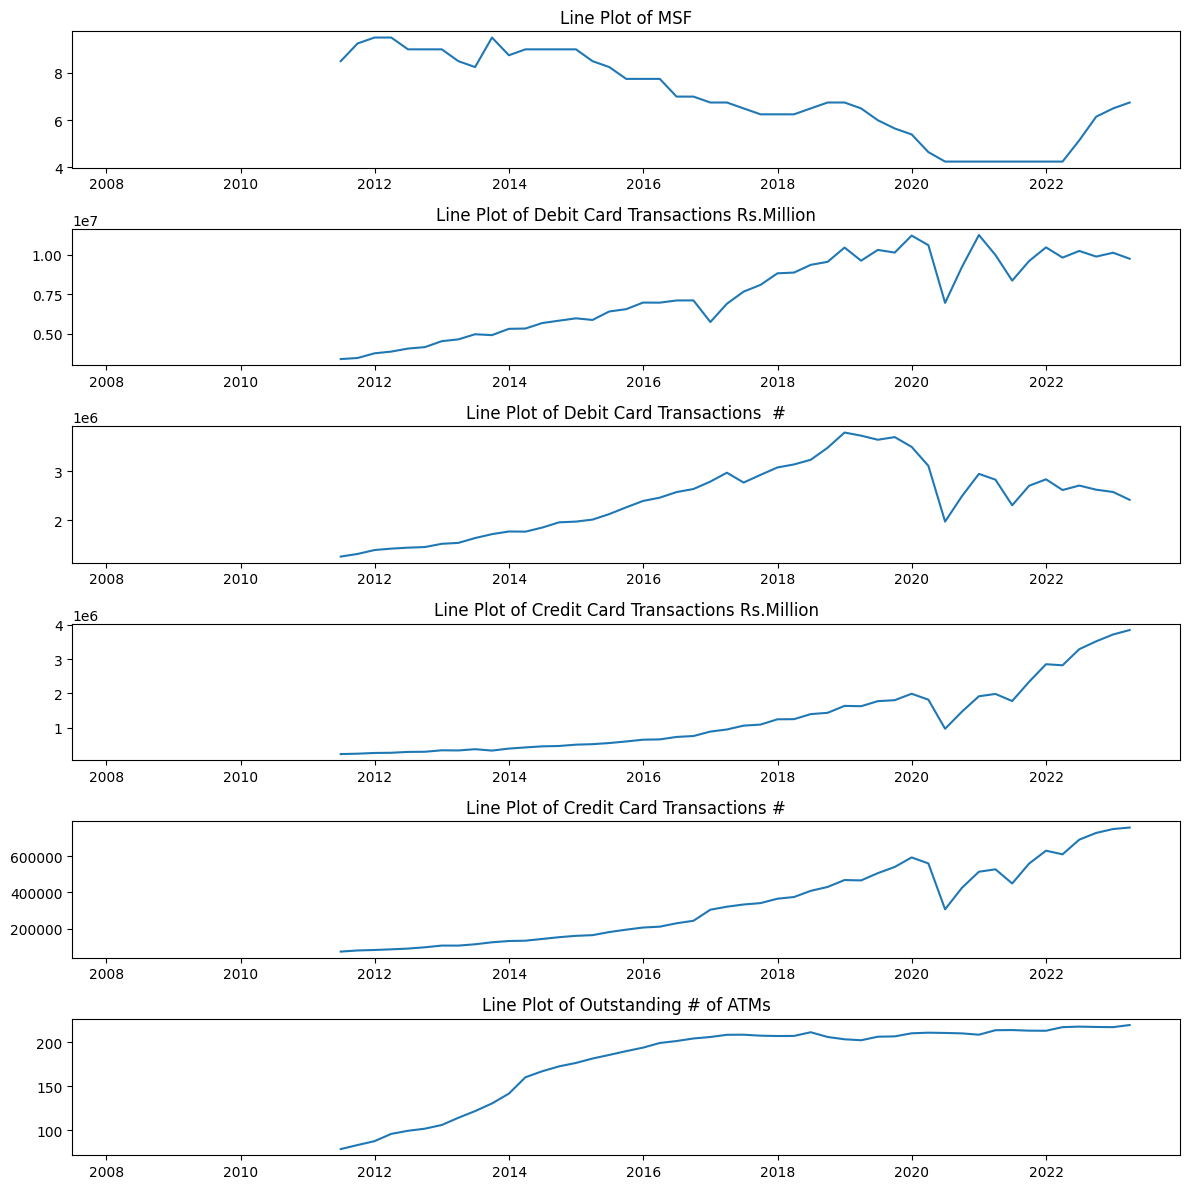

In [8]:
import matplotlib.pyplot as plt

# Filter features with more than 5% missing values
m=10
filtered_features = summary_table[summary_table['% of Missing Values'] > m]

# Calculate the number of rows and columns for subplots
num_plots = len(filtered_features)
num_cols = 1
num_rows = (num_plots + num_cols - 1) // num_cols

# Set the figure size to stretch horizontally
fig_width = 12  # Adjust the width as needed
fig_height = 12  # Adjust the height as needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height), squeeze=False)

# Iterate over filtered features and create separate line plots
for i, feature in enumerate(filtered_features['Feature Name']):
    # Get the index positions where data is missing
    missing_index = df[df[feature].isnull()].index

    # Select the appropriate subplot
    ax = axes[i // num_cols, i % num_cols]

    # Plot the feature
    ax.plot(df.index, df[feature])

    # Plot the missing values on the x-axis
    ax.plot(missing_index, [df[feature].max()] * len(missing_index), 'o', markersize=0)

    # Set the title of the plot
    ax.set_title(f'Line Plot of {feature}')

# Adjust the layout to prevent overlapping of subplots
fig.tight_layout()

# Show the plot
plt.show()


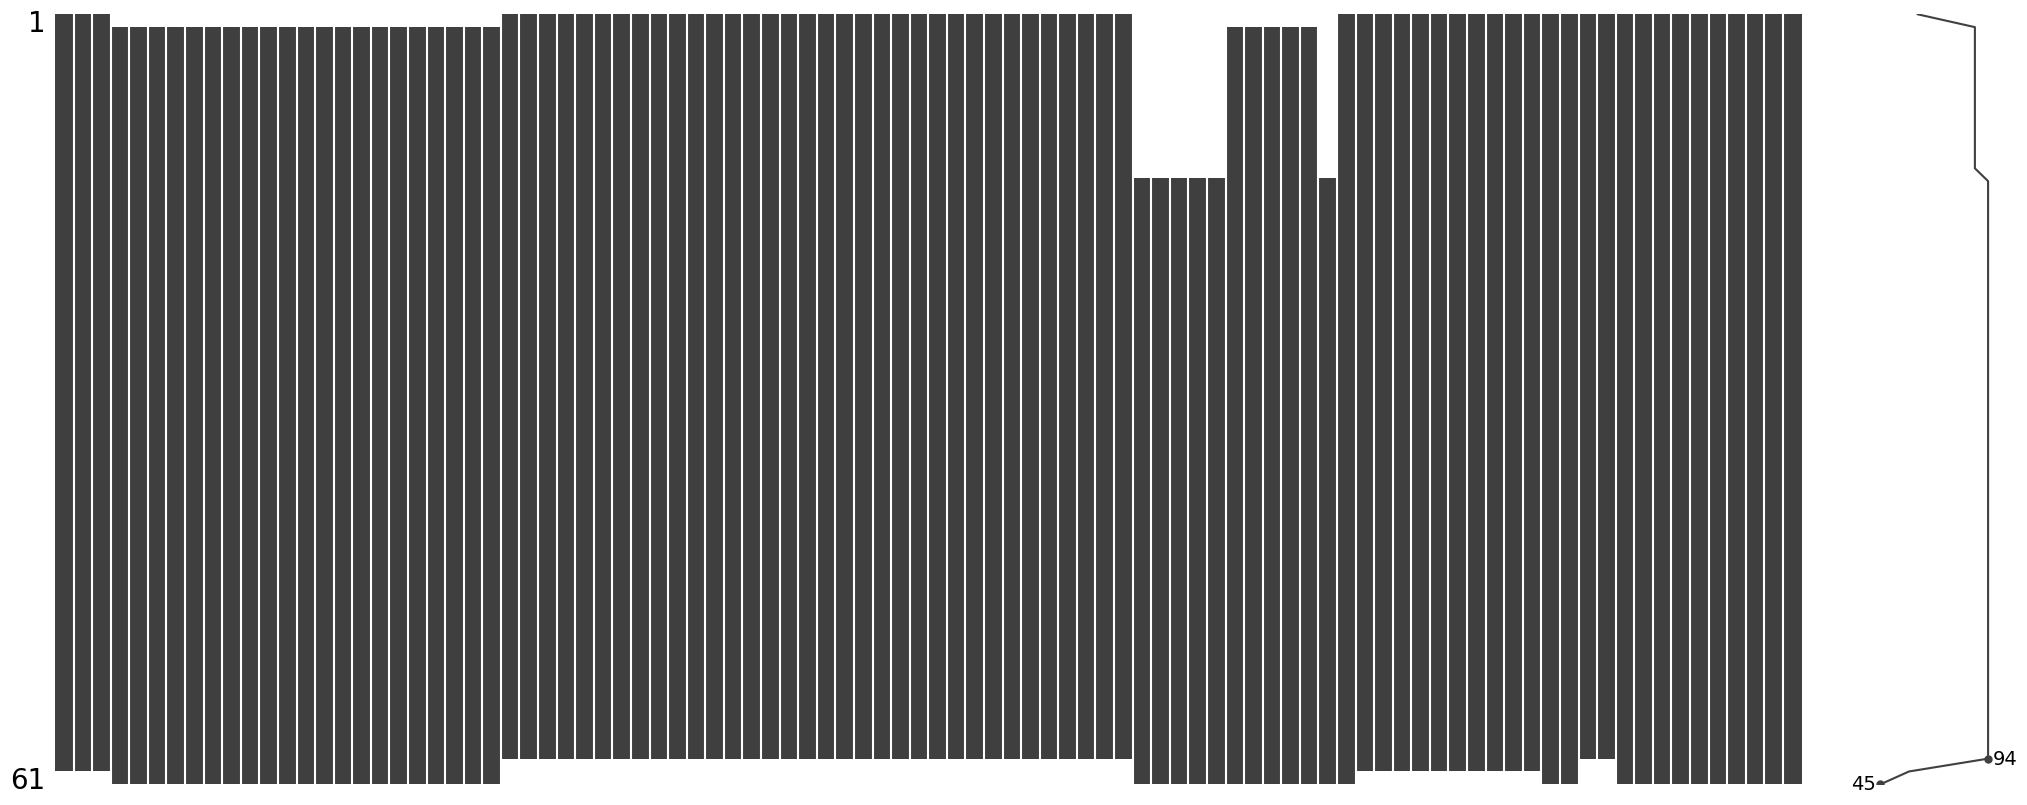

SCB count Rural  SCB count Semi-Urban  SCB count Urban  \
Quarters                                                             
2008-03-31          30732.0               17212.0          26382.0   
2008-06-30          30955.0               17771.0          27277.0   
2008-09-30          31117.0               18096.0          27856.0   
2008-12-31          31204.0               18329.0          28217.0   
2009-03-31          31489.0               18764.0          28803.0   
...                     ...                   ...              ...   
2022-03-31          53069.0               42532.0          55719.0   
2022-06-30          53262.0               42911.0          56357.0   
2022-09-30          53355.0               43052.0          56630.0   
2022-12-31          53640.0               43391.0          57056.0   
2023-03-31              NaN                   NaN              NaN   

            Liabilities to the  banking system Rs. Million  \
Quarters                                                     
2008-03-31                                             NaN   
2008-06-30                                       1123514.2   
2008-09-30                                       1062924.7   
2008-12-31                                       1040083.1   
2009-03-31                                       1001155.1   
...                                                    ...   
2022-03-31                                       2586490.0   
2022-06-30                                       2814480.0   
2022-09-30                                       2985280.0   
2022-12-31                                       3262940.0   
2023-03-31                                       3518430.0   

            Liabilities to  others Rs. Million  \
Quarters                                         
2008-03-31                                 NaN   
2008-06-30                          36722497.4   
2008-09-30                          38482005.1   
2008-12-31                          40014319.6   
2009-03-31                          42555662.5   
...                                        ...   
2022-03-31                         173807550.0   
2022-06-30                         176038930.0   
2022-09-30                         187260010.0   
2022-12-31                         189268660.0   
2023-03-31                         192788940.0   

            Borrowings from RBI Rs. Million  \
Quarters                                      
2008-03-31                              NaN   
2008-06-30                          30961.4   
2008-09-30                          60944.4   
2008-12-31                         135161.8   
2009-03-31                         117279.2   
...                                     ...   
2022-03-31                         942990.0   
2022-06-30                         945140.0   
2022-09-30                        1125210.0   
2022-12-31                        1274720.0   
2023-03-31                        1650850.0   

            Cash in hand and balances with RBI Cash in hand  \
Quarters                                                      
2008-03-31                                              NaN   
2008-06-30                                         192350.1   
2008-09-30                                         234815.3   
2008-12-31                                         232260.7   
2009-03-31                                         202806.7   
...                                                     ...   
2022-03-31                                         859260.0   
2022-06-30                                        1015250.0   
2022-09-30                                        1087430.0   
2022-12-31                                         986150.0   
2023-03-31                                         902630.0   

            Cash in hand and balances with RBI  \
Quarters                                         
2008-03-31                                 NaN   
2008-06-30                           3059627.3   
2008-09-30 

In [9]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Visualize the missing cells
msno.matrix(df)
plt.show()
df

In [10]:
# Calculate the total count of missing values in the DataFrame
total_missing_count = df.isnull().sum().sum()

# Calculate the overall percentage of missing values in the DataFrame
total_missing_percentage = (total_missing_count / (df.shape[0] * df.shape[1])) * 100

# Calculate the total number of filled values in the DataFrame
total_filled_values = df.size - total_missing_count

# Print the total count and percentage of missing values
print("Total Count of Missing Values:", total_missing_count)
print("Total Cells:", df.size)
print("Overall Percentage of Missing Values:", total_missing_percentage, "\n")

Total Count of Missing Values: 189
Total Cells: 5734
Overall Percentage of Missing Values: 3.2961283571677713 



### Missing value Imputation

In [11]:
df = df.ffill(limit=2)
df = df.bfill(limit=15)

In [12]:
# Calculate the total count of missing values in the DataFrame
total_missing_count = df.isnull().sum().sum()

# Calculate the overall percentage of missing values in the DataFrame
total_missing_percentage = (total_missing_count / (df.shape[0] * df.shape[1])) * 100

# Calculate the total number of filled values in the DataFrame
total_filled_values = df.size - total_missing_count

# Print the total count and percentage of missing values
print("Total Count of Missing Values:", total_missing_count)
print("Total Cells:", df.size)
print("Overall Percentage of Missing Values:", total_missing_percentage, "\n")

Total Count of Missing Values: 0
Total Cells: 5734
Overall Percentage of Missing Values: 0.0 



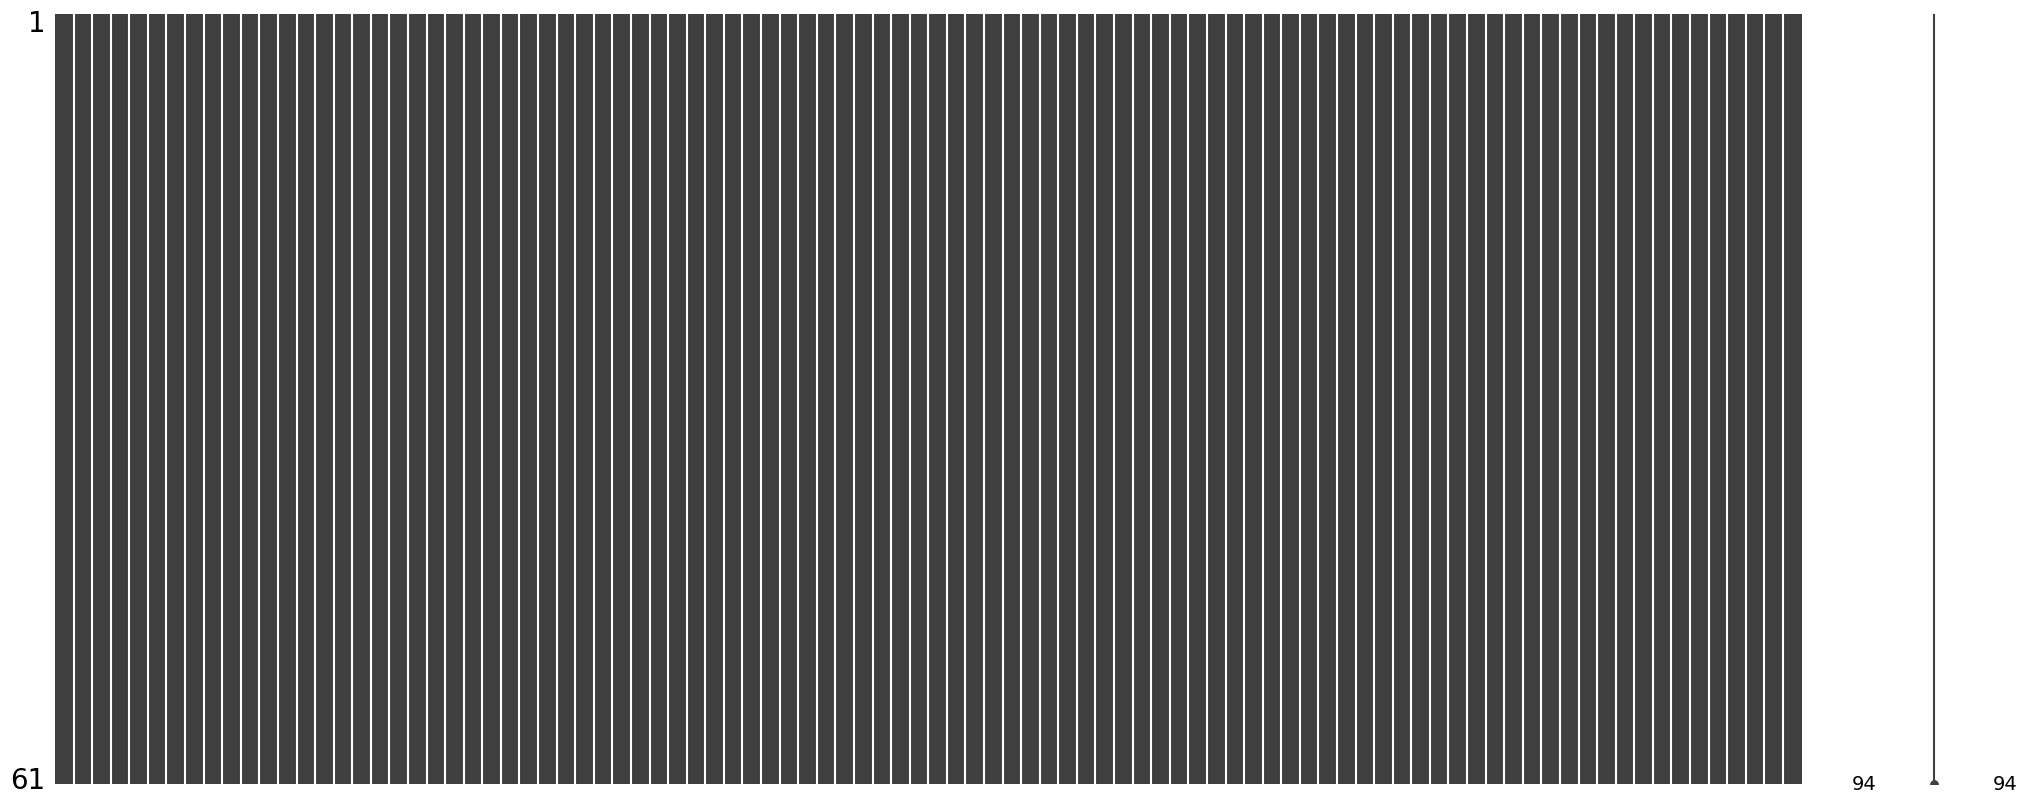

SCB count Rural  SCB count Semi-Urban  SCB count Urban  \
Quarters                                                             
2008-03-31          30732.0               17212.0          26382.0   
2008-06-30          30955.0               17771.0          27277.0   
2008-09-30          31117.0               18096.0          27856.0   
2008-12-31          31204.0               18329.0          28217.0   
2009-03-31          31489.0               18764.0          28803.0   
...                     ...                   ...              ...   
2022-03-31          53069.0               42532.0          55719.0   
2022-06-30          53262.0               42911.0          56357.0   
2022-09-30          53355.0               43052.0          56630.0   
2022-12-31          53640.0               43391.0          57056.0   
2023-03-31          53640.0               43391.0          57056.0   

            Liabilities to the  banking system Rs. Million  \
Quarters                                                     
2008-03-31                                       1123514.2   
2008-06-30                                       1123514.2   
2008-09-30                                       1062924.7   
2008-12-31                                       1040083.1   
2009-03-31                                       1001155.1   
...                                                    ...   
2022-03-31                                       2586490.0   
2022-06-30                                       2814480.0   
2022-09-30                                       2985280.0   
2022-12-31                                       3262940.0   
2023-03-31                                       3518430.0   

            Liabilities to  others Rs. Million  \
Quarters                                         
2008-03-31                          36722497.4   
2008-06-30                          36722497.4   
2008-09-30                          38482005.1   
2008-12-31                          40014319.6   
2009-03-31                          42555662.5   
...                                        ...   
2022-03-31                         173807550.0   
2022-06-30                         176038930.0   
2022-09-30                         187260010.0   
2022-12-31                         189268660.0   
2023-03-31                         192788940.0   

            Borrowings from RBI Rs. Million  \
Quarters                                      
2008-03-31                          30961.4   
2008-06-30                          30961.4   
2008-09-30                          60944.4   
2008-12-31                         135161.8   
2009-03-31                         117279.2   
...                                     ...   
2022-03-31                         942990.0   
2022-06-30                         945140.0   
2022-09-30                        1125210.0   
2022-12-31                        1274720.0   
2023-03-31                        1650850.0   

            Cash in hand and balances with RBI Cash in hand  \
Quarters                                                      
2008-03-31                                         192350.1   
2008-06-30                                         192350.1   
2008-09-30                                         234815.3   
2008-12-31                                         232260.7   
2009-03-31                                         202806.7   
...                                                     ...   
2022-03-31                                         859260.0   
2022-06-30                                        1015250.0   
2022-09-30                                        1087430.0   
2022-12-31                                         986150.0   
2023-03-31                                         902630.0   

            Cash in hand and balances with RBI  \
Quarters                                         
2008-03-31                           3059627.3   
2008-06-30                           3059627.3   
2008-09-30 

In [13]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Visualize the missing cells
msno.matrix(df)
plt.show()
df

### line plots after  imputaion 

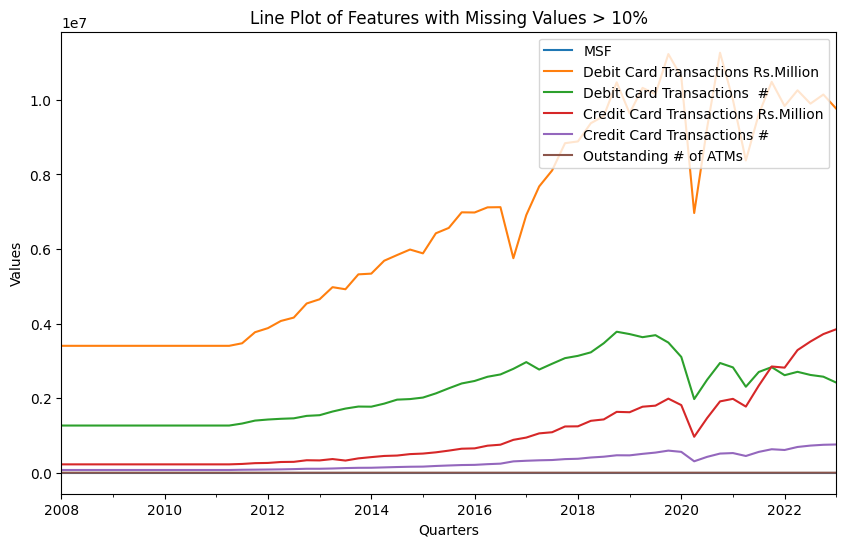

In [14]:
import matplotlib.pyplot as plt

# Filter out rows with missing values more than 10%
filtered_table = summary_table[summary_table['% of Missing Values'] > 10]

# Get the feature names
features_to_plot = filtered_table['Feature Name'].tolist()

# Line plot only the selected features
df[features_to_plot].plot(figsize=(10, 6))
plt.xlabel('Quarters')
plt.ylabel('Values')
plt.title('Line Plot of Features with Missing Values > 10%')
plt.legend(loc='upper right')
plt.show()


In [15]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Count of missing values
missing_count = df.isnull().sum()

# Percentage of missing values
missing_percent = (missing_count / len(df)) * 100

# Position of missing values
missing_position = []
for col in df.columns:
    pos = []
    for val in df[col]:
        if pd.isna(val) and not pd.isna(df[col].iloc[0]):
            pos.append('End')
        elif pd.isna(val) and not (pd.isna(df[col].iloc[0]) or pd.isna(df[col].iloc[-1])):
            pos.append('Middle')
        elif pd.isna(val) and not pd.isna(df[col].iloc[-1]):
            pos.append('Beginning')
    pos_unique = ', '.join(set(pos))  # Get unique positions and join with a comma
    missing_position.append(pos_unique)

# Create summary table
summary_table = pd.DataFrame({'Feature Name': df.columns,
                              'Count of Missing Values': missing_count,
                              '% of Missing Values': missing_percent,
                              'Missing Value Position': missing_position})

# Filter out rows with zero missing values
summary_table = summary_table[summary_table['Count of Missing Values'] > 0]

# Sort table based on count of missing values in descending order
summary_table = summary_table.sort_values(by='Count of Missing Values', ascending=False)

# Reset index starting from 1
summary_table.reset_index(drop=True, inplace=True)
summary_table.index += 1

# Print the summary table
summary_table

Empty DataFrame
Columns: [Feature Name, Count of Missing Values, % of Missing Values, Missing Value Position]
Index: []

## OUTLIER Detection Tukey's Fence

In [16]:
# lower_bound = q1 - (k * iqr)
# upper_bound = q3 + (k * iqr)

k = 3

### summary table based on % Outlier

In [17]:
from IPython.display import display, HTML
import pandas as pd

# Set the display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Set the display format for float numbers
pd.options.display.float_format = '{:.2f}'.format

# Calculate Q1 and Q3 for all features
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

# Calculate the interquartile range (IQR) for all features
iqr = q3 - q1

# Determine lower and upper bounds using Tukey's fences
lower_bound = q1 - (k * iqr)
upper_bound = q3 + (k * iqr)

# Prepare a summary DataFrame to store the results
summary_table = pd.DataFrame(columns=['Feature', '% Outlier', 'Q1', 'Q3', 'IQR', 'Count of Outliers', 'Lower Bound', 'Upper Bound'])

# Iterate over each feature in the DataFrame
for feature in df.columns:
    # Find non-blank values in the current feature
    non_blank_values = df[feature].dropna()
    
    # Find outliers for the non-blank values of the current feature
    outliers = (non_blank_values < lower_bound[feature]) | (non_blank_values > upper_bound[feature])
    
    # Calculate the percentage of outliers for the current feature
    percent_outlier = (outliers.sum() / len(non_blank_values)) * 100
    
    # Create a DataFrame for the current feature's summary information
    feature_summary = pd.DataFrame({
        'Feature': [df[feature].name],  # Modified line
        '% Outlier': [percent_outlier],
        'Q1': [q1[feature]],
        'Q3': [q3[feature]],
        'IQR': [iqr[feature]],
        'Count of Outliers': [outliers.sum()],
        'Lower Bound': [lower_bound[feature]],
        'Upper Bound': [upper_bound[feature]]
    })
    
    # Concatenate the feature summary DataFrame to the summary table
    summary_table = pd.concat([summary_table, feature_summary], ignore_index=True)

# Filter the summary table to include only non-zero values of % Outlier
non_zero_outliers = summary_table[summary_table['% Outlier'] != 0]

# Sort the filtered table based on % Outlier in decreasing order
non_zero_outliers_sorted = non_zero_outliers.sort_values(by='% Outlier', ascending=False).reset_index(drop=True)

# Update the index to start from 1
non_zero_outliers_sorted.index = non_zero_outliers_sorted.index + 1

# Check if the "Count of Outliers" column has any non-zero values
has_outliers = (summary_table['Count of Outliers'] != 0).any()

if has_outliers:
    print("There are outliers present.")
else:
    print("There are no outliers as per Tukey's Method.")

# Update the index to start from 1
non_zero_outliers_sorted.index = non_zero_outliers_sorted.index + 1

# Add a new column for the modified index
non_zero_outliers_sorted.insert(0, 'Index', range(1, len(non_zero_outliers_sorted) + 1))

# Display the modified table as an interactive HTML table
display(HTML(non_zero_outliers_sorted.to_html(index=False)))


There are outliers present.


### Before OUTLIER removal Visualization

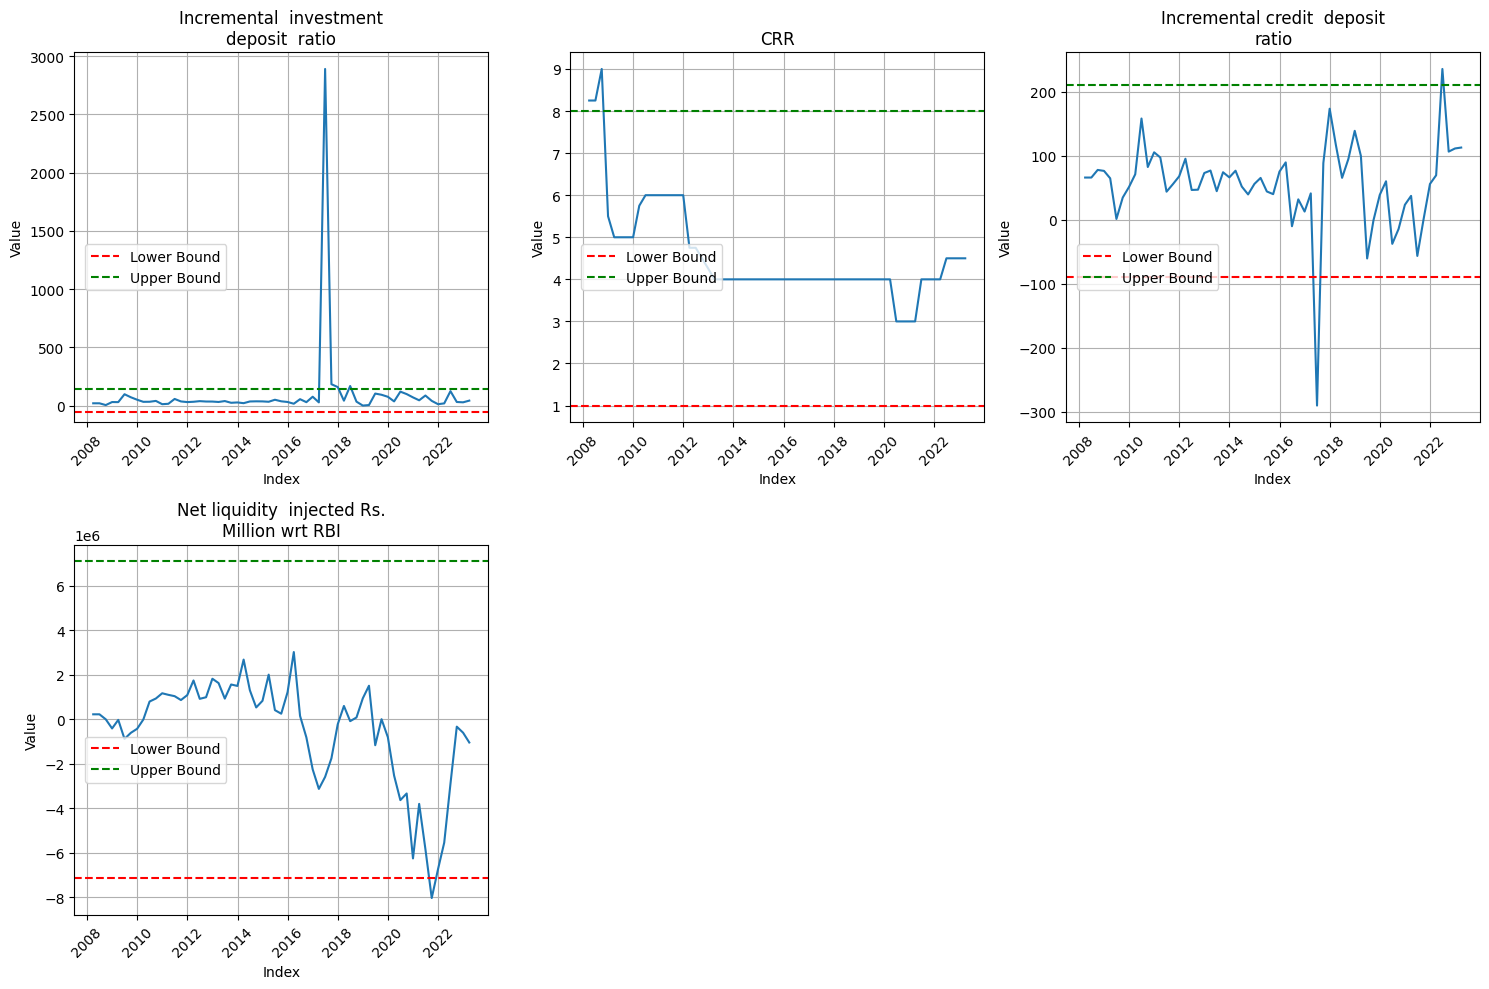

In [83]:
import matplotlib.pyplot as plt
import textwrap

# Calculate the number of rows and columns for subplots
n_features = len(non_zero_outliers_sorted)
n_rows = (n_features + 2) // 3  # Adjust the number of columns as desired
n_cols = min(n_features, 3)

# Create the subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
fig.subplots_adjust(hspace=0.6)

# Iterate over each feature in the sorted dftaFrame
for i, (index, row) in enumerate(non_zero_outliers_sorted.iterrows()):
    feature = row['Feature']
    lower_bound = row['Lower Bound']
    upper_bound = row['Upper Bound']
    
    # Calculate the subplot index
    row_idx = i // n_cols
    col_idx = i % n_cols
    
    # Plot the feature with bounds in the corresponding subplot
    ax = axs[row_idx, col_idx]
    ax.plot(df[feature])
    ax.axhline(lower_bound, color='r', linestyle='--', label='Lower Bound')
    ax.axhline(upper_bound, color='g', linestyle='--', label='Upper Bound')
    
    # Set the plot title and labels
    wrapped_feature = textwrap.fill(feature, 30)  # Wrap feature label into multiple lines
    ax.set_title(wrapped_feature)
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
    
    # Rotate the x-axis labels
    ax.tick_params(axis='x', rotation=45)
    
    # Add legend within the plot area
    legend = ax.legend(loc='upper left')
    
    # Adjust the legend position to middle left
    legend.set_bbox_to_anchor((0.01, 0.5))
    
    # Show grid
    ax.grid(True)

# Remove any empty subplots
if n_features < n_rows * n_cols:
    for i in range(n_features, n_rows * n_cols):
        fig.delaxes(axs.flatten()[i])

# Save the plot as a PNG image
plt.savefig('plots/impute_outliers_detection_plot.png')

# Show the plot
plt.tight_layout()
plt.show()


### OUTLIER replacement for all features 

In [18]:
from IPython.display import display, HTML
import pandas as pd

# Set the display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Set the display format for float numbers
pd.options.display.float_format = '{:.2f}'.format

# Calculate Q1 and Q3 for all features
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

# Calculate the interquartile range (IQR) for all features
iqr = q3 - q1

# Determine lower and upper bounds using Tukey's fences
lower_bound = q1 - (k * iqr)
upper_bound = q3 + (k * iqr)

# Prepare a summary DataFrame to store the results
summary_table = pd.DataFrame(columns=['Feature', '% Outlier', 'Q1', 'Q3', 'IQR', 'Count of Outliers', 'Lower Bound', 'Upper Bound'])

# Iterate over each feature in the DataFrame
for feature in df.columns:
    # Find non-blank values in the current feature
    non_blank_values = df[feature].dropna()
    
    # Find outliers for the non-blank values of the current feature
    outliers = (non_blank_values < lower_bound[feature]) | (non_blank_values > upper_bound[feature])
    
    # Calculate the percentage of outliers for the current feature
    percent_outlier = (outliers.sum() / len(non_blank_values)) * 100
    
    # Create a DataFrame for the current feature's summary information
    feature_summary = pd.DataFrame({
        'Feature': [df[feature].name],  # Modified line
        '% Outlier': [percent_outlier],
        'Q1': [q1[feature]],
        'Q3': [q3[feature]],
        'IQR': [iqr[feature]],
        'Count of Outliers': [outliers.sum()],
        'Lower Bound': [lower_bound[feature]],
        'Upper Bound': [upper_bound[feature]]
    })


import numpy as np

# Iterate over each feature in the DataFrame
for feature in df.columns:
    # Find non-blank values in the current feature
    non_blank_values = df[feature].dropna()
    
    # Find outliers for the non-blank values of the current feature
    outliers = (non_blank_values < lower_bound[feature]) | (non_blank_values > upper_bound[feature])
    
    # Replace outliers with the lower or upper bound
    df.loc[df.index.isin(non_blank_values[outliers].index), feature] = np.where(non_blank_values[outliers] < lower_bound[feature], lower_bound[feature], upper_bound[feature])

### After OUTLIER removal Visualization

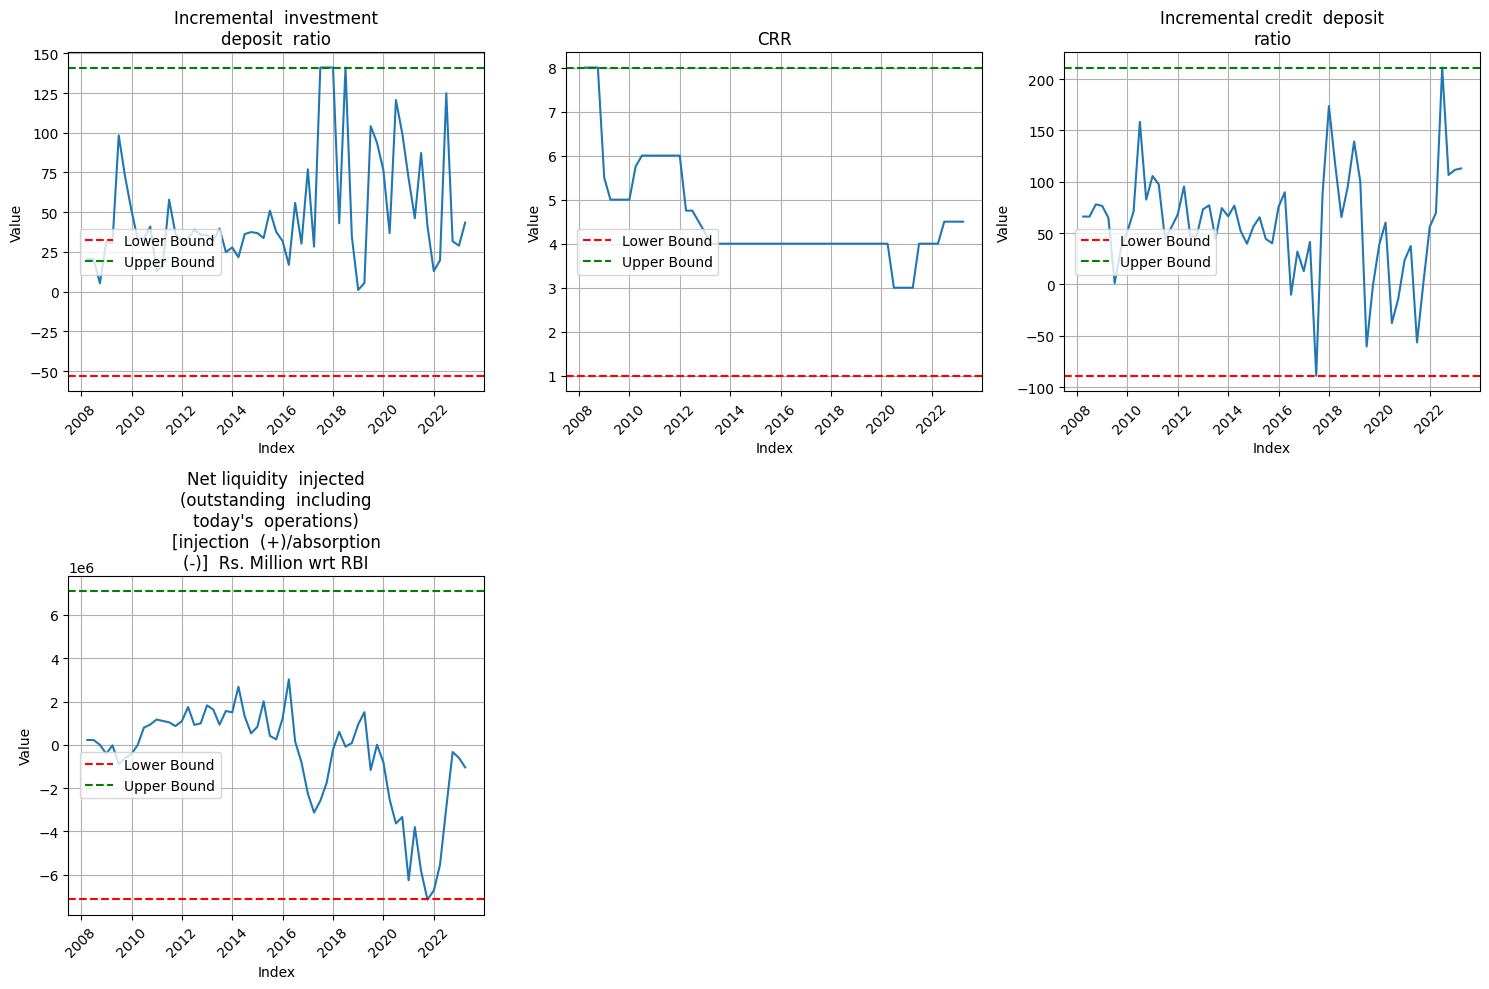

In [21]:
import matplotlib.pyplot as plt
import textwrap

# Calculate the number of rows and columns for subplots
n_features = len(non_zero_outliers_sorted)
n_rows = (n_features + 2) // 3  # Adjust the number of columns as desired
n_cols = min(n_features, 3)

# Create the subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
fig.subplots_adjust(hspace=0.6)

# Iterate over each feature in the sorted dftaFrame
for i, (index, row) in enumerate(non_zero_outliers_sorted.iterrows()):
    feature = row['Feature']
    lower_bound = row['Lower Bound']
    upper_bound = row['Upper Bound']
    
    # Calculate the subplot index
    row_idx = i // n_cols
    col_idx = i % n_cols
    
    # Plot the feature with bounds in the corresponding subplot
    ax = axs[row_idx, col_idx]
    ax.plot(df[feature])
    ax.axhline(lower_bound, color='r', linestyle='--', label='Lower Bound')
    ax.axhline(upper_bound, color='g', linestyle='--', label='Upper Bound')
    
    # Set the plot title and labels
    wrapped_feature = textwrap.fill(feature, 30)  # Wrap feature label into multiple lines
    ax.set_title(wrapped_feature)
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
    
    # Rotate the x-axis labels
    ax.tick_params(axis='x', rotation=45)
    
    # Add legend within the plot area
    legend = ax.legend(loc='upper left')
    
    # Adjust the legend position to middle left
    legend.set_bbox_to_anchor((0.01, 0.5))
    
    # Show grid
    ax.grid(True)

# Remove any empty subplots
if n_features < n_rows * n_cols:
    for i in range(n_features, n_rows * n_cols):
        fig.delaxes(axs.flatten()[i])

# Save the plot as a PNG image
plt.savefig('plots/impute_outliers_replaced_plot.png')

# Show the plot
plt.tight_layout()
plt.show()


### backing df as (**df_og**)

In [19]:
# Backup of df after misiing value treatment and outlier removal
df_og = df.copy() 
print(df_og.shape,'df_og.shape')
df_og

(61, 94) df_og.shape


SCB count Rural  SCB count Semi-Urban  SCB count Urban  \
Quarters                                                             
2008-03-31         30732.00              17212.00         26382.00   
2008-06-30         30955.00              17771.00         27277.00   
2008-09-30         31117.00              18096.00         27856.00   
2008-12-31         31204.00              18329.00         28217.00   
2009-03-31         31489.00              18764.00         28803.00   
2009-06-30         31666.00              19057.00         29210.00   
2009-09-30         31829.00              19418.00         29843.00   
2009-12-31         32024.00              19841.00         30646.00   
2010-03-31         32289.00              20358.00         31350.00   
2010-06-30         32467.00              20620.00         31899.00   
2010-09-30         32580.00              21004.00         32302.00   
2010-12-31         32870.00              21552.00         32730.00   
2011-03-31         33325.00              22419.00         33366.00   
2011-06-30         33513.00              22860.00         33774.00   
2011-09-30         33927.00              23371.00         34260.00   
2011-12-31         34208.00              23769.00         34713.00   
2012-03-31         35364.00              25076.00         35619.00   
2012-06-30         35934.00              25785.00         36622.00   
2012-09-30         36676.00              26406.00         37107.00   
2012-12-31         37159.00              26920.00         37488.00   
2013-03-31         38451.00              27822.00         38374.00   
2013-06-30         39154.00              28343.00         38892.00   
2013-09-30         40320.00              29118.00         39556.00   
2013-12-31         41624.00              29909.00         40245.00   
2014-03-31         43641.00              30926.00         41255.00   
2014-06-30         44624.00              31412.00         41811.00   
2014-09-30         45717.00              32078.00         42549.00   
2014-12-31         46985.00              32739.00         43460.00   
2015-03-31         48033.00              33523.00         44307.00   
2015-06-30         48531.00              33929.00         44883.00   
2015-09-30         45415.00              35474.00         48262.00   
2015-12-31         45885.00              35939.00         48874.00   
2016-03-31         46577.00              36464.00         49546.00   
2016-06-30         47052.00              36841.00         50121.00   
2016-09-30         47445.00              37168.00         50650.00   
2016-12-31         47813.00              37501.00         51098.00   
2017-03-31         48232.00              37880.00         51658.00   
2017-06-30         48774.00              38230.00         52236.00   
2017-09-30         49022.00              38120.00         51902.00   
2017-12-31         49143.00              38281.00         52051.00   
2018-03-31         49384.00              38481.00         52268.00   
2018-06-30         49578.00              38564.00         52471.00   
2018-09-30         49616.00              38674.00         52515.00   
2018-12-31         49766.00              38867.00         52567.00   
2019-03-31         50081.00              39063.00         52612.00   
2019-06-30         51400.00              40686.00         53496.00   
2019-09-30         51709.00              41202.00         54299.00   
2019-12-31         51892.00              41474.00         54771.00   
2020-03-31         52098.00              41738.00         55068.00   
2020-06-30         52190.00              41839.00         55344.00   
2020-09-30         52304.00              42127.00         55721.00   
2020-12-31         52481.00              42313.00         55386.00   
2021-03-31         52538.00              42389.00         55280.00   
2021-06-30         52737.00              42208.00         55237.00   
2021-09-30         52789.00              42431.00         55937.00   
2021-12-31         528

## Correlation Analysis

If you are interested in exploring the relationships between the absolute values of the quarterly time series features, conducting correlation analysis before applying the year-on-year percentage change transformation would be appropriate. Correlation measures the linear relationship between two variables, and in this case, you would be examining how the absolute values of the features are associated with each other.

On the other hand, if your goal is to understand the relationships between the year-on-year percentage changes of the features, performing correlation analysis after the transformation would be more suitable. This approach would allow you to assess how the changes in the features' values over time are correlated with one another.

In summary, the decision to perform correlation analysis before or after the transformation depends on whether you are interested in exploring the relationships between the absolute values or the changes of the time series features. Both approaches can provide valuable insights; it ultimately depends on the specific research questions or objectives you have in mind.

### summary table for variables with r above or below 0.8

In [20]:
z = 0.95

In [21]:
# Calculate the correlation matrix for all columns except the last one
correlation_matrix = df.iloc[:, :-1].corr()

# Identify variables with correlation coefficient 
highly_correlated_vars = correlation_matrix[((correlation_matrix > z) & (correlation_matrix < 1)) | ((correlation_matrix < -z) & (correlation_matrix > -1))]

# Summarize the highly correlated variables
summary = highly_correlated_vars.stack().reset_index()
summary.columns = ['Variable 1', 'Variable 2', 'Correlation Coefficient']

# Display the summary
summary


Variable 1  \
0                                       SCB count Rural   
1                                       SCB count Rural   
2                                       SCB count Rural   
3                                       SCB count Rural   
4                                       SCB count Rural   
5                                       SCB count Rural   
6                                       SCB count Rural   
7                                       SCB count Rural   
8                                       SCB count Rural   
9                                       SCB count Rural   
10                                      SCB count Rural   
11                                      SCB count Rural   
12                                      SCB count Rural   
13                                      SCB count Rural   
14                                      SCB count Rural   
15                                      SCB count Rural   
16                                      SCB count Rural   
17                                      SCB count Rural   
18                                 SCB count Semi-Urban   
19                                 SCB count Semi-Urban   
20                                 SCB count Semi-Urban   
21                                 SCB count Semi-Urban   
22                                 SCB count Semi-Urban   
23                                 SCB count Semi-Urban   
24                                 SCB count Semi-Urban   
25                                 SCB count Semi-Urban   
26                                 SCB count Semi-Urban   
27                                 SCB count Semi-Urban   
28                                 SCB count Semi-Urban   
29                                 SCB count Semi-Urban   
30                                 SCB count Semi-Urban   
31                                 SCB count Semi-Urban   
32                                 SCB count Semi-Urban   
33                                 SCB count Semi-Urban   
34                                 SCB count Semi-Urban   
35                                 SCB count Semi-Urban   
36                                 SCB count Semi-Urban   
37                                 SCB count Semi-Urban   
38                                 SCB count Semi-Urban   
39                                 SCB count Semi-Urban   
40                                 SCB count Semi-Urban   
41                                 SCB count Semi-Urban   
42                                      SCB count Urban   
43                                      SCB count Urban   
44                                      SCB count Urban   
45                                      SCB count Urban   
46                                      SCB count Urban   
47                                      SCB count Urban   
48                                      SCB count Urban   
49                                      SCB count Urban   
50                                      SCB count Urban   
51                                      SCB count Urban   
52                                      SCB count Urban   
53                                      SCB count Urban   
54                                      SCB count Urban   
55                                      SCB count Urban   
56                                      SCB count Urban   
57                                      SCB count Urban   
58                                      SCB count Urban   
59                                      SCB count Urban   
60                                      SCB count Urban   
61                                      SCB count Urban   
62                                      SCB count Urban   
63                                      SCB count Urban   
64       Liabilities to the  banking system Rs. Million   
65                   Liabilities to  others Rs. Million   
66                   Liabilities to  others Rs. Million   
67                   Liabilities 

sheet_name = 'r values'
output_file_path ='D:\\SECTORAL ANALYSIS\\2.FINANCIAL\\corr coef values.xlsx'
#'D:\\SECTORAL ANALYSIS\\2.FINANCIAL\\1.After_preprocess_Finance.xlsx'
with pd.ExcelWriter(output_file_path) as writer:
    summary_table.to_excel(writer, index=False, sheet_name=sheet_name)

### ***Droping features with high correlation*** (**df**)

In [22]:
# Get the list of highly correlated feature pairs
highly_correlated_pairs = summary[(summary['Correlation Coefficient'] > z ) | (summary['Correlation Coefficient'] < -z)][['Variable 1', 'Variable 2']].values.tolist()

# Create a list to store the dropped feature names
dropped_features = []

print(len(highly_correlated_pairs),'highly_correlated_pairs with |r|>',z)

# Drop the highly correlated features
for pair in highly_correlated_pairs:
    feature1 = pair[0]
    feature2 = pair[1]
    
    if feature1 in df.columns and feature2 in df.columns:
        
        if feature1 not in dropped_features:
            df.drop(feature1, axis=1, inplace=True)
            dropped_features.append(feature1)


# Print the dropped feature names with bullet points
print("Features dropped:")
for i, feature in enumerate(dropped_features, start=1):
    print(f"{i}. {feature}")

1870 highly_correlated_pairs with |r|> 0.95
Features dropped:
1. SCB count Rural
2. SCB count Semi-Urban
3. SCB count Urban
4. Liabilities to the  banking system Rs. Million
5. Liabilities to  others Rs. Million
6. Cash in hand and balances with RBI Cash in hand
7. Cash in hand and balances with RBI
8. Investments in SLR securities
9. Investments in non-SLR securities  Shares issued by Private corporate  sector
10. Investments in non-SLR securities  Bonds/debentures issued by PSUs
11. Investments in non-SLR securities  Bonds/debentures issued by Private corporate  sector
12. Credit
13. Cash deposit ratio
14. (PUBLIC) SLR/Approved Securities Rs.Million
15. (PUBLIC) Non-SLR Investments Rs.Million
16. (PUBLIC) Net Loans and Advances Rs.Million
17. (PUBLIC) Total Assets Rs.Million
18. (PUBLIC) Paid-up Share Capital Rs.Million
19. (PUBLIC) Reserves & Surplus Rs.Million
20. (PUBLIC) Total Deposits Rs.Million
21. (PUBLIC) NRI Deposits Rs.Million
22. (PUBLIC) Certificates of Deposits Rs.Millio

In [23]:
df_og.shape # Before dropping correlated features

(61, 94)

In [24]:
df.shape # After dropping correlated features

(61, 31)

In [25]:
df

Borrowings from RBI Rs. Million  \
Quarters                                      
2008-03-31                         30961.40   
2008-06-30                         30961.40   
2008-09-30                         60944.40   
2008-12-31                        135161.80   
2009-03-31                        117279.20   
2009-06-30                          4000.00   
2009-09-30                             0.00   
2009-12-31                             0.00   
2010-03-31                           420.00   
2010-06-30                         23323.10   
2010-09-30                         23156.00   
2010-12-31                         49755.10   
2011-03-31                         50314.10   
2011-06-30                         27569.40   
2011-09-30                         39528.30   
2011-12-31                         58788.80   
2012-03-31                         87547.80   
2012-06-30                         70712.80   
2012-09-30                        188081.30   
2012-12-31                        244252.80   
2013-03-31                        215879.60   
2013-06-30                        221240.30   
2013-09-30                        412311.00   
2013-12-31                        427456.30   
2014-03-31                        416134.70   
2014-06-30                        229494.00   
2014-09-30                        745160.00   
2014-12-31                        920712.00   
2015-03-31                       1582024.50   
2015-06-30                        772045.00   
2015-09-30                        588130.00   
2015-12-31                       1932360.00   
2016-03-31                       2324670.00   
2016-06-30                        827430.00   
2016-09-30                        343670.00   
2016-12-31                        154750.00   
2017-03-31                        218100.00   
2017-06-30                         80250.00   
2017-09-30                        405300.00   
2017-12-31                        869660.00   
2018-03-31                       2739780.00   
2018-06-30                        918260.00   
2018-09-30                       1796160.00   
2018-12-31                       1881090.00   
2019-03-31                       1806900.00   
2019-06-30                        541850.00   
2019-09-30                        474780.00   
2019-12-31                        304270.00   
2020-03-31                       2856230.00   
2020-06-30                       2905120.00   
2020-09-30                       1214950.00   
2020-12-31                        773180.00   
2021-03-31                        902750.00   
2021-06-30                        908290.00   
2021-09-30                        923820.00   
2021-12-31                       1024890.00   
2022-03-31                        942990.00   
2022-06-30                        945140.00   
2022-09-30                       1125210.00   
2022-12-31                       1274720.00   
2023-03-31                       1650850.00   

            Balances with other banks In current account  \
Quarters                                                   
2008-03-31                                     130062.10   
2008-06-30                                     130062.10   
2008-09-30                                     135624.40   
2008-12-31                                     113440.90   
2009-03-31                                     118101.80   
2009-06-30                                     105932.90   
2009-09-30                                     110516.70   
2009-12-31                                     112701.80   
2010-03-31                                     132095.70   
2010-06-30                                     101808.30   
2010-09-30                                      92885.60   
2010-12-31                                     105542.60   
2011-03-31                                     100955.10   
2011-06-30                                     107539.00   
2011-09-30                                     124440.60   
2011-12-31                    

### VIF after removing MC features

In [26]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select all columns except the last one for VIF calculation
df_vif = df.iloc[:, :-1]

# Calculate VIF for each variable
vif_values = pd.DataFrame()
vif_values["Variable"] = df_vif.columns
vif_values["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

# Summarize the VIF values
summary = vif_values.sort_values(by="VIF", ascending=False)

# Display the summary
summary

Variable     VIF
7                                Credit deposit ratio 2945.79
9                           Investment deposit  ratio 2217.98
22                                          Repo rate 2031.04
29  Outstanding Credit of Scheduled Commercial Ban... 1866.07
28  Total expenses: Banking Services Industry: Val... 1725.43
24                                                MSF 1351.94
23                                  Reverse repo rate 1315.96
17           (PRIVATE) Non-SLR Investments Rs.Million  580.99
27  Gross NPA: Banking Services Industry: Values f...  535.24
21                                                CRR  310.71
14               (PUBLIC) Total Borrowings Rs.Million  260.12
11                     (PUBLIC) Cash Funds Rs.Million  251.06
19             (PRIVATE) Other liabilities Rs.Million  248.81
26  Companies - Total: Banking performance indicat...  201.48
6   Investments in non-SLR securities  Shares issu...  151.10
25  Companies - Total: Banking performance indicat...  148.95
15              (PUBLIC) Other liabilities Rs.Million  126.84
13                 (PUBLIC) Overseas Banks Rs.Million  115.58
16       (PRIVATE) Due from Banks/FIs/CCPs Rs.Million  107.74
18                (PRIVATE) Overseas Banks Rs.Million  107.45
2          Balances with other banks In other account   95.02
5   Investments in non-SLR securities  Commercial ...   94.24
12        (PUBLIC) Due from Banks/FIs/CCPs Rs.Million   93.45
4                                   Advances to banks   91.10
1        Balances with other banks In current account   73.76
20        Net liquidity  injected Rs. Million wrt RBI   60.05
3                     Money at call and  short notice   26.39
10             Incremental  investment deposit  ratio   20.35
0                     Borrowings from RBI Rs. Million   12.16
8                   Incremental credit  deposit ratio   11.70

# Granger Causality test

## assumption-Stationarity check via  Dickey–Fuller test

A prerequisite for performing the Granger Causality test is that the data need to be stationary i.e it should have a constant mean, constant variance, and no seasonal component. Transform the non-stationary data to stationary data by differencing it, either first-order or second-order differencing. 

In [27]:
from statsmodels.tsa.stattools import adfuller

stationary_data = []
nonstationary_data = []

# Perform Augmented Dickey-Fuller test on each column
for column in df.columns:
    if column != "Years":
        result = adfuller(df[column])
        p_value = result[1]
        if p_value <= 0.05:
            stationary_data.append((column, result[0], p_value))
        else:
            nonstationary_data.append((column, result[0], p_value))

# Summary table for stationary features
stationary_table = pd.DataFrame(stationary_data, columns=['Feature Name', 'Statistic Value', 'p-value (LOS = 5%)'])
stationary_table.index += 1

# Summary table for non-stationary features
nonstationary_table = pd.DataFrame(nonstationary_data, columns=['Feature Name', 'Statistic Value', 'p-value (LOS = 5%)'])
nonstationary_table.index += 1

# Print the summary tables
print("Summary Table for Stationary Features:")
stationary_table

Summary Table for Stationary Features:


Feature Name  Statistic Value  \
1                    Borrowings from RBI Rs. Million            -3.55   
2                    Money at call and  short notice            -2.88   
3                  Incremental credit  deposit ratio            -3.87   
4                          Investment deposit  ratio            -4.94   
5                (PRIVATE) Overseas Banks Rs.Million            -3.29   
6                                                CRR            -3.39   
7  Companies - Total: Banking performance indicat...            -3.51   

   p-value (LOS = 5%)  
1                0.01  
2                0.05  
3                0.00  
4                0.00  
5                0.02  
6                0.01  
7                0.01

In [28]:
print("Summary Table for Non-Stationary Features:")
nonstationary_table

Summary Table for Non-Stationary Features:


Feature Name  Statistic Value  \
1        Balances with other banks In current account            -0.23   
2          Balances with other banks In other account            -1.23   
3                                   Advances to banks            -1.27   
4   Investments in non-SLR securities  Commercial ...            -1.53   
5   Investments in non-SLR securities  Shares issu...            -1.90   
6                                Credit deposit ratio            -2.52   
7              Incremental  investment deposit  ratio            -1.45   
8                      (PUBLIC) Cash Funds Rs.Million            -0.07   
9         (PUBLIC) Due from Banks/FIs/CCPs Rs.Million            -0.25   
10                 (PUBLIC) Overseas Banks Rs.Million            -1.70   
11               (PUBLIC) Total Borrowings Rs.Million             0.77   
12              (PUBLIC) Other liabilities Rs.Million             0.76   
13       (PRIVATE) Due from Banks/FIs/CCPs Rs.Million             0.24   
14           (PRIVATE) Non-SLR Investments Rs.Million            -1.76   
15             (PRIVATE) Other liabilities Rs.Million            -1.06   
16        Net liquidity  injected Rs. Million wrt RBI            -2.02   
17                                          Repo rate            -2.67   
18                                  Reverse repo rate            -1.91   
19                                                MSF            -0.96   
20  Companies - Total: Banking performance indicat...            -1.42   
21  Gross NPA: Banking Services Industry: Values f...            -1.49   
22  Total expenses: Banking Services Industry: Val...            -1.22   
23  Outstanding Credit of Scheduled Commercial Ban...             2.91   
24                              NiFTY financial index             2.57   

    p-value (LOS = 5%)  
1                 0.94  
2                 0.66  
3                 0.64  
4                 0.52  
5                 0.33  
6                 0.11  
7                 0.56  
8                 0.95  
9                 0.93  
10                0.43  
11                0.99  
12                0.99  
13                0.97  
14                0.40  
15                0.73  
16                0.28  
17                0.08  
18                0.33  
19                0.77  
20                0.57  
21                0.54  
22                0.66  
23                1.00  
24                1.00

In [29]:
# Calculate percentage of non-stationary features
total_features = len(df.columns) - 1  # Exclude "Years" column
nonstationary_count = len(nonstationary_data)
nonstationary_percentage = (nonstationary_count / total_features) * 100

print("\nPercentage of Non-Stationary Features: {:.2f}%".format(nonstationary_percentage))


Percentage of Non-Stationary Features: 80.00%


### 1st order diff for stationarity conversion (**df_nomc_diff**)

interpretation of the first-order difference may vary depending on the time unit of your data. For example, if your data is measured in quarterly intervals, the first-order difference would represent the change in the variable over one quarter. If your data is measured in monthly intervals, the first-order difference would represent the change in the variable over one month.

In [30]:
# Take the first-order difference
df_diff = df.diff()

# Drop blank rows
df_diff.dropna(inplace=True)

df_diff.shape # one more row had to be dropped 

(60, 31)

In [31]:
df.shape # size before differencing

(61, 31)

### assumption-Stationarity re-check via  Dickey–Fuller test

In [32]:
from statsmodels.tsa.stattools import adfuller

stationary_data = []
nonstationary_data = []

# Perform Augmented Dickey-Fuller test on each column
for column in df_diff.columns:
    if column != "Years":
        result = adfuller(df_diff[column])
        p_value = result[1]
        if p_value <= 0.05:
            stationary_data.append((column, result[0], p_value))
        else:
            nonstationary_data.append((column, result[0], p_value))

# Summary table for stationary features
stationary_table = pd.DataFrame(stationary_data, columns=['Feature Name', 'Statistic Value', 'p-value (LOS = 5%)'])
stationary_table.index += 1

# Summary table for non-stationary features
nonstationary_table = pd.DataFrame(nonstationary_data, columns=['Feature Name', 'Statistic Value', 'p-value (LOS = 5%)'])
nonstationary_table.index += 1

# Print the summary tables
print("Summary Table for Stationary Features:")
stationary_table

Summary Table for Stationary Features:


Feature Name  Statistic Value  \
1                     Borrowings from RBI Rs. Million            -4.32   
2        Balances with other banks In current account            -4.85   
3          Balances with other banks In other account            -4.37   
4                     Money at call and  short notice            -7.47   
5                                   Advances to banks            -8.56   
6   Investments in non-SLR securities  Shares issu...            -8.10   
7                                Credit deposit ratio            -6.37   
8                   Incremental credit  deposit ratio            -4.50   
9                           Investment deposit  ratio            -6.35   
10             Incremental  investment deposit  ratio            -5.56   
11                     (PUBLIC) Cash Funds Rs.Million            -3.75   
12        (PUBLIC) Due from Banks/FIs/CCPs Rs.Million            -3.91   
13               (PUBLIC) Total Borrowings Rs.Million            -2.95   
14              (PUBLIC) Other liabilities Rs.Million            -6.02   
15       (PRIVATE) Due from Banks/FIs/CCPs Rs.Million            -3.86   
16           (PRIVATE) Non-SLR Investments Rs.Million            -7.29   
17                (PRIVATE) Overseas Banks Rs.Million            -4.01   
18             (PRIVATE) Other liabilities Rs.Million            -7.29   
19        Net liquidity  injected Rs. Million wrt RBI            -7.77   
20                                                CRR            -6.66   
21                                          Repo rate            -4.58   
22                                  Reverse repo rate            -4.10   
23                                                MSF            -6.28   
24  Total expenses: Banking Services Industry: Val...            -2.92   
25  Outstanding Credit of Scheduled Commercial Ban...            -7.37   
26                              NiFTY financial index            -5.96   

    p-value (LOS = 5%)  
1                 0.00  
2                 0.00  
3                 0.00  
4                 0.00  
5                 0.00  
6                 0.00  
7                 0.00  
8                 0.00  
9                 0.00  
10                0.00  
11                0.00  
12                0.00  
13                0.04  
14                0.00  
15                0.00  
16                0.00  
17                0.00  
18                0.00  
19                0.00  
20                0.00  
21                0.00  
22                0.00  
23                0.00  
24                0.04  
25                0.00  
26                0.00

In [33]:
print("Summary Table for Non-Stationary Features:")

nonstationary_features = nonstationary_table['Feature Name'].tolist()

nonstationary_table

Summary Table for Non-Stationary Features:


Feature Name  Statistic Value  \
1  Investments in non-SLR securities  Commercial ...            -2.83   
2                 (PUBLIC) Overseas Banks Rs.Million            -2.59   
3  Companies - Total: Banking performance indicat...            -1.18   
4  Companies - Total: Banking performance indicat...            -0.66   
5  Gross NPA: Banking Services Industry: Values f...            -2.22   

   p-value (LOS = 5%)  
1                0.05  
2                0.09  
3                0.68  
4                0.86  
5                0.20

In [34]:
# Calculate percentage of non-stationary features
total_features = len(df.columns) - 1  # Exclude "Years" column
nonstationary_count = len(nonstationary_data)
nonstationary_percentage = (nonstationary_count / total_features) * 100

print("\nPercentage of Non-Stationary Features: {:.2f}%".format(nonstationary_percentage))


Percentage of Non-Stationary Features: 16.67%


In [35]:
# Take the first-order difference
df_diff = df_diff.diff()

# Drop blank rows
df_diff.dropna(inplace=True)

df_diff.shape # one more row had to be dropped 

(59, 31)

In [36]:
df.shape # size before differencing

(61, 31)

### assumption-Stationarity re-check via  Dickey–Fuller test

In [37]:
from statsmodels.tsa.stattools import adfuller

stationary_data = []
nonstationary_data = []

# Perform Augmented Dickey-Fuller test on each column
for column in df_diff.columns:
    if column != "Years":
        result = adfuller(df_diff[column])
        p_value = result[1]
        if p_value <= 0.05:
            stationary_data.append((column, result[0], p_value))
        else:
            nonstationary_data.append((column, result[0], p_value))

# Summary table for stationary features
stationary_table = pd.DataFrame(stationary_data, columns=['Feature Name', 'Statistic Value', 'p-value (LOS = 5%)'])
stationary_table.index += 1

# Summary table for non-stationary features
nonstationary_table = pd.DataFrame(nonstationary_data, columns=['Feature Name', 'Statistic Value', 'p-value (LOS = 5%)'])
nonstationary_table.index += 1

# Print the summary tables
print("Summary Table for Stationary Features:")
stationary_table

Summary Table for Stationary Features:


Feature Name  Statistic Value  \
1                     Borrowings from RBI Rs. Million            -5.30   
2        Balances with other banks In current account            -4.43   
3          Balances with other banks In other account            -6.44   
4                     Money at call and  short notice            -7.23   
5                                   Advances to banks            -8.20   
6   Investments in non-SLR securities  Commercial ...            -9.72   
7   Investments in non-SLR securities  Shares issu...            -6.89   
8                                Credit deposit ratio            -7.26   
9                   Incremental credit  deposit ratio            -8.55   
10                          Investment deposit  ratio            -7.30   
11             Incremental  investment deposit  ratio            -4.67   
12                     (PUBLIC) Cash Funds Rs.Million            -7.77   
13        (PUBLIC) Due from Banks/FIs/CCPs Rs.Million            -2.94   
14                 (PUBLIC) Overseas Banks Rs.Million            -3.90   
15               (PUBLIC) Total Borrowings Rs.Million            -6.20   
16              (PUBLIC) Other liabilities Rs.Million            -4.35   
17           (PRIVATE) Non-SLR Investments Rs.Million            -5.21   
18                (PRIVATE) Overseas Banks Rs.Million           -10.12   
19        Net liquidity  injected Rs. Million wrt RBI            -5.63   
20                                                CRR            -5.33   
21                                          Repo rate           -11.19   
22                                  Reverse repo rate            -5.07   
23                                                MSF            -9.03   
24  Companies - Total: Banking performance indicat...           -71.31   
25  Companies - Total: Banking performance indicat...            -3.13   
26  Gross NPA: Banking Services Industry: Values f...           -10.77   
27  Total expenses: Banking Services Industry: Val...           -10.97   
28  Outstanding Credit of Scheduled Commercial Ban...            -9.10   
29                              NiFTY financial index            -6.84   

    p-value (LOS = 5%)  
1                 0.00  
2                 0.00  
3                 0.00  
4                 0.00  
5                 0.00  
6                 0.00  
7                 0.00  
8                 0.00  
9                 0.00  
10                0.00  
11                0.00  
12                0.00  
13                0.04  
14                0.00  
15                0.00  
16                0.00  
17                0.00  
18                0.00  
19                0.00  
20                0.00  
21                0.00  
22                0.00  
23                0.00  
24                0.00  
25                0.02  
26                0.00  
27                0.00  
28                0.00  
29                0.00

In [38]:
print("Summary Table for Non-Stationary Features:")

nonstationary_features = nonstationary_table['Feature Name'].tolist()

nonstationary_table

Summary Table for Non-Stationary Features:


Feature Name  Statistic Value  \
1  (PRIVATE) Due from Banks/FIs/CCPs Rs.Million            -2.61   
2        (PRIVATE) Other liabilities Rs.Million             0.18   

   p-value (LOS = 5%)  
1                0.09  
2                0.97

In [39]:
# Calculate percentage of non-stationary features
total_features = len(df.columns) - 1  # Exclude "Years" column
nonstationary_count = len(nonstationary_data)
nonstationary_percentage = (nonstationary_count / total_features) * 100

print("\nPercentage of Non-Stationary Features: {:.2f}%".format(nonstationary_percentage))


Percentage of Non-Stationary Features: 6.67%


In [40]:
# Take the first-order difference
df_diff = df_diff.diff()

# Drop blank rows
df_diff.dropna(inplace=True)

df_diff.shape # one more row had to be dropped 

(58, 31)

In [41]:
df.shape # size before differencing

(61, 31)

### assumption-Stationarity re-check via  Dickey–Fuller test

In [42]:
from statsmodels.tsa.stattools import adfuller

stationary_data = []
nonstationary_data = []

# Perform Augmented Dickey-Fuller test on each column
for column in df_diff.columns:
    if column != "Years":
        result = adfuller(df_diff[column])
        p_value = result[1]
        if p_value <= 0.05:
            stationary_data.append((column, result[0], p_value))
        else:
            nonstationary_data.append((column, result[0], p_value))

# Summary table for stationary features
stationary_table = pd.DataFrame(stationary_data, columns=['Feature Name', 'Statistic Value', 'p-value (LOS = 5%)'])
stationary_table.index += 1

# Summary table for non-stationary features
nonstationary_table = pd.DataFrame(nonstationary_data, columns=['Feature Name', 'Statistic Value', 'p-value (LOS = 5%)'])
nonstationary_table.index += 1

# Print the summary tables
print("Summary Table for Stationary Features:")
stationary_table

Summary Table for Stationary Features:


Feature Name  Statistic Value  \
1                     Borrowings from RBI Rs. Million            -5.49   
2        Balances with other banks In current account            -4.90   
3          Balances with other banks In other account            -5.31   
4                     Money at call and  short notice            -4.72   
5                                   Advances to banks            -4.64   
6   Investments in non-SLR securities  Commercial ...            -4.61   
7   Investments in non-SLR securities  Shares issu...            -6.15   
8                                Credit deposit ratio            -5.30   
9                   Incremental credit  deposit ratio            -5.04   
10                          Investment deposit  ratio            -7.87   
11             Incremental  investment deposit  ratio            -4.69   
12                     (PUBLIC) Cash Funds Rs.Million            -4.35   
13        (PUBLIC) Due from Banks/FIs/CCPs Rs.Million            -7.11   
14                 (PUBLIC) Overseas Banks Rs.Million            -3.32   
15               (PUBLIC) Total Borrowings Rs.Million            -4.87   
16              (PUBLIC) Other liabilities Rs.Million            -4.64   
17           (PRIVATE) Non-SLR Investments Rs.Million            -6.08   
18                (PRIVATE) Overseas Banks Rs.Million            -7.19   
19             (PRIVATE) Other liabilities Rs.Million            -3.10   
20        Net liquidity  injected Rs. Million wrt RBI            -5.30   
21                                                CRR            -4.01   
22                                          Repo rate            -8.03   
23                                  Reverse repo rate            -4.09   
24                                                MSF            -4.71   
25  Companies - Total: Banking performance indicat...            -8.85   
26  Companies - Total: Banking performance indicat...            -3.33   
27  Gross NPA: Banking Services Industry: Values f...            -5.38   
28  Total expenses: Banking Services Industry: Val...            -6.98   
29  Outstanding Credit of Scheduled Commercial Ban...            -6.09   
30                              NiFTY financial index            -6.86   

    p-value (LOS = 5%)  
1                 0.00  
2                 0.00  
3                 0.00  
4                 0.00  
5                 0.00  
6                 0.00  
7                 0.00  
8                 0.00  
9                 0.00  
10                0.00  
11                0.00  
12                0.00  
13                0.00  
14                0.01  
15                0.00  
16                0.00  
17                0.00  
18                0.00  
19                0.03  
20                0.00  
21                0.00  
22                0.00  
23                0.00  
24                0.00  
25                0.00  
26                0.01  
27                0.00  
28                0.00  
29                0.00  
30                0.00

In [43]:
print("Summary Table for Non-Stationary Features:")

nonstationary_features = nonstationary_table['Feature Name'].tolist()

nonstationary_table

Summary Table for Non-Stationary Features:


Feature Name  Statistic Value  \
1  (PRIVATE) Due from Banks/FIs/CCPs Rs.Million            -2.20   

   p-value (LOS = 5%)  
1                0.21

In [44]:
# Calculate percentage of non-stationary features
total_features = len(df.columns) - 1  # Exclude "Years" column
nonstationary_count = len(nonstationary_data)
nonstationary_percentage = (nonstationary_count / total_features) * 100

print("\nPercentage of Non-Stationary Features: {:.2f}%".format(nonstationary_percentage))


Percentage of Non-Stationary Features: 3.33%


## Droping non-stationary Variable

In [45]:
df_diff.drop(nonstationary_features, axis=1, inplace=True)
from statsmodels.tsa.stattools import adfuller

stationary_data = []
nonstationary_data = []

# Perform Augmented Dickey-Fuller test on each column
for column in df_diff.columns:
    if column != "Years":
        result = adfuller(df_diff[column])
        p_value = result[1]
        if p_value <= 0.05:
            stationary_data.append((column, result[0], p_value))
        else:
            nonstationary_data.append((column, result[0], p_value))

# Summary table for stationary features
stationary_table = pd.DataFrame(stationary_data, columns=['Feature Name', 'Statistic Value', 'p-value (LOS = 5%)'])
stationary_table.index += 1

# Summary table for non-stationary features
nonstationary_table = pd.DataFrame(nonstationary_data, columns=['Feature Name', 'Statistic Value', 'p-value (LOS = 5%)'])
nonstationary_table.index += 1

# Calculate percentage of non-stationary features
total_features = len(df_diff.columns) - 1  # Exclude "Years" column
nonstationary_count = len(nonstationary_data)
nonstationary_percentage = (nonstationary_count / total_features) * 100

print("\nPercentage of Non-Stationary Features: {:.2f}%".format(nonstationary_percentage))


Percentage of Non-Stationary Features: 0.00%


In [46]:
df_diff.shape

(58, 30)

## Granger causality test

By iterating over each column (except the target variable) and performing the **Granger causality test**, the code calculates the p-values for each lag period, indicating the significance of the potential causal relationship between the cause variable (column) and the effect variable ("NiFTY financial index").

In [47]:
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd

# Create an empty dictionary to store the p-values
p_values = {}

# Define the maximum lag
max_lag = 3

# Set the target variable name
target_variable = df_diff.columns[-1]

# Loop through each column (except the target variable)
for column in df_diff.columns:
    if column != target_variable:
        # Perform the Granger causality test
        data = np.column_stack((df_diff[column], df_diff[target_variable]))
        results = grangercausalitytests(data, maxlag=max_lag, verbose=False)

        
        # Extract the p-values from the results
        p_values[column] = [results[i + 1][0]['ssr_ftest'][1] for i in range(max_lag)]

# Create a DataFrame to summarize the p-values
p_values_df = pd.DataFrame(p_values, index=[f"Lag {i}" for i in range(1, max_lag + 1)]).T
p_values_df.columns = [f"Lag {i}" for i in range(1, max_lag + 1)]
p_values_df = (p_values_df * 100).round(2)  # Convert p-values to percentages and round to 2 decimal places

# Add an index starting from 1 and name the column as "Feature"
p_values_df.index.name = "Feature"
p_values_df.reset_index(inplace=True)
p_values_df.index = p_values_df.index + 1

print("P-values for checking Granger Causal relationship between Regressors and Response variable")
p_values_df


P-values for checking Granger Causal relationship between Regressors and Response variable


C:\PYTHON 3114\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Feature  Lag 1  Lag 2  Lag 3
1                     Borrowings from RBI Rs. Million  15.46  17.48  94.83
2        Balances with other banks In current account  31.64  21.60  59.42
3          Balances with other banks In other account  61.93  11.22  21.76
4                     Money at call and  short notice  33.94  48.43  99.88
5                                   Advances to banks  45.88  88.18  74.51
6   Investments in non-SLR securities  Commercial ...  46.15  33.55  15.60
7   Investments in non-SLR securities  Shares issu...  51.78   1.68  11.18
8                                Credit deposit ratio  39.07  75.15  98.92
9                   Incremental credit  deposit ratio  31.68  30.81  65.48
10                          Investment deposit  ratio  43.04  54.28  90.22
11             Incremental  investment deposit  ratio  17.46  13.83  71.77
12                     (PUBLIC) Cash Funds Rs.Million  21.50  18.81   0.10
13        (PUBLIC) Due from Banks/FIs/CCPs Rs.Million   2.22   4.70   6.74
14                 (PUBLIC) Overseas Banks Rs.Million  49.24  79.35  94.07
15               (PUBLIC) Total Borrowings Rs.Million  99.07  32.48  16.76
16              (PUBLIC) Other liabilities Rs.Million   1.90   3.23   0.26
17           (PRIVATE) Non-SLR Investments Rs.Million  37.28  55.99  14.51
18                (PRIVATE) Overseas Banks Rs.Million  85.85  67.88  53.89
19             (PRIVATE) Other liabilities Rs.Million  14.74  73.18  90.32
20        Net liquidity  injected Rs. Million wrt RBI  29.31   6.71   8.98
21                                                CRR  77.79   7.11  45.40
22                                          Repo rate  55.96   5.81   7.80
23                                  Reverse repo rate  80.73  58.89  58.05
24                                                MSF  90.68  40.41  32.28
25  Companies - Total: Banking performance indicat...   7.85  18.10  63.96
26  Companies - Total: Banking performance indicat...   2.22   5.31  15.91
27  Gross NPA: Banking Services Industry: Values f...  16.92   0.78  21.03
28  Total expenses: Banking Services Industry: Val...  68.10  99.60  85.27
29  Outstanding Credit of Scheduled Commercial Ban...   0.73   2.01  23.44

In [48]:
import pandas as pd

# Filter Lag 1 table for p-values less than 5% and sort in increasing order
lag1_table = p_values_df[p_values_df['Lag 1'] < 5].sort_values('Lag 1').reset_index(drop=True)
lag1_table.index = lag1_table.index + 1
lag1_table = lag1_table[['Feature', 'Lag 1']]

# Filter Lag 2 table for p-values less than 5% and sort in increasing order
lag2_table = p_values_df[p_values_df['Lag 2'] < 5].sort_values('Lag 2').reset_index(drop=True)
lag2_table.index = lag2_table.index + 1
lag2_table = lag2_table[['Feature', 'Lag 2']]

# Filter Lag 3 table for p-values less than 5% and sort in increasing order
lag3_table = p_values_df[p_values_df['Lag 3'] < 5].sort_values('Lag 3').reset_index(drop=True)
lag3_table.index = lag3_table.index + 1
lag3_table = lag3_table[['Feature', 'Lag 3']]

# Wrap feature names if necessary
pd.set_option('display.max_colwidth', None)

print("Features with Lag 1 p-values < 5%") 
lag1_table


Features with Lag 1 p-values < 5%


Feature  \
1                                                                    Outstanding Credit of Scheduled Commercial Banks: By Economic Activity : Rs. Million_Non-food   
2                                                                                                                            (PUBLIC) Other liabilities Rs.Million   
3                                                                                                                      (PUBLIC) Due from Banks/FIs/CCPs Rs.Million   
4  Companies - Total: Banking performance indicators: Profitability: Total Interest Income (Net of Interest Tax) (YTD): Private Sector Banks: Domestic Rs. million   

   Lag 1  
1   0.73  
2   1.90  
3   2.22  
4   2.22

In [49]:
print("Features with Lag 2 p-values < 5%")
lag2_table

Features with Lag 2 p-values < 5%


Feature  \
1  Gross NPA: Banking Services Industry: Values for Y-o-Y: Interim Corporate Sector Aggregates Rs. million   
2                                                 Investments in non-SLR securities  Shares issued by PSUs   
3            Outstanding Credit of Scheduled Commercial Banks: By Economic Activity : Rs. Million_Non-food   
4                                                                    (PUBLIC) Other liabilities Rs.Million   
5                                                              (PUBLIC) Due from Banks/FIs/CCPs Rs.Million   

   Lag 2  
1   0.78  
2   1.68  
3   2.01  
4   3.23  
5   4.70

In [50]:
print("Features with Lag 3 p-values < 5%")
lag3_table

Features with Lag 3 p-values < 5%


Feature  Lag 3
1         (PUBLIC) Cash Funds Rs.Million   0.10
2  (PUBLIC) Other liabilities Rs.Million   0.26

### Manually set 

In [51]:
# Manually set 
m = 2  # Lag_order mode
p = 1  # other 2 lags
q = 3  # other 2 lags

In [52]:
# Get the feature names from lag1_table and lag2_table
featuresi = globals()['lag{}_table'.format(p)]['Feature'].tolist()
featuresii = globals()['lag{}_table'.format(q)]['Feature'].tolist()

# Get the features present in lag1_table or lag2_table but not in lag3_table
unique_features = list(set(featuresi + featuresii) - set(globals()['lag{}_table'.format(m)]['Feature'].tolist()))

# Create a summary DataFrame
summary_data = []
for i, feature in enumerate(unique_features, 1):
    if feature in featuresi:
        lag = 'Lag {}'.format(p)
    elif feature in featuresii:
        lag = 'Lag {}'.format(q)
    summary_data.append({'unique_features': feature, 'Lag': lag})

summary_table = pd.DataFrame(summary_data)
summary_table.index = summary_table.index + 1

# Wrap feature names if necessary
pd.set_option('display.max_colwidth', None)

summary_table


unique_features  \
1  Companies - Total: Banking performance indicators: Profitability: Total Interest Income (Net of Interest Tax) (YTD): Private Sector Banks: Domestic Rs. million   
2                                                                                                                                   (PUBLIC) Cash Funds Rs.Million   

     Lag  
1  Lag 1  
2  Lag 3

## Lag adjustment on dataset & AR

### ***New Dataframe with significant significant features***(**df_gr**)

In [53]:
# Find the lag table with the maximum number of rows
max_rows_table = max(lag1_table, lag2_table, lag3_table, key=len)

# Add significant features to df_gr
df_gr = df_og[max_rows_table['Feature'].tolist() + summary_table['unique_features'].tolist() + [target_variable]].copy()

if '(PUBLIC) Other liabilities Rs.Million' in df_gr.columns:
    df_gr.drop('(PUBLIC) Other liabilities Rs.Million', axis=1, inplace=True)

print(df_gr.shape)
df_gr # Significant features in terms of original pre-processed values

(61, 7)


Gross NPA: Banking Services Industry: Values for Y-o-Y: Interim Corporate Sector Aggregates Rs. million  \
Quarters                                                                                                              
2008-03-31                                                                                                520389.80   
2008-06-30                                                                                                513687.70   
2008-09-30                                                                                                536554.80   
2008-12-31                                                                                                557970.70   
2009-03-31                                                                                                593788.30   
2009-06-30                                                                                                604188.40   
2009-09-30                                                                                                664434.80   
2009-12-31                                                                                                710516.70   
2010-03-31                                                                                                754389.20   
2010-06-30                                                                                                777897.40   
2010-09-30                                                                                                867090.10   
2010-12-31                                                                                                846188.70   
2011-03-31                                                                                                912290.20   
2011-06-30                                                                                               1010885.70   
2011-09-30                                                                                               1179290.00   
2011-12-31                                                                                               1296382.40   
2012-03-31                                                                                               1361965.50   
2012-06-30                                                                                               1534246.50   
2012-09-30                                                                                               1723771.30   
2012-12-31                                                                                               1848162.20   
2013-03-31                                                                                               1854624.20   
2013-06-30                                                                                               2153893.40   
2013-09-30                                                                                               2376755.20   
2013-12-31                                                                                               2528572.30   
2014-03-31                                                                                               2512871.40   
2014-06-30                                                                                               2615107.10   
2014-09-30                                                                                               2790941.00   
2014-12-31                                                                                               3038190.10   
2015-03-31                                                                                               3111655.40   
2015-06-30                                                                                               3311268.30   
2015-09-30                                                                                               3509476.60   
2015-12-31                                                                           

sheet_name = 'GR done'
output_file_path ='D:\\P.Projects\\PIRAMAL\\SECTORAL ANALYSIS\\2.FINANCIAL\\corr coef values.xlsx'
#D:\\P.Projects\\PIRAMAL\\SECTORAL ANALYSIS\\2.FINANCIAL
#'D:\\SECTORAL ANALYSIS\\2.FINANCIAL\\1.After_preprocess_Finance.xlsx'
with pd.ExcelWriter(output_file_path) as writer:
    df_gr.to_excel(writer, index=False, sheet_name=sheet_name)

### Making copy of target variable(AR)

In [54]:
# Create a copy of the last column
last_column_copy = df_gr.iloc[:, -1].copy()

# Create a new column name with the prefix
new_column_name = "Auto_" + df_gr.columns[-1]

# Add the copy column back to df_gr with the modified column name
df_gr[new_column_name] = last_column_copy

# Get the column names of the last two columns
last_column = df_gr.columns[-1]
second_last_column = df_gr.columns[-2]

# Swap the positions of the last two columns
df_gr = df_gr[[*df_gr.columns[:-2], last_column, second_last_column]]

# Print the modified DataFrame
df_gr

Gross NPA: Banking Services Industry: Values for Y-o-Y: Interim Corporate Sector Aggregates Rs. million  \
Quarters                                                                                                              
2008-03-31                                                                                                520389.80   
2008-06-30                                                                                                513687.70   
2008-09-30                                                                                                536554.80   
2008-12-31                                                                                                557970.70   
2009-03-31                                                                                                593788.30   
2009-06-30                                                                                                604188.40   
2009-09-30                                                                                                664434.80   
2009-12-31                                                                                                710516.70   
2010-03-31                                                                                                754389.20   
2010-06-30                                                                                                777897.40   
2010-09-30                                                                                                867090.10   
2010-12-31                                                                                                846188.70   
2011-03-31                                                                                                912290.20   
2011-06-30                                                                                               1010885.70   
2011-09-30                                                                                               1179290.00   
2011-12-31                                                                                               1296382.40   
2012-03-31                                                                                               1361965.50   
2012-06-30                                                                                               1534246.50   
2012-09-30                                                                                               1723771.30   
2012-12-31                                                                                               1848162.20   
2013-03-31                                                                                               1854624.20   
2013-06-30                                                                                               2153893.40   
2013-09-30                                                                                               2376755.20   
2013-12-31                                                                                               2528572.30   
2014-03-31                                                                                               2512871.40   
2014-06-30                                                                                               2615107.10   
2014-09-30                                                                                               2790941.00   
2014-12-31                                                                                               3038190.10   
2015-03-31                                                                                               3111655.40   
2015-06-30                                                                                               3311268.30   
2015-09-30                                                                                               3509476.60   
2015-12-31                                                                           

In [55]:
ds = pd.DataFrame()
ds = df_gr.copy()

### lag Adjustment based on mode of lag_order(m)

In [56]:
df_gr.iloc[:, -1] = df_gr.iloc[:, -1].shift(-m)
print(df_gr.shape)
df_gr

(61, 8)


Gross NPA: Banking Services Industry: Values for Y-o-Y: Interim Corporate Sector Aggregates Rs. million  \
Quarters                                                                                                              
2008-03-31                                                                                                520389.80   
2008-06-30                                                                                                513687.70   
2008-09-30                                                                                                536554.80   
2008-12-31                                                                                                557970.70   
2009-03-31                                                                                                593788.30   
2009-06-30                                                                                                604188.40   
2009-09-30                                                                                                664434.80   
2009-12-31                                                                                                710516.70   
2010-03-31                                                                                                754389.20   
2010-06-30                                                                                                777897.40   
2010-09-30                                                                                                867090.10   
2010-12-31                                                                                                846188.70   
2011-03-31                                                                                                912290.20   
2011-06-30                                                                                               1010885.70   
2011-09-30                                                                                               1179290.00   
2011-12-31                                                                                               1296382.40   
2012-03-31                                                                                               1361965.50   
2012-06-30                                                                                               1534246.50   
2012-09-30                                                                                               1723771.30   
2012-12-31                                                                                               1848162.20   
2013-03-31                                                                                               1854624.20   
2013-06-30                                                                                               2153893.40   
2013-09-30                                                                                               2376755.20   
2013-12-31                                                                                               2528572.30   
2014-03-31                                                                                               2512871.40   
2014-06-30                                                                                               2615107.10   
2014-09-30                                                                                               2790941.00   
2014-12-31                                                                                               3038190.10   
2015-03-31                                                                                               3111655.40   
2015-06-30                                                                                               3311268.30   
2015-09-30                                                                                               3509476.60   
2015-12-31                                                                           

In [57]:
df_gr.index = df_gr.index.shift(m)
# Print the updated DataFrame
print(df_gr.shape)
df_gr

(61, 8)


Gross NPA: Banking Services Industry: Values for Y-o-Y: Interim Corporate Sector Aggregates Rs. million  \
Quarters                                                                                                              
2008-09-30                                                                                                520389.80   
2008-12-31                                                                                                513687.70   
2009-03-31                                                                                                536554.80   
2009-06-30                                                                                                557970.70   
2009-09-30                                                                                                593788.30   
2009-12-31                                                                                                604188.40   
2010-03-31                                                                                                664434.80   
2010-06-30                                                                                                710516.70   
2010-09-30                                                                                                754389.20   
2010-12-31                                                                                                777897.40   
2011-03-31                                                                                                867090.10   
2011-06-30                                                                                                846188.70   
2011-09-30                                                                                                912290.20   
2011-12-31                                                                                               1010885.70   
2012-03-31                                                                                               1179290.00   
2012-06-30                                                                                               1296382.40   
2012-09-30                                                                                               1361965.50   
2012-12-31                                                                                               1534246.50   
2013-03-31                                                                                               1723771.30   
2013-06-30                                                                                               1848162.20   
2013-09-30                                                                                               1854624.20   
2013-12-31                                                                                               2153893.40   
2014-03-31                                                                                               2376755.20   
2014-06-30                                                                                               2528572.30   
2014-09-30                                                                                               2512871.40   
2014-12-31                                                                                               2615107.10   
2015-03-31                                                                                               2790941.00   
2015-06-30                                                                                               3038190.10   
2015-09-30                                                                                               3111655.40   
2015-12-31                                                                                               3311268.30   
2016-03-31                                                                                               3509476.60   
2016-06-30                                                                           

In [58]:
df2 = df_gr.copy()

# MLR

## column split df_gr into X n Y

In [59]:
m

2

In [60]:
df.shape

(61, 31)

In [61]:
df_gr.shape

(61, 8)

In [62]:
# Copy all columns except the last one into X
X = df_gr.iloc[:, :-1]

# Copy the last column into Y
Y = df_gr.iloc[:, -1].to_frame()
Y = Y.iloc[:-m] # remove last m rows of Y

## Applying scaler tranform on X

In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividing X into seen, unseen
X_seen = X.iloc[:-m]  # Data for model building
X_unseen = X.iloc[-m:]  # Unseen data

# Initialize and fit the StandardScaler on X_train
scaler = StandardScaler()
X_seen_scaled = pd.DataFrame(scaler.fit_transform(X_seen), columns=X.columns, index=X_seen.index)

# Transform X_test and X_unseen using the fitted scaler
X_unseen_scaled = pd.DataFrame(scaler.transform(X_unseen), columns=X.columns, index=X_unseen.index)

# Combine the scaled partitions of X
X_scaled = pd.concat([X_seen_scaled, X_unseen_scaled])

# Set numpy print options to display mean and standard deviation in normal format
np.set_printoptions(precision=2, suppress=True)

# Print the combined scaled data (X_scaled), mean, and standard deviation
print("Mean of StandardScaler:")
print(scaler.mean_)
print("Standard Deviation of StandardScaler:")
print(scaler.scale_)

print('\n')

print("Shape of X:", X.shape)
print("Data type of X:", type(X))
print("Shape of X_scaled:", X_scaled.shape)
print("Data type of X_scaled:", type(X_scaled))
print("Shape of X_seen_scaled:", X_seen_scaled.shape)
print("Data type of X_seen_scaled:", type(X_seen_scaled))
print("Shape of X_unseen_scaled:", X_unseen_scaled.shape)
print("Data type of X_unseen_scaled:", type(X_unseen_scaled))
print("Shape of Y:", Y.shape)
print("Data type of Y:", type(Y))

X_scaled

Mean of StandardScaler:
[ 4636814.87    83921.89 64225176.53  1665073.13  1519309.43  3577492.82
     8043.23]
Standard Deviation of StandardScaler:
[ 3424554.38    27456.47 29461205.11  1179580.09  1147022.64  1038973.33
     4623.07]


Shape of X: (61, 7)
Data type of X: <class 'pandas.core.frame.DataFrame'>
Shape of X_scaled: (61, 7)
Data type of X_scaled: <class 'pandas.core.frame.DataFrame'>
Shape of X_seen_scaled: (59, 7)
Data type of X_seen_scaled: <class 'pandas.core.frame.DataFrame'>
Shape of X_unseen_scaled: (2, 7)
Data type of X_unseen_scaled: <class 'pandas.core.frame.DataFrame'>
Shape of Y: (59, 1)
Data type of Y: <class 'pandas.core.frame.DataFrame'>


Gross NPA: Banking Services Industry: Values for Y-o-Y: Interim Corporate Sector Aggregates Rs. million  \
Quarters                                                                                                              
2008-09-30                                                                                                    -1.20   
2008-12-31                                                                                                    -1.20   
2009-03-31                                                                                                    -1.20   
2009-06-30                                                                                                    -1.19   
2009-09-30                                                                                                    -1.18   
2009-12-31                                                                                                    -1.18   
2010-03-31                                                                                                    -1.16   
2010-06-30                                                                                                    -1.15   
2010-09-30                                                                                                    -1.13   
2010-12-31                                                                                                    -1.13   
2011-03-31                                                                                                    -1.10   
2011-06-30                                                                                                    -1.11   
2011-09-30                                                                                                    -1.09   
2011-12-31                                                                                                    -1.06   
2012-03-31                                                                                                    -1.01   
2012-06-30                                                                                                    -0.98   
2012-09-30                                                                                                    -0.96   
2012-12-31                                                                                                    -0.91   
2013-03-31                                                                                                    -0.85   
2013-06-30                                                                                                    -0.81   
2013-09-30                                                                                                    -0.81   
2013-12-31                                                                                                    -0.73   
2014-03-31                                                                                                    -0.66   
2014-06-30                                                                                                    -0.62   
2014-09-30                                                                                                    -0.62   
2014-12-31                                                                                                    -0.59   
2015-03-31                                                                                                    -0.54   
2015-06-30                                                                                                    -0.47   
2015-09-30                                                                                                    -0.45   
2015-12-31                                                                                                    -0.39   
2016-03-31                                                                                                    -0.33   
2016-06-30                                                                           

## Model fitting

In [64]:
import statsmodels.api as sm

# Set the significance level for adding variables
alpha = 0.30

# Add a constant column to X_seen_scaled for the intercept
X_seen_scaled_with_intercept = sm.add_constant(X_seen_scaled)

# Create an instance of the OLS (Ordinary Least Squares) model
model = sm.OLS(Y, X_seen_scaled_with_intercept)

# Fit the OLS model
results = model.fit()

# Initialize the list of selected features
selected_features = list(X_seen_scaled_with_intercept.columns)

# Perform step-wise regression
while len(selected_features) > 0:
    p_values = results.pvalues[1:]  # Exclude the intercept
    max_p_value = p_values.max()
    if max_p_value > alpha:
        feature_to_remove = p_values.idxmax()
        selected_features.remove(feature_to_remove)
        X_selected = X_seen_scaled_with_intercept[selected_features]
        model = sm.OLS(Y, X_selected)
        results = model.fit()
    else:
        break

# Fit the final OLS model with the selected features
final_model = sm.OLS(Y, X_seen_scaled_with_intercept[selected_features])
final_results = final_model.fit()

# Create a DataFrame for the feature names table with index
feature_names = pd.DataFrame({'Feature Names': selected_features})

# Print the statistical summary

print("Statistical Summary:")
final_results.summary()


Statistical Summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     NiFTY financial index   R-squared:                       0.947
Model:                               OLS   Adj. R-squared:                  0.941
Method:                    Least Squares   F-statistic:                     155.6
Date:                   Mon, 07 Aug 2023   Prob (F-statistic):           2.06e-31
Time:                           13:21:37   Log-Likelihood:                -497.94
No. Observations:                     59   AIC:                             1010.
Df Residuals:                         52   BIC:                             1024.
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
===================================================================================================================================================================================================================================
                                                                                                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                                                            8567.6157    155.260     55.182      0.000    8256.063    8879.168
Gross NPA: Banking Services Industry: Values for Y-o-Y: Interim Corporate Sector Aggregates Rs. million                                                           643.3201    346.483      1.857      0.069     -51.950    1338.590
Investments in non-SLR securities  Shares issued by PSUs                                                                                                         -566.6136    278.345     -2.036      0.047   -1125.154      -8.073
Outstanding Credit of Scheduled Commercial Banks: By Economic Activity : Rs. Million_Non-food                                                                    3021.3204    699.379      4.320      0.000    1617.914    4424.727
Companies - Total: Banking performance indicators: Profitability: Total Interest Income (Net of Interest Tax) (YTD): Private Sector Banks: Domestic Rs. million  -339.2121    235.377     -1.441      0.156    -811.531     133.107
(PUBLIC) Cash Funds Rs.Million                                                                                                                                    634.1776    395.003      1.606      0.114    -158.453    1426.808
Auto_NiFTY financial index                                                                                                                                       1269.8825    624.281      2.034      0.047      17.171    2522.594
==============================================================================
Omnibus:                        6.059   Durbin-Watson:                   0.856
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                6.182
Skew:                          -0.432   Prob(JB):                       0.0455
Kurtosis:                       4.330   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
print("\nFeature Names Table:")
feature_names


Feature Names Table:


Feature Names
0                                                                                                                                                            const
1                                                          Gross NPA: Banking Services Industry: Values for Y-o-Y: Interim Corporate Sector Aggregates Rs. million
2                                                                                                         Investments in non-SLR securities  Shares issued by PSUs
3                                                                    Outstanding Credit of Scheduled Commercial Banks: By Economic Activity : Rs. Million_Non-food
4  Companies - Total: Banking performance indicators: Profitability: Total Interest Income (Net of Interest Tax) (YTD): Private Sector Banks: Domestic Rs. million
5                                                                                                                                   (PUBLIC) Cash Funds Rs.Million
6                                                                                                                                       Auto_NiFTY financial index

In [66]:
X_scaled.shape

(61, 7)

## Prediction

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Set pandas display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Add a constant column to X_scaled for the intercept
X_scaled_with_intercept = sm.add_constant(X_scaled)

# Select the selected features from X_scaled_with_intercept
X_scaled_with_intercept_selected = X_scaled_with_intercept[selected_features]

# Predict using the fitted regression model coefficients on X_scaled_with_intercept_selected
predictions = final_results.predict(X_scaled_with_intercept_selected)

# Convert predictions Series to a DataFrame
predictions_df = predictions.to_frame(name="Predictions")

forecast = predictions_df.copy()

forecast.index = forecast.index.shift(-m)

last_column = df_gr.iloc[:, -1].to_frame(name="Actual")

# Add the index from df_gr to the last_column DataFrame
last_column.index = df_gr.index

# Load required sheet from the above excel file
df_a = pd.read_excel(file_path, sheet_name='ACTUAL')

average_close = df_a['Close'].mean()

# Add average value to the "last_column" DataFrame
last_column.loc['2023-06-30', 'Actual'] = average_close

# Merge predictions_df and last_column based on timestamp index
merged_df = predictions_df.merge(last_column, left_index=True, right_index=True)

# Set pandas display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Extract the last 'm' rows of merged_df
last_m_rows = merged_df.tail(m)

# Print the last 'm' rows
print("Last", m, "rows of merged_df:")
last_m_rows

Last 2 rows of merged_df:


Predictions   Actual
Quarters                        
2023-06-30     19854.13 19519.29
2023-09-30     19630.86      NaN

In [68]:
average_close

19519.292857142857

In [69]:
merged_df

Predictions   Actual
Quarters                        
2008-09-30      2540.16  2601.46
2008-12-31      2522.40  1834.71
2009-03-31      2997.60  1549.87
2009-06-30      2207.31  2966.57
2009-09-30      2658.54  3298.84
2009-12-31      3214.21  3629.78
2010-03-31      3477.39  3663.76
2010-06-30      3389.20  3880.93
2010-09-30      3622.94  4767.01
2010-12-31      3407.45  4651.21
2011-03-31      3805.06  4359.30
2011-06-30      3643.99  4269.25
2011-09-30      4028.26  3905.58
2011-12-31      4186.86  3530.08
2012-03-31      3911.46  4169.17
2012-06-30      4261.11  4004.87
2012-09-30      4545.13  4454.41
2012-12-31      4867.76  5107.59
2013-03-31      4885.11  4788.96
2013-06-30      5002.30  4872.58
2013-09-30      4997.43  4274.49
2013-12-31      5610.69  4754.29
2014-03-31      5454.70  5001.21
2014-06-30      5618.60  6210.40
2014-09-30      6272.65  6501.23
2014-12-31      6954.21  7369.75
2015-03-31      6954.29  7788.82
2015-06-30      7373.75  7293.13
2015-09-30      7833.38  6868.20
2015-12-31      8030.14  6935.46
2016-03-31      7541.23  6396.78
2016-06-30      7913.35  7205.10
2016-09-30      8636.67  8174.56
2016-12-31      9118.90  7402.96
2017-03-31      9479.58  8498.36
2017-06-30      9364.65  9594.10
2017-09-30     10060.20 10111.81
2017-12-31     10581.24 10371.10
2018-03-31     10395.63 10227.14
2018-06-30     10233.55 11021.80
2018-09-30     10863.31 11103.45
2018-12-31     11471.99 11386.25
2019-03-31     11771.31 12025.58
2019-06-30     11695.52 13426.43
2019-09-30     11954.68 12609.86
2019-12-31     13874.05 14393.90
2020-03-31     13674.76 10977.13
2020-06-30     14007.12 10319.75
2020-09-30     12300.02 10842.25
2020-12-31     13291.15 14620.49
2021-03-31     13634.90 16153.80
2021-06-30     14183.95 16585.60
2021-09-30     15924.58 18279.63
2021-12-31     16198.94 17521.21
2022-03-31     16784.50 16514.49
2022-06-30     17358.25 15681.66
2022-09-30     17729.60 18159.13
2022-12-31     18234.59 19150.59
2023-03-31     18937.02 17431.50
2023-06-30     19854.13 19519.29
2023-09-30     19630.86      NaN

## Actual vs Prediction

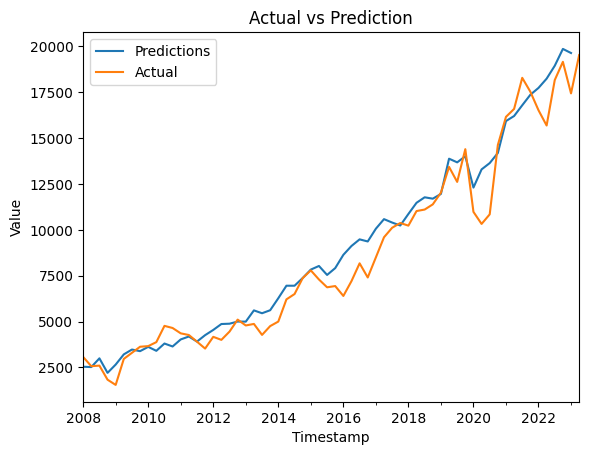

Shifted merged_df:


Predictions   Actual
Quarters                        
2008-03-31      2540.16  3073.29
2008-06-30      2522.40  2569.81
2008-09-30      2997.60  2601.46
2008-12-31      2207.31  1834.71
2009-03-31      2658.54  1549.87
2009-06-30      3214.21  2966.57
2009-09-30      3477.39  3298.84
2009-12-31      3389.20  3629.78
2010-03-31      3622.94  3663.76
2010-06-30      3407.45  3880.93
2010-09-30      3805.06  4767.01
2010-12-31      3643.99  4651.21
2011-03-31      4028.26  4359.30
2011-06-30      4186.86  4269.25
2011-09-30      3911.46  3905.58
2011-12-31      4261.11  3530.08
2012-03-31      4545.13  4169.17
2012-06-30      4867.76  4004.87
2012-09-30      4885.11  4454.41
2012-12-31      5002.30  5107.59
2013-03-31      4997.43  4788.96
2013-06-30      5610.69  4872.58
2013-09-30      5454.70  4274.49
2013-12-31      5618.60  4754.29
2014-03-31      6272.65  5001.21
2014-06-30      6954.21  6210.40
2014-09-30      6954.29  6501.23
2014-12-31      7373.75  7369.75
2015-03-31      7833.38  7788.82
2015-06-30      8030.14  7293.13
2015-09-30      7541.23  6868.20
2015-12-31      7913.35  6935.46
2016-03-31      8636.67  6396.78
2016-06-30      9118.90  7205.10
2016-09-30      9479.58  8174.56
2016-12-31      9364.65  7402.96
2017-03-31     10060.20  8498.36
2017-06-30     10581.24  9594.10
2017-09-30     10395.63 10111.81
2017-12-31     10233.55 10371.10
2018-03-31     10863.31 10227.14
2018-06-30     11471.99 11021.80
2018-09-30     11771.31 11103.45
2018-12-31     11695.52 11386.25
2019-03-31     11954.68 12025.58
2019-06-30     13874.05 13426.43
2019-09-30     13674.76 12609.86
2019-12-31     14007.12 14393.90
2020-03-31     12300.02 10977.13
2020-06-30     13291.15 10319.75
2020-09-30     13634.90 10842.25
2020-12-31     14183.95 14620.49
2021-03-31     15924.58 16153.80
2021-06-30     16198.94 16585.60
2021-09-30     16784.50 18279.63
2021-12-31     17358.25 17521.21
2022-03-31     17729.60 16514.49
2022-06-30     18234.59 15681.66
2022-09-30     18937.02 18159.13
2022-12-31     19854.13 19150.59
2023-03-31     19630.86 17431.50
2023-06-30          NaN 19519.29

In [70]:
import pandas as pd

# Convert index to DatetimeIndex if needed
df.index = pd.to_datetime(df.index)

# Set a frequency for the index
df.index.freq = 'Q'  # Replace 'D' with your desired frequency

last_column = df.iloc[:, -1].to_frame(name="Actual")

# Add the index from df to the last_column DataFrame
last_column.index = df.index

# Create a new timestamp for the additional cell
new_timestamp = pd.to_datetime('2023-06-30')

# Add the new cell to the last_column DataFrame
last_column.loc[new_timestamp] = None

# Add average value to the "last_column" DataFrame
last_column.loc[new_timestamp, 'Actual'] = average_close

# Merge forecast and last_column based on timestamp index
merged_df = forecast.merge(last_column, left_index=True, right_index=True, how='outer')

# Set pandas display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Plot the merged DataFrame as a line plot
merged_df.plot(kind='line')

# Set the plot title and labels
plt.title("Actual vs Prediction")
plt.xlabel("Timestamp")
plt.ylabel("Value")

# Display the plot
plt.show()

# Print the modified merged_df
print("Shifted merged_df:")
merged_df

## YOY tranformation

In [71]:
feature_names

Feature Names
0                                                                                                                                                            const
1                                                          Gross NPA: Banking Services Industry: Values for Y-o-Y: Interim Corporate Sector Aggregates Rs. million
2                                                                                                         Investments in non-SLR securities  Shares issued by PSUs
3                                                                    Outstanding Credit of Scheduled Commercial Banks: By Economic Activity : Rs. Million_Non-food
4  Companies - Total: Banking performance indicators: Profitability: Total Interest Income (Net of Interest Tax) (YTD): Private Sector Banks: Domestic Rs. million
5                                                                                                                                   (PUBLIC) Cash Funds Rs.Million
6                                                                                                                                       Auto_NiFTY financial index

In [72]:
df_gr.index = df_gr.index.shift(-m)
df_gr.iloc[:, -1] = df_gr.iloc[:, -1].shift(m)
df_gr = df_gr.drop(df_gr.columns[-1], axis=1)
common_headers = df_gr.columns.intersection(feature_names["Feature Names"])

df_gr = df_gr[common_headers]
df_gr = df_gr.merge(merged_df, left_index=True, right_index=True)

for column in df_gr.columns:
    if column != "Population: Base year 2011-12: At current prices: Y-o-Y % change_Per cent":
        df_gr[column] = df_gr[column].pct_change(periods=4) * 100
        
# drop 1st row as its used as reference for calculating YOY% change       
df_gr = df_gr.iloc[4:]

print("After Y-O-Y % Change Feature Transformation and dropping 1st row ")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_gr

After Y-O-Y % Change Feature Transformation and dropping 1st row 


Gross NPA: Banking Services Industry: Values for Y-o-Y: Interim Corporate Sector Aggregates Rs. million  \
Quarters                                                                                                              
2009-03-31                                                                                                    14.10   
2009-06-30                                                                                                    17.62   
2009-09-30                                                                                                    23.83   
2009-12-31                                                                                                    27.34   
2010-03-31                                                                                                    27.05   
2010-06-30                                                                                                    28.75   
2010-09-30                                                                                                    30.50   
2010-12-31                                                                                                    19.09   
2011-03-31                                                                                                    20.93   
2011-06-30                                                                                                    29.95   
2011-09-30                                                                                                    36.01   
2011-12-31                                                                                                    53.20   
2012-03-31                                                                                                    49.29   
2012-06-30                                                                                                    51.77   
2012-09-30                                                                                                    46.17   
2012-12-31                                                                                                    42.56   
2013-03-31                                                                                                    36.17   
2013-06-30                                                                                                    40.39   
2013-09-30                                                                                                    37.88   
2013-12-31                                                                                                    36.82   
2014-03-31                                                                                                    35.49   
2014-06-30                                                                                                    21.41   
2014-09-30                                                                                                    17.43   
2014-12-31                                                                                                    20.15   
2015-03-31                                                                                                    23.83   
2015-06-30                                                                                                    26.62   
2015-09-30                                                                                                    25.75   
2015-12-31                                                                                                    46.52   
2016-03-31                                                                                                    89.18   
2016-06-30                                                                                                    94.28   
2016-09-30                                                                                                    96.66   
2016-12-31                                                                           

# TIME SERIES MODELLING

In [73]:
ds = ds.drop(ds.columns[-m], axis=1) # ds is comming from 2.4.2
ds # this dataframe has all significant features comming from granger test but no shift or AR

Gross NPA: Banking Services Industry: Values for Y-o-Y: Interim Corporate Sector Aggregates Rs. million  \
Quarters                                                                                                              
2008-03-31                                                                                                520389.80   
2008-06-30                                                                                                513687.70   
2008-09-30                                                                                                536554.80   
2008-12-31                                                                                                557970.70   
2009-03-31                                                                                                593788.30   
2009-06-30                                                                                                604188.40   
2009-09-30                                                                                                664434.80   
2009-12-31                                                                                                710516.70   
2010-03-31                                                                                                754389.20   
2010-06-30                                                                                                777897.40   
2010-09-30                                                                                                867090.10   
2010-12-31                                                                                                846188.70   
2011-03-31                                                                                                912290.20   
2011-06-30                                                                                               1010885.70   
2011-09-30                                                                                               1179290.00   
2011-12-31                                                                                               1296382.40   
2012-03-31                                                                                               1361965.50   
2012-06-30                                                                                               1534246.50   
2012-09-30                                                                                               1723771.30   
2012-12-31                                                                                               1848162.20   
2013-03-31                                                                                               1854624.20   
2013-06-30                                                                                               2153893.40   
2013-09-30                                                                                               2376755.20   
2013-12-31                                                                                               2528572.30   
2014-03-31                                                                                               2512871.40   
2014-06-30                                                                                               2615107.10   
2014-09-30                                                                                               2790941.00   
2014-12-31                                                                                               3038190.10   
2015-03-31                                                                                               3111655.40   
2015-06-30                                                                                               3311268.30   
2015-09-30                                                                                               3509476.60   
2015-12-31                                                                           

In [74]:
ds.shape

(61, 7)

## new names

In [75]:
# Define the new column names for the columns you want to rename
new_column_names = {
    'Gross NPA: Banking Services Industry: Values for Y-o-Y: Interim Corporate Sector Aggregates Rs. million': 'Gross NPA: Banks(Rs.Million)',
    'Investments in non-SLR securities Shares issued by PSUs': 'Investments in non-SLR',
    'Outstanding Credit of Scheduled Commercial Banks: By Economic Activity : Rs. Million_Non-food': 'Outstanding Credit(Rs.Million)',
    '(PUBLIC) Due from Banks/FIs/CCPs Rs.Million': 'Due from PSU Banks(Rs.Million)',
    'Companies - Total: Banking performance indicators: Profitability: Total Interest Income (Net of Interest Tax) (YTD): Private Sector Banks: Domestic Rs. million': 'Total Interest Income Pvt Banks(Rs.Million)',
    '(PUBLIC) Cash Funds Rs.Million': 'Cash funds PSU Banks(Rs.Million)'
}

# Update the DataFrame column names using the rename method with the dictionary
ds.rename(columns=new_column_names, inplace=True)
# Display the updated DataFrame
ds

Gross NPA: Banks(Rs.Million)  \
Quarters                                   
2008-03-31                     520389.80   
2008-06-30                     513687.70   
2008-09-30                     536554.80   
2008-12-31                     557970.70   
2009-03-31                     593788.30   
2009-06-30                     604188.40   
2009-09-30                     664434.80   
2009-12-31                     710516.70   
2010-03-31                     754389.20   
2010-06-30                     777897.40   
2010-09-30                     867090.10   
2010-12-31                     846188.70   
2011-03-31                     912290.20   
2011-06-30                    1010885.70   
2011-09-30                    1179290.00   
2011-12-31                    1296382.40   
2012-03-31                    1361965.50   
2012-06-30                    1534246.50   
2012-09-30                    1723771.30   
2012-12-31                    1848162.20   
2013-03-31                    1854624.20   
2013-06-30                    2153893.40   
2013-09-30                    2376755.20   
2013-12-31                    2528572.30   
2014-03-31                    2512871.40   
2014-06-30                    2615107.10   
2014-09-30                    2790941.00   
2014-12-31                    3038190.10   
2015-03-31                    3111655.40   
2015-06-30                    3311268.30   
2015-09-30                    3509476.60   
2015-12-31                    4451531.50   
2016-03-31                    5886617.50   
2016-06-30                    6433166.80   
2016-09-30                    6901835.90   
2016-12-31                    7179572.00   
2017-03-31                    7113117.50   
2017-06-30                    8301830.50   
2017-09-30                    8405154.50   
2017-12-31                    8860739.80   
2018-03-31                   10242287.00   
2018-06-30                   10034040.80   
2018-09-30                    9990316.70   
2018-12-31                    9663557.10   
2019-03-31                    9004522.20   
2019-06-30                    9274140.40   
2019-09-30                    9259600.20   
2019-12-31                    9385827.50   
2020-03-31                    7557758.30   
2020-06-30                    8447877.60   
2020-09-30                    8007203.80   
2020-12-31                    7430496.60   
2021-03-31                    8191629.80   
2021-06-30                    8234175.90   
2021-09-30                    7863936.30   
2021-12-31                    7583413.50   
2022-03-31                    7311027.50   
2022-06-30                    7220379.70   
2022-09-30                    6718875.30   
2022-12-31                    6133594.00   
2023-03-31                    5614960.70   

            Investments in non-SLR securities  Shares issued by PSUs  \
Quarters                                                               
2008-03-31                                                  37025.70   
2008-06-30                                                  37025.70   
2008-09-30                                                  34240.90   
2008-12-31                                                  34781.40   
2009-03-31                                                  27690.60   
2009-06-30                                                  25721.60   
2009-09-30                                                  22286.90   
2009-12-31                                                  27468.00   
2010-03-31                                                  46247.70   
2010-06-30                                                  66492.00   
2010-09-30                                                  70996.70   
2010-12-31                                                  82345.70   
2011-03-31                                                  89647.90   
2011-06-30                                                  84014.00   
2011-09-30                                                  93232.50   
2011-12-31     

## Line plots

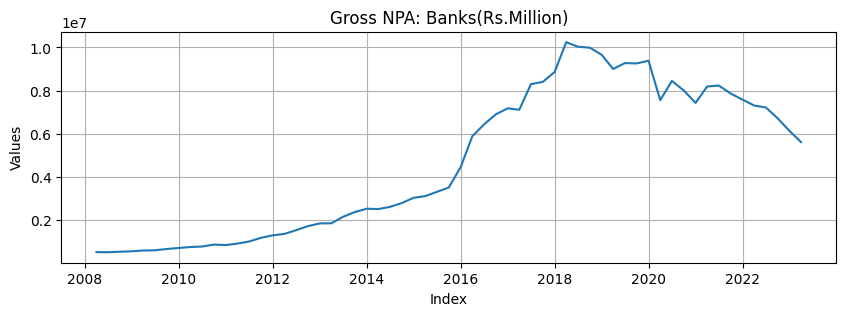

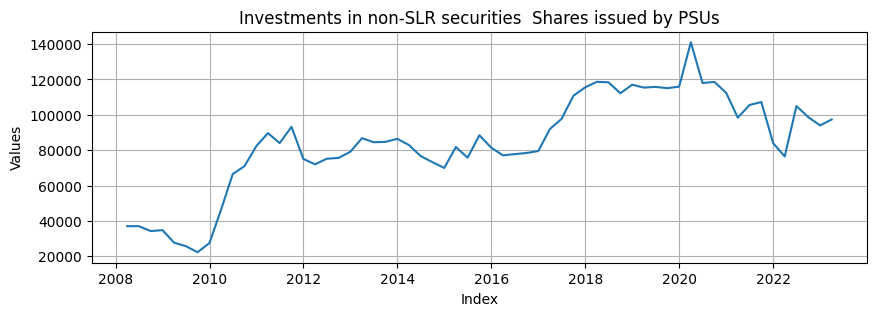

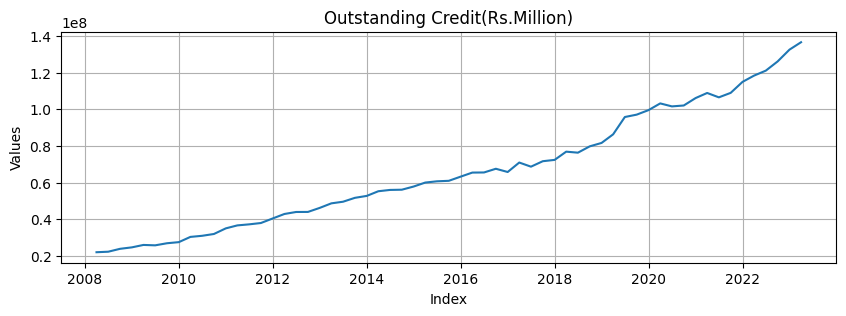

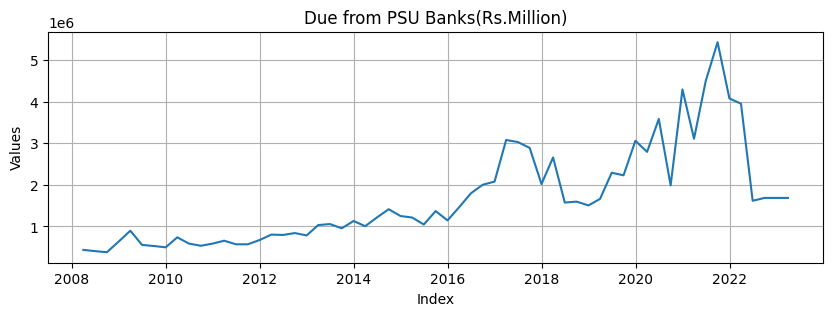

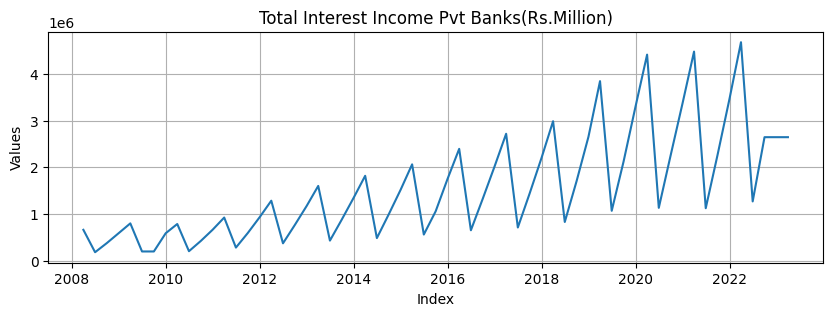

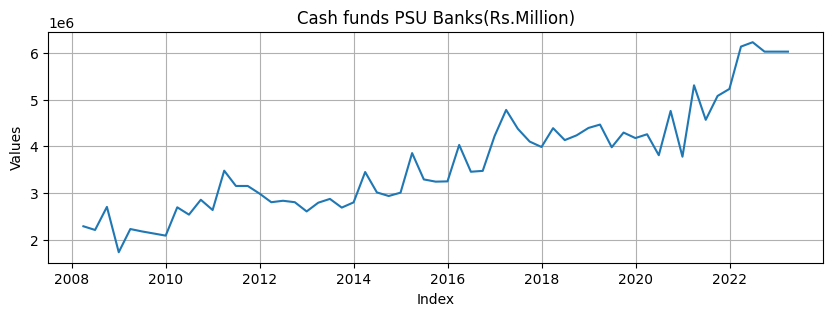

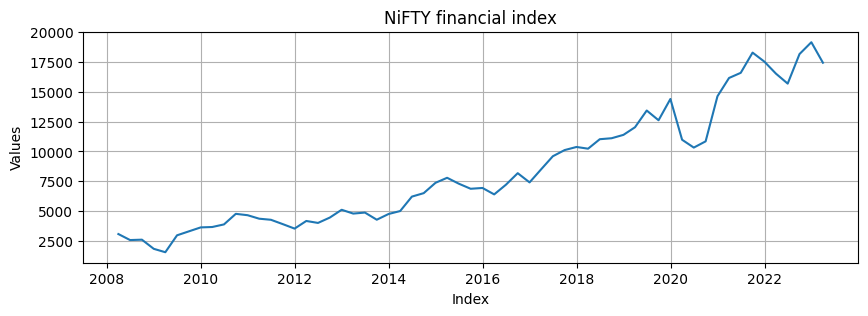

In [76]:
import matplotlib.pyplot as plt

# Get the column names of ds
column_names = ds.columns

# Define the figure size (width, height) in inches
figure_size = (10, 3)  # Change these values as per your preference

# Create line plots for each column
for column in column_names:
    plt.figure(figsize=figure_size)  # Set the figure size
    plt.plot(ds[column])
    plt.title(column)  # Set the column name as the plot title
    plt.xlabel("Index")  # Set the x-axis label
    plt.ylabel("Values")  # Set the y-axis label
    plt.grid(True)  # Add gridlines for better visualization
    plt.show()  # Display the plot


## Time series Decomposition

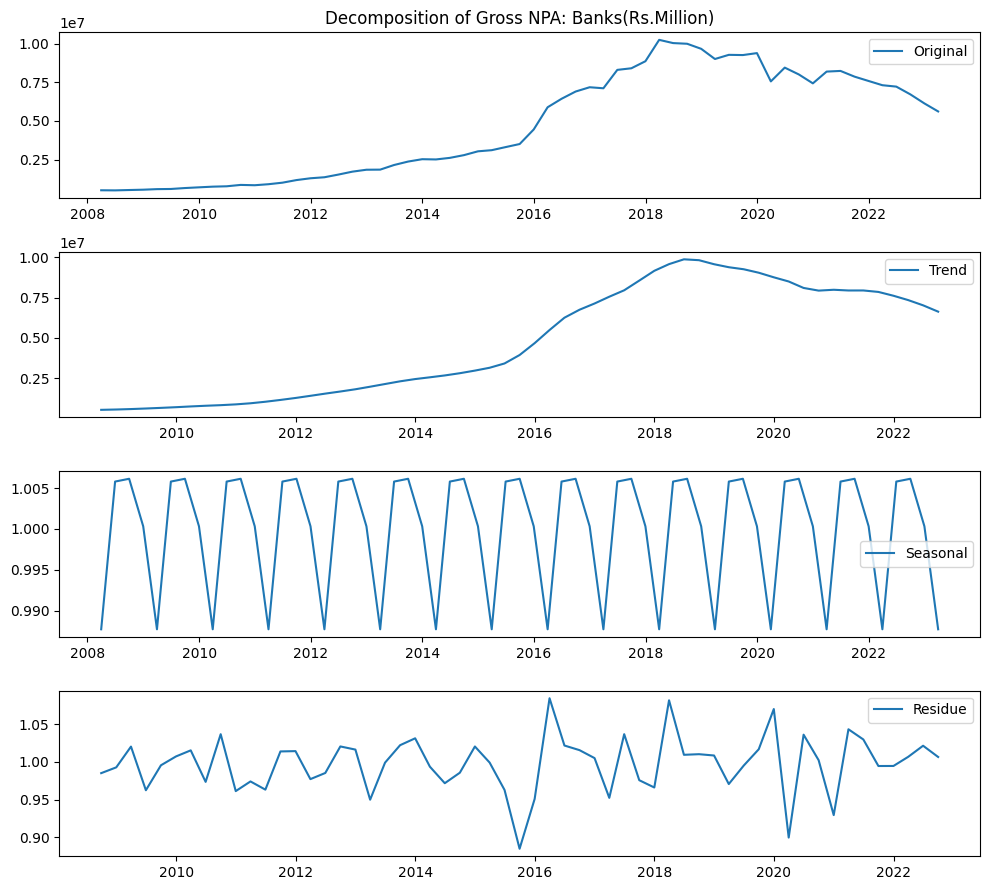

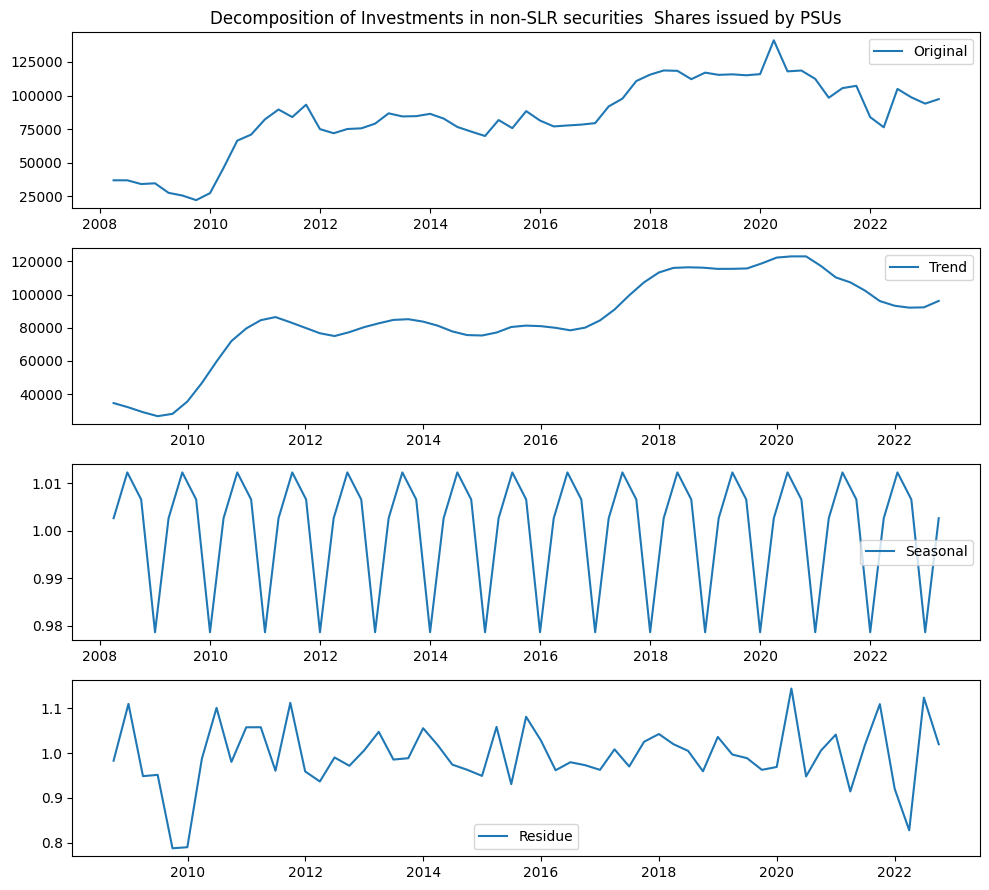

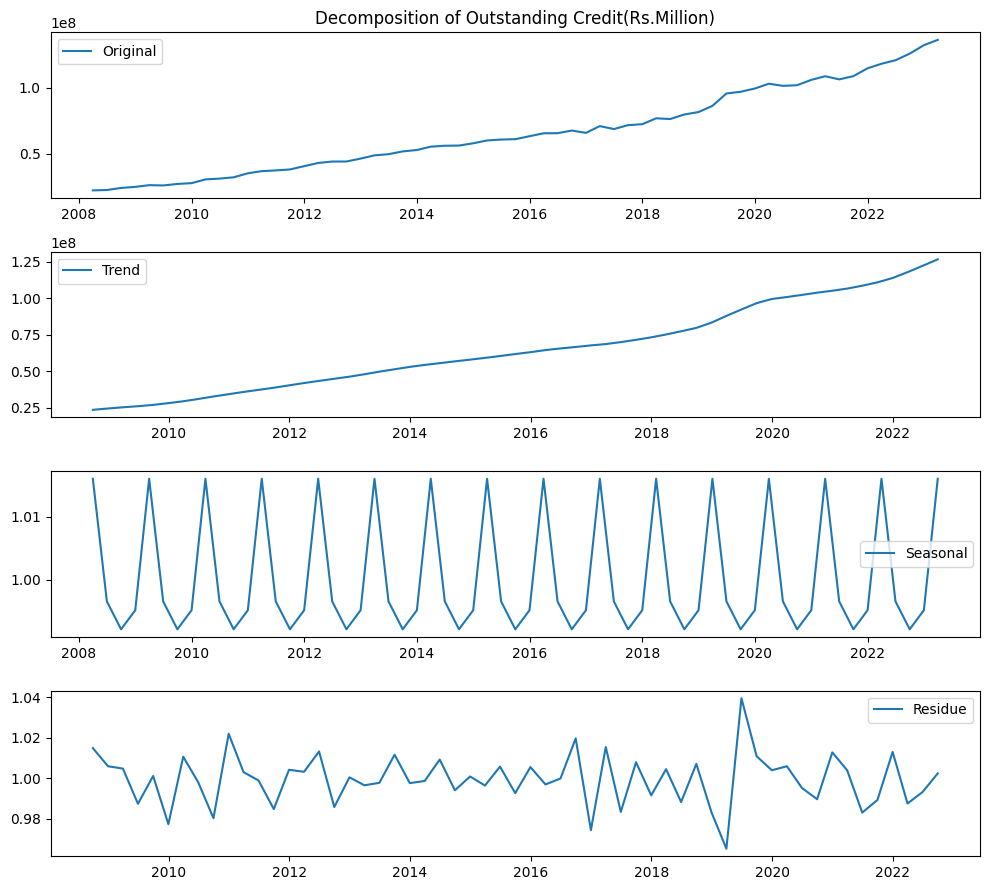

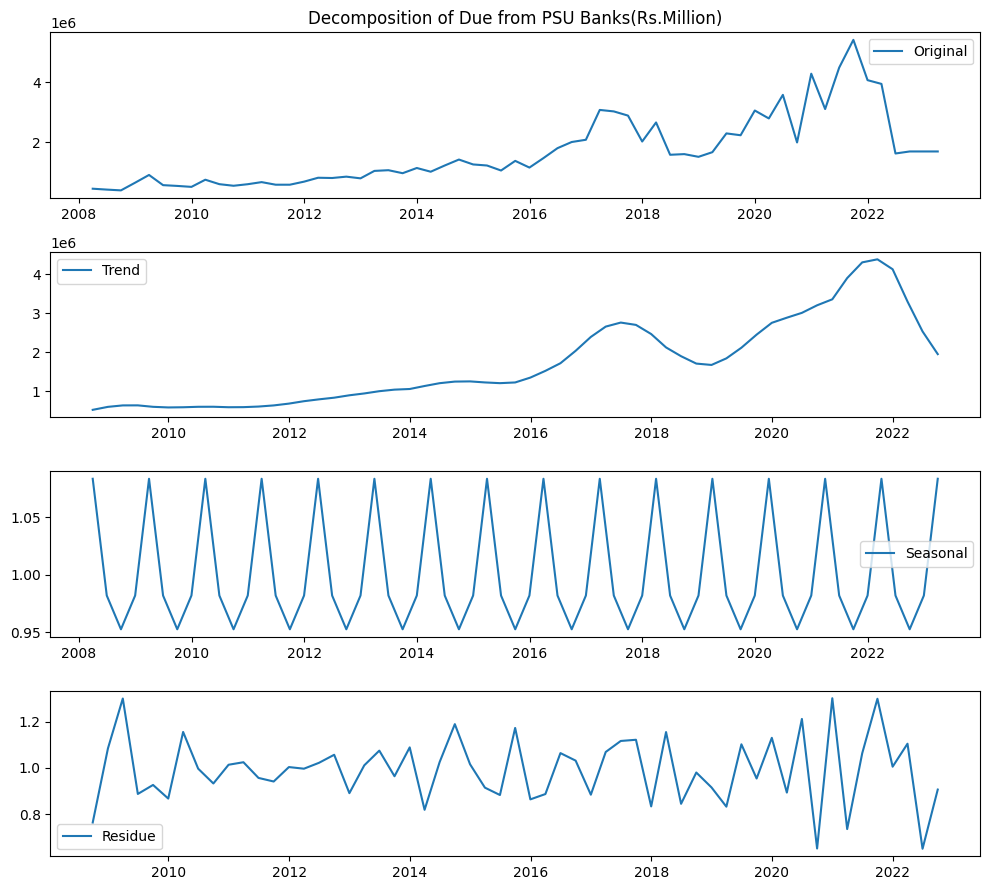

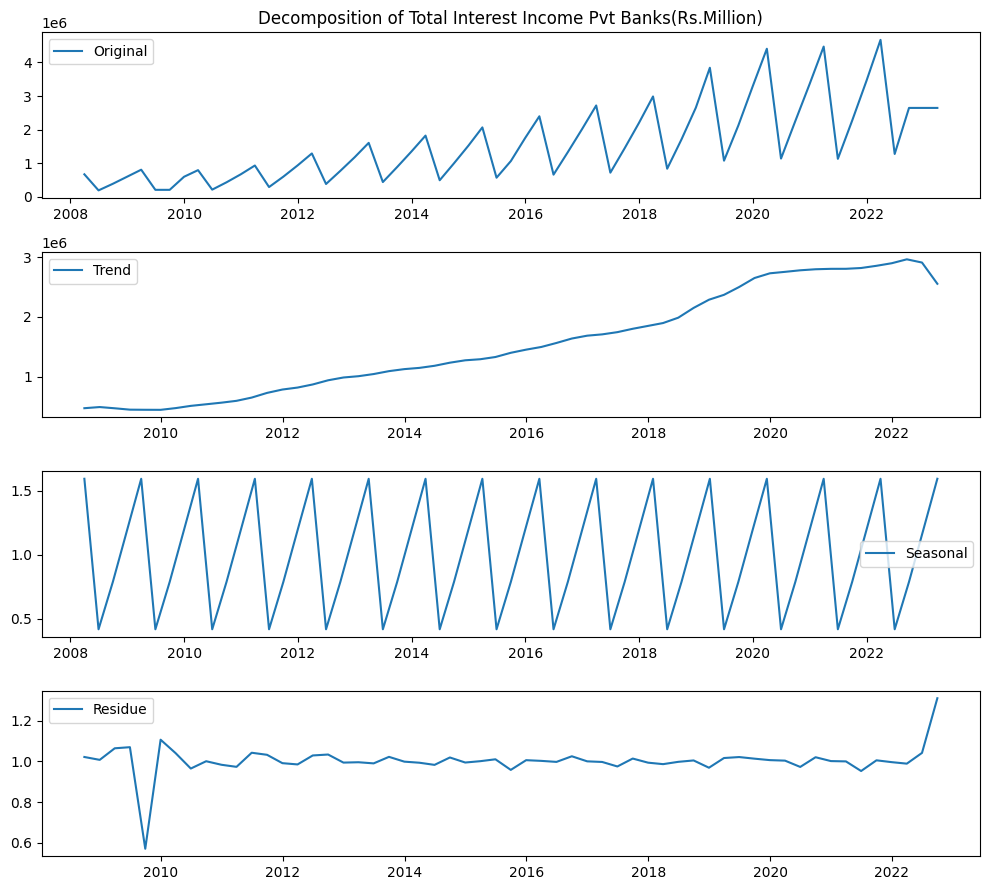

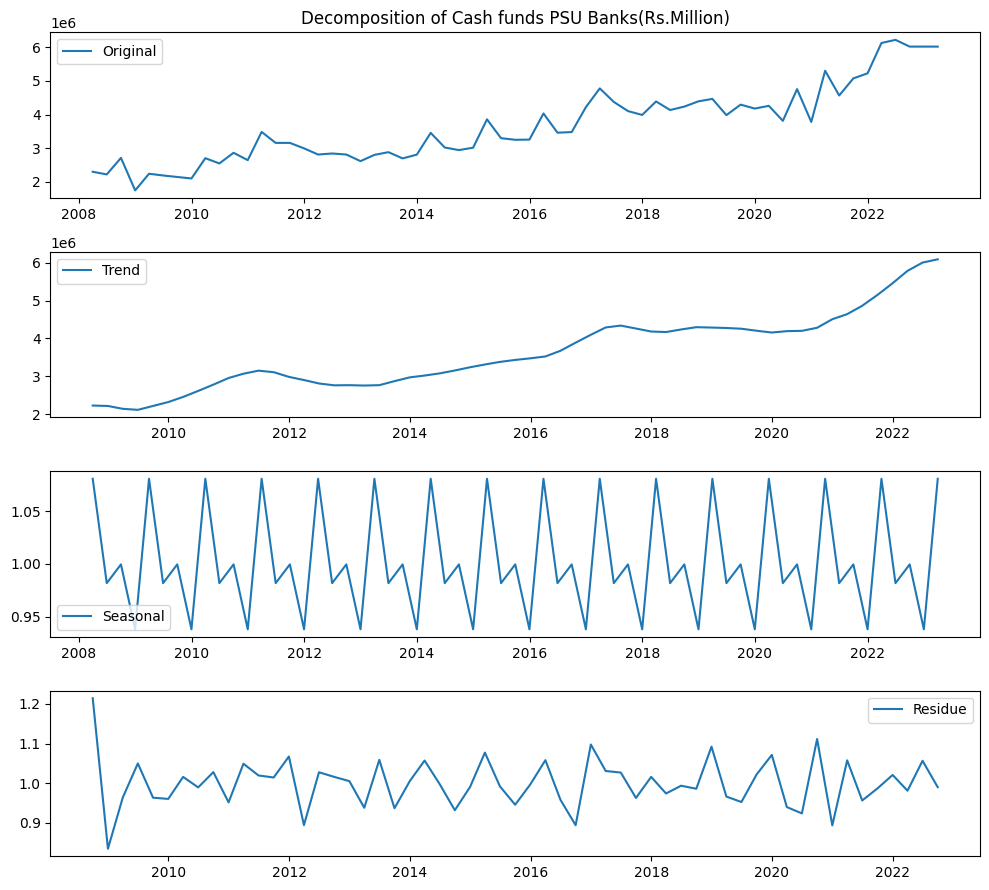

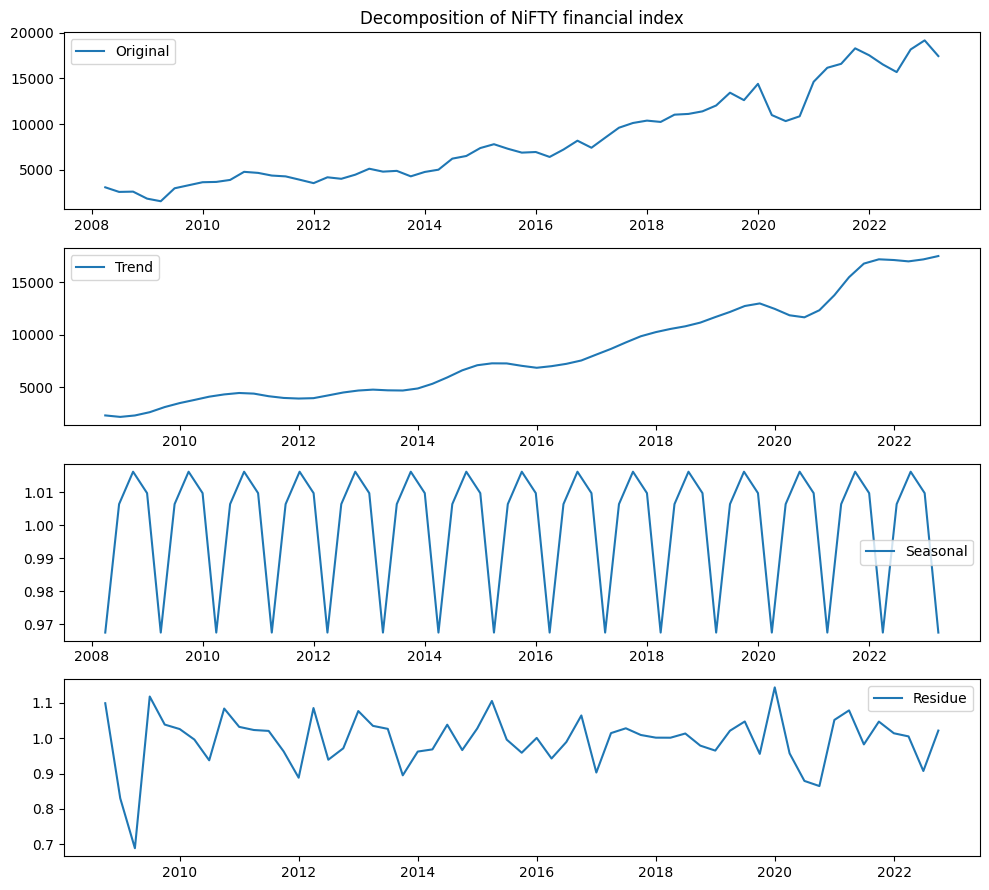

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Get the column names of ds excluding the last column
column_names = ds.columns[:]

# Define the seasonal frequency
seasonal_freq = 4
# In time series analysis, the freq parameter indicates the number of observations per seasonal cycle. 
# Since you have quarterly data, setting freq=4 will inform the seasonal decomposition that the seasonal pattern 
# repeats every four data points (quarters).


# Define the figure size (width, height) in inches
figure_size = (10, 9)  # Change these values as per your preference

# Create line plots for each column and decompose trend and residue
for column in column_names:
    # Decompose the time series using the multiplicative model
    decomposition_result = seasonal_decompose(ds[column], model='multiplicative', period=seasonal_freq)
    
    # Access the decomposed components
    trend = decomposition_result.trend
    seasonal = decomposition_result.seasonal
    residue = decomposition_result.resid
    
    # Plotting the decomposed components
    plt.figure(figsize=figure_size)
    plt.subplot(4, 1, 1)
    plt.plot(ds[column], label='Original')
    plt.legend()
    plt.title(f"Decomposition of {column}")
    plt.subplot(4, 1, 2)
    plt.plot(trend, label='Trend')
    plt.legend()
    plt.subplot(4, 1, 3)
    plt.plot(seasonal, label='Seasonal')
    plt.legend()
    plt.subplot(4, 1, 4)
    plt.plot(residue, label='Residue')
    plt.legend()

    plt.tight_layout()
    plt.show()


## Stationarity check visually

White noise is considered a stationary series due to its specific statistical properties, even though it appears to have a constant mean and is difficult to predict. Let's break down the characteristics of white noise and how they relate to stationarity:

1. **Constant Mean:** White noise has a mean of zero, which is a constant value over time. While this might seem counterintuitive to the concept of stationarity (where the mean is often thought to be a constant), it's important to understand that stationarity doesn't require the mean to be non-changing; rather, it requires the mean to be constant and not dependent on time. White noise meets this criterion by having a mean of zero that doesn't vary with time.

2. **Constant Variance:** White noise also has a constant variance, which further contributes to its stationarity. The variance remains the same across all time points, and this property aligns with the stationarity requirement that statistical properties should not change with time.

3. **Independence and Lack of Structure:** White noise is a series of independent and identically distributed random variables. This lack of structure and correlation across time points makes it difficult to predict future values based on past observations. The randomness and lack of discernible pattern make white noise appear unpredictable, but its predictability (or lack thereof) is not the sole criterion for defining stationarity.

4. **Autocorrelation:** While white noise lacks autocorrelation (correlation with its own lagged values), this property doesn't necessarily make it non-stationary. In fact, many stationary time series might also exhibit low or no autocorrelation.

In summary, the stationarity of white noise is based on its consistent mean and variance over time, which aligns with the stationarity definition that statistical properties remain constant over time. The term "white" in "white noise" indicates the absence of any discernible pattern or structure, and this characteristic contributes to its unpredictability. Despite being unpredictable, white noise meets the criteria of stationarity because its statistical properties satisfy the stationarity requirements.

Plotting original data points alongside rolling mean and rolling standard deviation contributes to the evaluation of stationarity in the time series in the following ways:

1. **Visualizing Trend and Fluctuations:** By plotting the original data points, you can observe the inherent trend, seasonal patterns, and fluctuations in the time series. The rolling mean provides a smoothed representation of the data, making it easier to identify the underlying trend amid short-term fluctuations.

2. **Detecting Changes in Variability:** The rolling standard deviation depicts the variability or volatility of the data over time. Sudden changes in the rolling standard deviation can indicate shifts in the data's variance, which might suggest non-stationarity. In a stationary time series, the variance should ideally remain constant over time.

3. **Stationarity Assessment:** Comparing the original data with the rolling mean and rolling standard deviation helps in assessing whether the statistical properties of the time series remain relatively constant across time. In a stationary time series, the mean and variance should be stable, and their patterns should not exhibit systematic changes.

4. **Identifying Seasonality:** The rolling mean can help in identifying periodic patterns or seasonality in the data. If the rolling mean shows consistent periodic fluctuations, it might indicate a non-stationary time series influenced by seasonality.

5. **Insights into Transformation:** If the rolling mean and standard deviation exhibit clear trends or patterns that the original data does not show, it could suggest that the data might benefit from transformations (such as differencing or logarithmic transformations) to achieve stationarity.

6. **Decision Making:** The visual representation provided by these plots aids in making informed decisions regarding further analysis or modeling. If the original data, rolling mean, and rolling standard deviation display significant shifts, trends, or irregularities, it suggests that the time series might not be stationary and would require appropriate preprocessing or modeling techniques.

In summary, these plots offer a way to intuitively observe and evaluate the stationarity of a time series by analyzing trends, fluctuations, and variability, which are essential factors in determining the suitability of time series data for various analysis and modeling approaches.

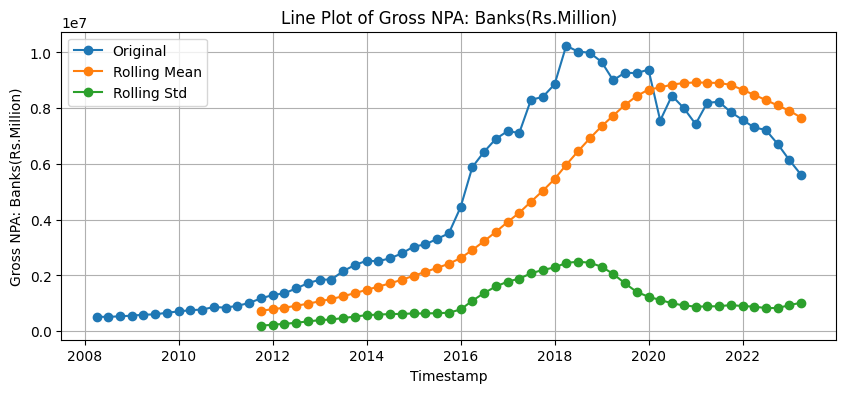

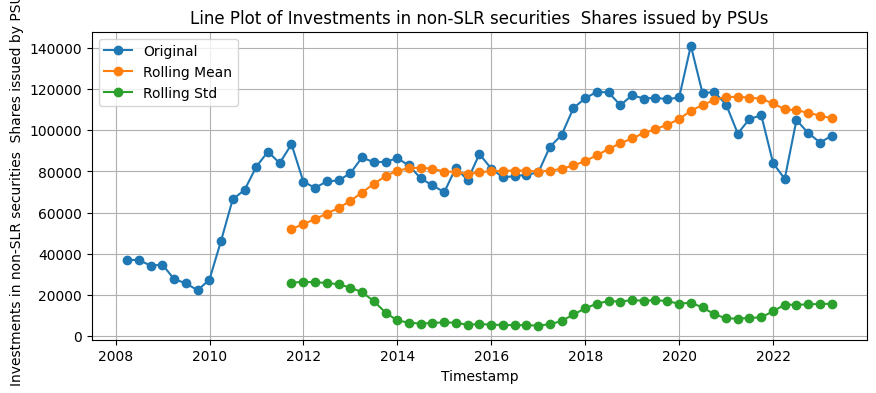

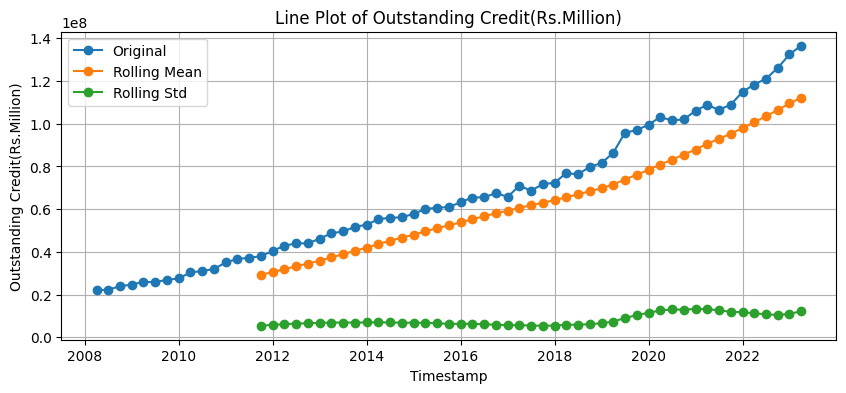

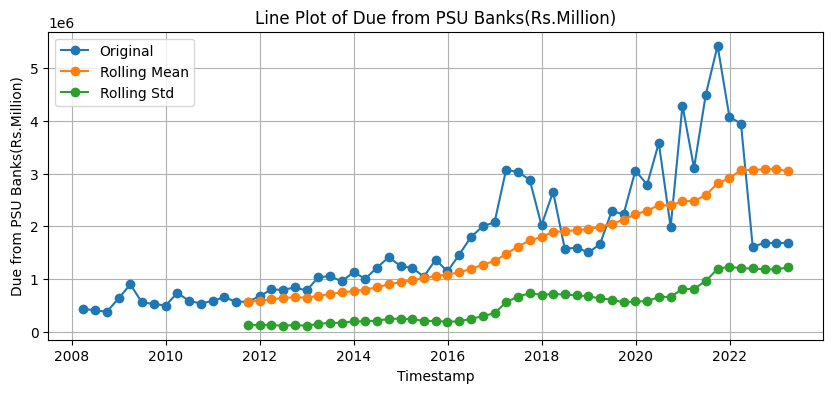

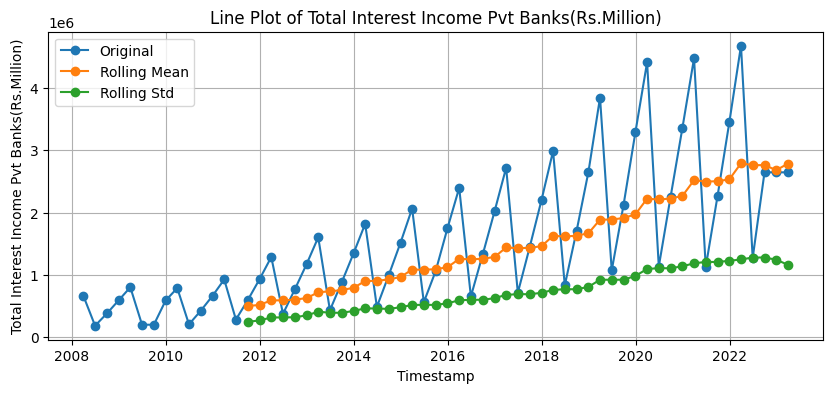

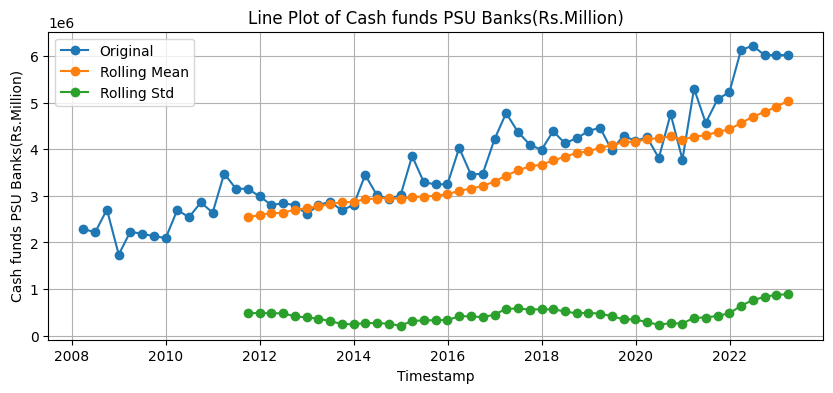

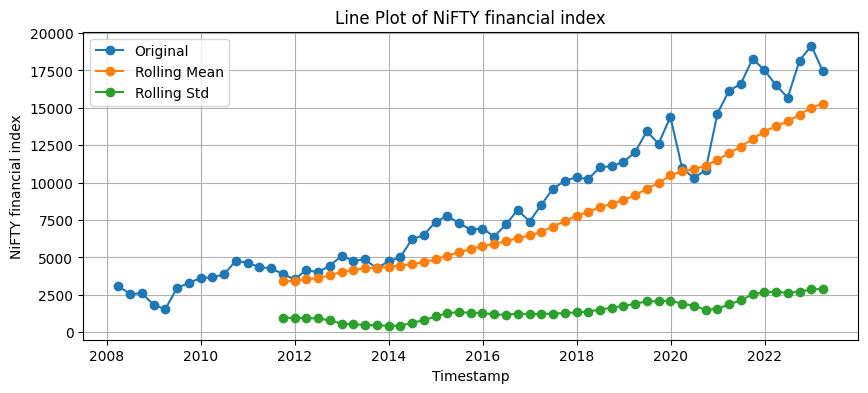

In [78]:

# Get the column names of ds excluding the last column
columns_to_plot = ds.columns[:]

# Define the figure size (width, height) in inches
figure_size = (10, 4)  # Change these values as per your preference

# Create line plots for each column and include rolling mean and rolling std
for column in columns_to_plot:
    plt.figure(figsize=figure_size)  # Set the figure size
    plt.plot(ds.index, ds[column], marker='o', label='Original')
    plt.plot(ds.index, ds[column].rolling(window=15).mean(), marker='o', label='Rolling Mean')
    plt.plot(ds.index, ds[column].rolling(window=15).std(), marker='o', label='Rolling Std')
    plt.title(f"Line Plot of {column}")
    plt.xlabel('Timestamp')
    plt.ylabel(column)
    plt.grid(True)  # Add gridlines for better visualization
    plt.legend()  # Show the legend with labels for each line
    plt.show()  # Display the plot


## assumption-Stationarity check via  Dickey–Fuller test


In [79]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

stationary_data = []
nonstationary_data = []

# Perform Augmented Dickey-Fuller test on each column except the last one
for column in ds.columns[:]:
    result = adfuller(ds[column])
    p_value = result[1]
    if p_value <= 0.05:
        stationary_data.append((column, result[0], p_value))
    else:
        nonstationary_data.append((column, result[0], p_value))

# Summary table for stationary features
stationary_table = pd.DataFrame(stationary_data, columns=['Feature Name', 'Statistic Value', 'p-value (LOS = 5%)'])
stationary_table.index += 1

# Summary table for non-stationary features
nonstationary_table = pd.DataFrame(nonstationary_data, columns=['Feature Name', 'Statistic Value', 'p-value (LOS = 5%)'])
nonstationary_table.index += 1

# Print the summary tables
print("Summary Table for Stationary Features:")
stationary_table

Summary Table for Stationary Features:


Feature Name  Statistic Value  \
1  Total Interest Income Pvt Banks(Rs.Million)            -3.51   

   p-value (LOS = 5%)  
1                0.01

In [80]:
print("\nSummary Table for Non-Stationary Features:")
nonstationary_table


Summary Table for Non-Stationary Features:


Feature Name  Statistic Value  \
1                              Gross NPA: Banks(Rs.Million)            -1.49   
2  Investments in non-SLR securities  Shares issued by PSUs            -1.90   
3                            Outstanding Credit(Rs.Million)             2.91   
4                            Due from PSU Banks(Rs.Million)            -0.25   
5                          Cash funds PSU Banks(Rs.Million)            -0.07   
6                                     NiFTY financial index             2.57   

   p-value (LOS = 5%)  
1                0.54  
2                0.33  
3                1.00  
4                0.93  
5                0.95  
6                1.00

In [81]:
# Calculate percentage of non-stationary features
total_features = len(ds.columns) - 1  # Exclude "Years" column
nonstationary_count = len(nonstationary_data)
nonstationary_percentage = (nonstationary_count / total_features) * 100

print("\nPercentage of Non-Stationary Features: {:.2f}%".format(nonstationary_percentage))


Percentage of Non-Stationary Features: 100.00%


## 1st order differencing

In [82]:
# Take the first-order difference
df_1 = ds.diff()
df_1 = df_1.drop(df_1.index[0])

df_1.shape # one more row had to be dropped 

(60, 7)

In [83]:
ds.shape # size before differencing

(61, 7)

In [84]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

stationary_data = []
nonstationary_data = []

# Perform Augmented Dickey-Fuller test on each column except the last one
for column in df_1.columns[:]:
    result = adfuller(df_1[column])
    p_value = result[1]
    if p_value <= 0.05:
        stationary_data.append((column, result[0], p_value))
    else:
        nonstationary_data.append((column, result[0], p_value))

# Summary table for stationary features
stationary_table = pd.DataFrame(stationary_data, columns=['Feature Name', 'Statistic Value', 'p-value (LOS = 5%)'])
stationary_table.index += 1

# Summary table for non-stationary features
nonstationary_table = pd.DataFrame(nonstationary_data, columns=['Feature Name', 'Statistic Value', 'p-value (LOS = 5%)'])
nonstationary_table.index += 1

# Print the summary tables
print("Summary Table for Stationary Features:")
stationary_table


Summary Table for Stationary Features:


Feature Name  Statistic Value  \
1  Investments in non-SLR securities  Shares issued by PSUs            -8.10   
2                            Outstanding Credit(Rs.Million)            -7.37   
3                            Due from PSU Banks(Rs.Million)            -3.91   
4                          Cash funds PSU Banks(Rs.Million)            -3.75   
5                                     NiFTY financial index            -5.96   

   p-value (LOS = 5%)  
1                0.00  
2                0.00  
3                0.00  
4                0.00  
5                0.00

In [85]:
print("\nSummary Table for Non-Stationary Features:")
nonstationary_table


Summary Table for Non-Stationary Features:


Feature Name  Statistic Value  \
1                 Gross NPA: Banks(Rs.Million)            -2.22   
2  Total Interest Income Pvt Banks(Rs.Million)            -0.66   

   p-value (LOS = 5%)  
1                0.20  
2                0.86

In [86]:
# Calculate percentage of non-stationary features
total_features = len(ds.columns) - 1  # Exclude "Years" column
nonstationary_count = len(nonstationary_data)
nonstationary_percentage = (nonstationary_count / total_features) * 100

print("\nPercentage of Non-Stationary Features: {:.2f}%".format(nonstationary_percentage))


Percentage of Non-Stationary Features: 33.33%


## 2nd order differencing

In [87]:
# Take the first-order difference
df_1 = df_1.diff()
df_1 = df_1.drop(df_1.index[0])

df_1.shape # one more row had to be dropped 

(59, 7)

In [88]:
ds.shape # size before differencing

(61, 7)

In [89]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

stationary_data = []
nonstationary_data = []

# Perform Augmented Dickey-Fuller test on each column except the last one
for column in df_1.columns[:]:
    result = adfuller(df_1[column])
    p_value = result[1]
    if p_value <= 0.05:
        stationary_data.append((column, result[0], p_value))
    else:
        nonstationary_data.append((column, result[0], p_value))

# Summary table for stationary features
stationary_table = pd.DataFrame(stationary_data, columns=['Feature Name', 'Statistic Value', 'p-value (LOS = 5%)'])
stationary_table.index += 1

# Summary table for non-stationary features
nonstationary_table = pd.DataFrame(nonstationary_data, columns=['Feature Name', 'Statistic Value', 'p-value (LOS = 5%)'])
nonstationary_table.index += 1

# Print the summary tables
print("Summary Table for Stationary Features:")
stationary_table


Summary Table for Stationary Features:


Feature Name  Statistic Value  \
1                              Gross NPA: Banks(Rs.Million)           -10.77   
2  Investments in non-SLR securities  Shares issued by PSUs            -6.89   
3                            Outstanding Credit(Rs.Million)            -9.10   
4                            Due from PSU Banks(Rs.Million)            -2.94   
5               Total Interest Income Pvt Banks(Rs.Million)            -3.13   
6                          Cash funds PSU Banks(Rs.Million)            -7.77   
7                                     NiFTY financial index            -6.84   

   p-value (LOS = 5%)  
1                0.00  
2                0.00  
3                0.00  
4                0.04  
5                0.02  
6                0.00  
7                0.00

In [90]:
print("\nSummary Table for Non-Stationary Features:")
nonstationary_table


Summary Table for Non-Stationary Features:


Empty DataFrame
Columns: [Feature Name, Statistic Value, p-value (LOS = 5%)]
Index: []

In [91]:
# Calculate percentage of non-stationary features
total_features = len(ds.columns) - 1  # Exclude "Years" column
nonstationary_count = len(nonstationary_data)
nonstationary_percentage = (nonstationary_count / total_features) * 100

print("\nPercentage of Non-Stationary Features: {:.2f}%".format(nonstationary_percentage))


Percentage of Non-Stationary Features: 0.00%


## Stationarity check visually of differentiated series

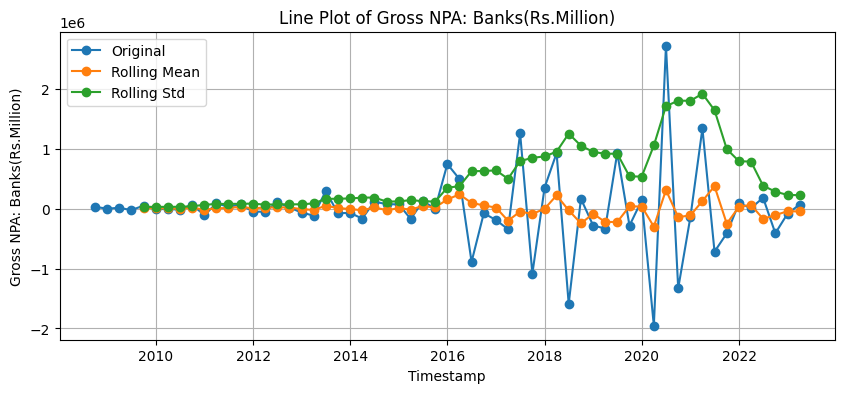

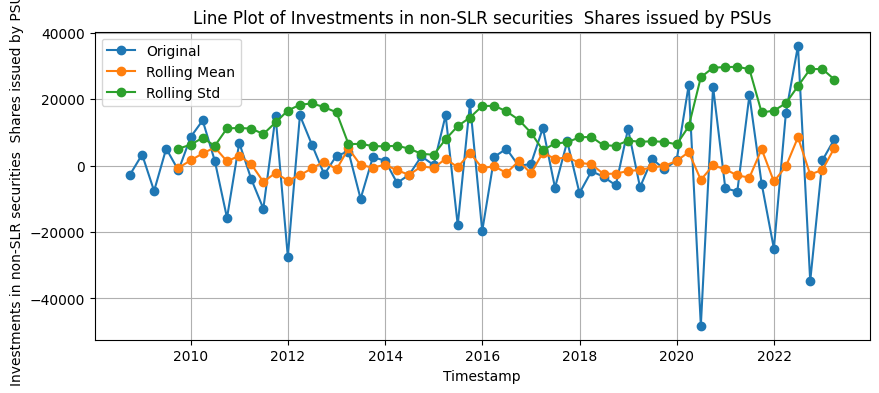

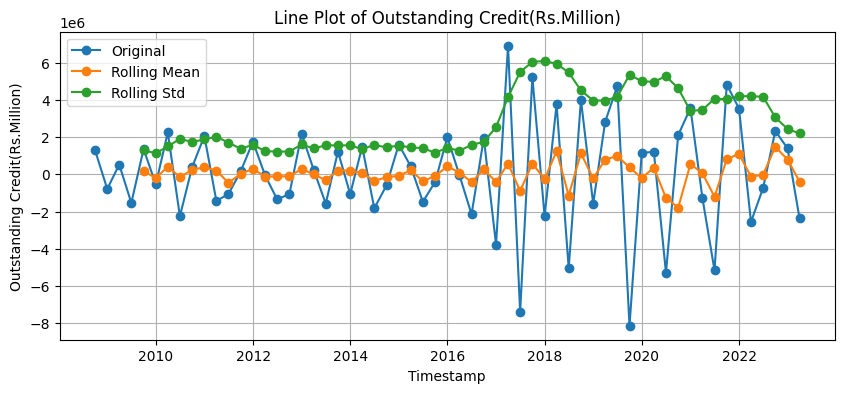

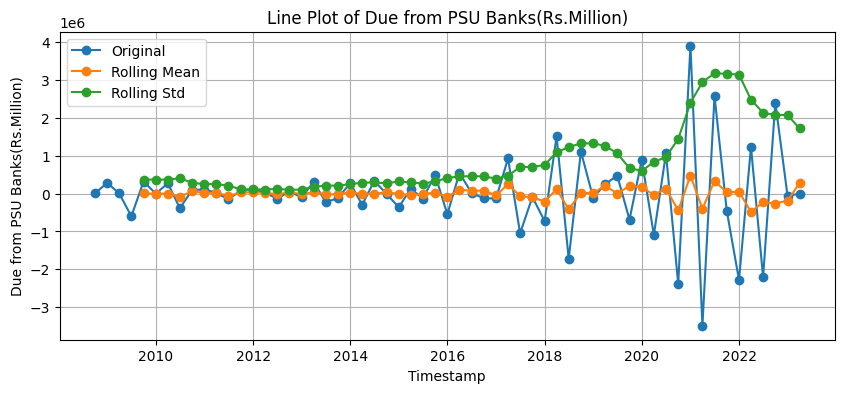

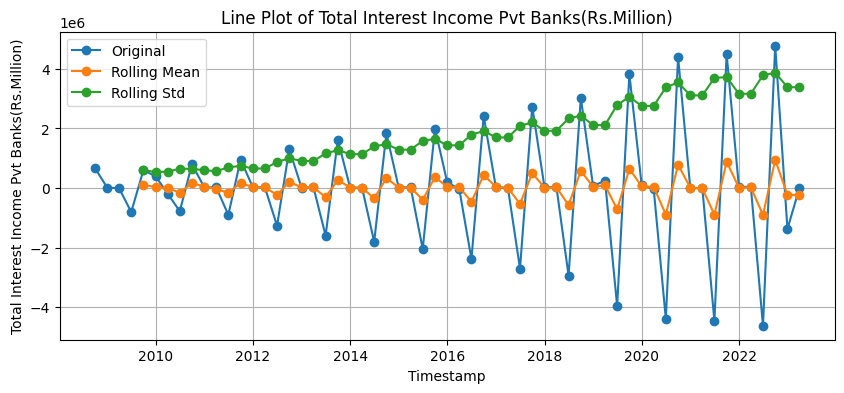

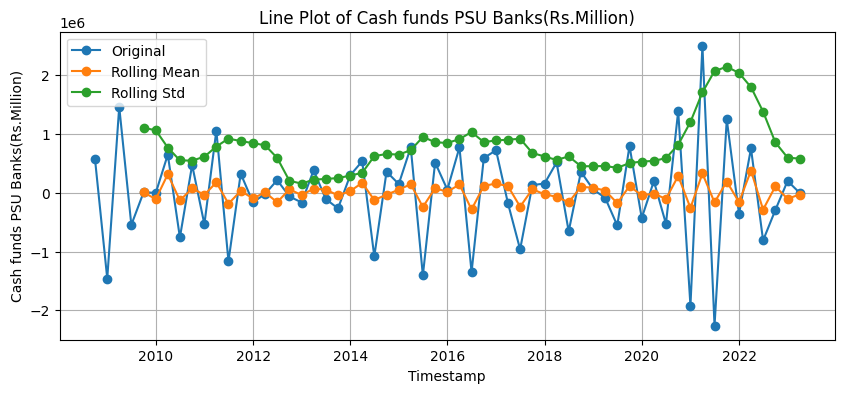

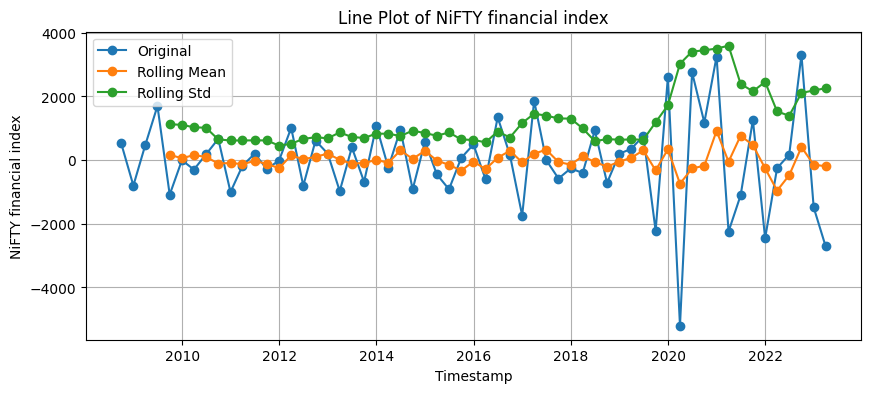

In [92]:

# Get the column names of df_1 excluding the last column
columns_to_plot = df_1.columns[:]

# Define the figure size (width, height) in inches
figure_size = (10, 4)  # Change these values as per your preference

# Create line plots for each column and include rolling mean and rolling std
for column in columns_to_plot:
    plt.figure(figsize=figure_size)  # Set the figure size
    plt.plot(df_1.index, df_1[column], marker='o', label='Original')
    plt.plot(df_1.index, df_1[column].rolling(window=5).mean(), marker='o', label='Rolling Mean')
    plt.plot(df_1.index, df_1[column].rolling(window=5).std(), marker='o', label='Rolling Std')
    plt.title(f"Line Plot of {column}")
    plt.xlabel('Timestamp')
    plt.ylabel(column)
    plt.grid(True)  # Add gridlines for better visualization
    plt.legend()  # Show the legend with labels for each line
    plt.show()  # Display the plot


In [93]:
ds.shape

(61, 7)

## MODEL FITTING & VALIDATION

In [98]:
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you already have the 'ds' DataFrame containing the time series data with the target variable in the last column
# 70-30 split
p = 18 
# Splitting the dataset into train and test
train = ds.iloc[:-p]
test = ds.iloc[-p:]

# Dictionary to store evaluation metric results for different m values
results = {}

# Try different seasonal periods (m) from 1 to 4
for m in range(1, 6):
    ############################################################################################################
    # Fit a simple ARIMAX model
    arima = pm.auto_arima(train.iloc[:, -1],  # Using the last column as the target variable
                          X=train.drop(columns=train.columns[-1]),  # Excluding the target column from exogenous variables
                          d=2,  # differencing is applied twice to make the time series stationary.
                          error_action='ignore',
                          trace=True,
                          suppress_warnings=True,
                          maxiter=1000,  # maximum number of iterations
                          m=m,  # seasonal period of the data
                          stationary=False,  # model will try to fit a non-stationary ARIMAX
                          test='adf'  # Augmented Dickey-Fuller test is used for determining stationarity
                          )

    # Make predictions on the test set
    pred = arima.predict(n_periods=p, X=test.drop(columns=test.columns[-1]), alpha=0.05)
    ############################################################################################################

    # Calculate evaluation metrics
    mae = mean_absolute_error(test.iloc[:, -1], pred)
    mse = mean_squared_error(test.iloc[:, -1], pred)
    rmse = mse ** 0.5
    mape = (abs(test.iloc[:, -1] - pred) / test.iloc[:, -1]).mean() * 100

    # Store evaluation metric results for this m value in the 'results' dictionary
    results[m] = (mae.mean(), mse.mean(), rmse.mean(), mape.mean())

# Print the results for different m values and find the best m based on MSE (or any other metric you prefer)
best_m = None
best_mse = float('inf')
for m, (mean_mae, mean_mse, mean_rmse, mean_mape) in results.items():
    print(f"Results for m = {m}:")
    print("Mean MAE:", mean_mae)
    print("Mean MSE:", mean_mse)
    print("Mean RMSE:", mean_rmse)
    print("Mean MAPE:", mean_mape)
    print("=" * 50)

    # Update the best_m and best_mse if the current m value has a lower MSE
    if mean_mse < best_mse:
        best_m = m
        best_mse = mean_mse

# Get the best ARIMAX model based on the best_m value
best_arima = pm.auto_arima(train.iloc[:, -1], X=train.drop(columns=train.columns[-1]), d=2,
                           error_action='ignore', trace=True, suppress_warnings=True, maxiter=1000,
                           m=best_m, stationary=False, test='adf')

# Print out summary information on the best fit
print("Best ARIMAX Model Summary:")
best_arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=661.588, Time=0.24 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=782.450, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=661.782, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=657.091, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=659.834, Time=0.08 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=656.856, Time=0.09 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=659.322, Time=0.09 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=656.360, Time=0.11 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=658.956, Time=0.10 sec
 ARIMA(0,2,4)(0,0,0)[0]             : AIC=692.555, Time=0.12 sec


C:\PYTHON 3114\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,2,4)(0,0,0)[0]             : AIC=680.170, Time=0.26 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=659.674, Time=0.15 sec

Best model:  ARIMA(0,2,3)(0,0,0)[0]          
Total fit time: 1.483 seconds
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(1,1,1)[2]             : AIC=654.636, Time=0.22 sec
 ARIMA(0,2,0)(0,1,0)[2]             : AIC=770.447, Time=0.06 sec
 ARIMA(1,2,0)(1,1,0)[2]             : AIC=659.819, Time=0.13 sec
 ARIMA(0,2,1)(0,1,1)[2]             : AIC=650.656, Time=0.26 sec
 ARIMA(0,2,1)(0,1,0)[2]             : AIC=658.282, Time=0.08 sec
 ARIMA(0,2,1)(1,1,1)[2]             : AIC=652.734, Time=0.20 sec
 ARIMA(0,2,1)(0,1,2)[2]             : AIC=662.282, Time=0.24 sec
 ARIMA(0,2,1)(1,1,0)[2]             : AIC=655.709, Time=0.09 sec
 ARIMA(0,2,1)(1,1,2)[2]             : AIC=648.958, Time=0.28 sec
 ARIMA(0,2,1)(2,1,2)[2]             : AIC=650.739, Time=0.34 sec
 ARIMA(0,2,1)(2,1,1)[2]             : AIC=652.016, Time=0.38 sec
 ARIMA(0,2,0)(1,1,2)[2]            

C:\PYTHON 3114\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,2,4)(0,0,0)[5]             : AIC=692.555, Time=0.12 sec
 ARIMA(1,2,4)(0,0,0)[5]             : AIC=680.170, Time=0.21 sec
 ARIMA(0,2,3)(0,0,0)[5] intercept   : AIC=659.674, Time=0.14 sec

Best model:  ARIMA(0,2,3)(0,0,0)[5]          
Total fit time: 3.874 seconds
Results for m = 1:
Mean MAE: 1401.3873076505572
Mean MSE: 3760983.6519480133
Mean RMSE: 1939.325566259573
Mean MAPE: 10.686113425427859
Results for m = 2:
Mean MAE: 3903.7359282718444
Mean MSE: 23393890.72150075
Mean RMSE: 4836.723138810072
Mean MAPE: 23.69531040356915
Results for m = 3:
Mean MAE: 1381.6786198185384
Mean MSE: 3522458.4138053497
Mean RMSE: 1876.821359055078
Mean MAPE: 10.443131683286024
Results for m = 4:
Mean MAE: 1382.4629586155418
Mean MSE: 3565487.0862802854
Mean RMSE: 1888.249741501448
Mean MAPE: 10.428120213214678
Results for m = 5:
Mean MAE: 1401.3873076505572
Mean MSE: 3760983.6519480133
Mean RMSE: 1939.325566259573
Mean MAPE: 10.686113425427859
Performing stepwise search to minimize aic
 ARIMA(

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   43
Model:               SARIMAX(0, 2, 2)   Log Likelihood                -319.428
Date:                Mon, 07 Aug 2023   AIC                            656.856
Time:                        18:27:05   BIC                            672.278
Sample:                    03-31-2008   HQIC                           662.472
                         - 09-30-2018                                         
Covariance Type:                  opg                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Gross NPA: Banks(Rs.Million)                                -0.0002      0.000     -0.491      0.623      -0.001       0.001
Investments in non-SLR securities  Shares issued by PSUs     0.0052      0.022      0.235      0.814      -0.038       0.049
Outstanding Credit(Rs.Million)                            5.614e-05   7.63e-05      0.735      0.462   -9.35e-05       0.000
Due from PSU Banks(Rs.Million)                              -0.0001      0.000     -0.287      0.774      -0.001       0.001
Total Interest Income Pvt Banks(Rs.Million)                 -0.0002      0.000     -1.441      0.150      -0.001    8.24e-05
Cash funds PSU Banks(Rs.Million)                         -4.633e-05      0.000     -0.167      0.867      -0.001       0.000
ma.L1                                                       -0.6568      0.226     -2.904      0.004      -1.100      -0.213
ma.L2                                                       -0.0346      0.216     -0.160      0.873      -0.458       0.389
sigma2                                                    3.579e+05   1.47e-07   2.44e+12      0.000    3.58e+05    3.58e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.55   Prob(JB):                         0.81
Heteroskedasticity (H):               1.20   Skew:                             0.24
Prob(H) (two-sided):                  0.74   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.44e+29. Standard errors may be unstable.
"""

In [99]:
# Calculate R-squared and Adjusted R-squared on the train data
train_pred = best_arima.predict_in_sample(X=train.drop(columns=train.columns[-1]))
train_actual = train.iloc[:, -1].values
n = len(train_actual)
train_rsq = 1 - (sum((train_actual - train_pred) ** 2) / (n - 1)) / (np.var(train_actual) * (n - 1) / n)
adj_train_rsq = 1 - (1 - train_rsq) * (n - 1) / (n - len(train.columns))

print("R-squared on Train Data:", train_rsq)
print("Adjusted R-squared on Train Data:", adj_train_rsq)

R-squared on Train Data: 0.9199550270920666
Adjusted R-squared on Train Data: 0.9066141982740776


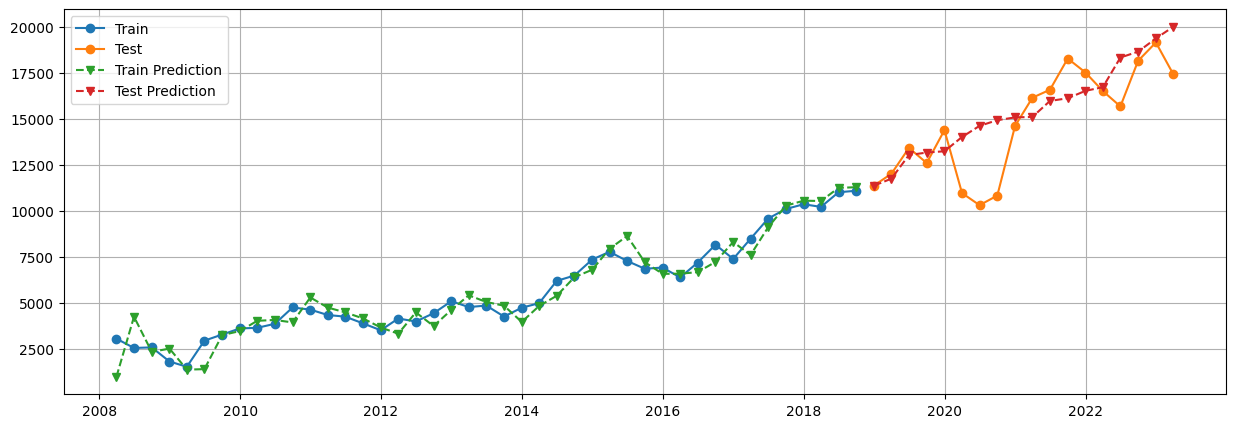

In [100]:
# Make predictions on the train set
train_pred = best_arima.predict_in_sample(X=train.drop(columns=train.columns[-1]))

# Plot the results for train set and test set
plt.figure(figsize=(15, 5))
plt.grid()
plt.plot(train.index, train.iloc[:, -1], marker='o', label='Train')
plt.plot(test.index, test.iloc[:, -1], marker='o', label='Test')
plt.plot(train.index, train_pred, marker='v', label='Train Prediction', linestyle='dashed')
plt.plot(test.index, pred, marker='v', label='Test Prediction', linestyle='dashed')
plt.legend()
plt.show()

## PREDICTION

In [101]:
# Creating output DataFrame for comparison
output = pd.DataFrame()
output['Test'] = test.iloc[:, -1]
output['Prediction'] = pred
output['Difference'] = output['Test'] - output['Prediction']
output['% Change'] = abs(output['Difference'] / output['Test']) * 100
output

Test  Prediction  Difference  % Change
Quarters                                             
2018-12-31 11386.25    11381.35        4.90      0.04
2019-03-31 12025.58    11759.44      266.14      2.21
2019-06-30 13426.43    13041.59      384.84      2.87
2019-09-30 12609.86    13176.83     -566.97      4.50
2019-12-31 14393.90    13246.65     1147.25      7.97
2020-03-31 10977.13    14020.15    -3043.03     27.72
2020-06-30 10319.75    14625.03    -4305.27     41.72
2020-09-30 10842.25    14934.02    -4091.77     37.74
2020-12-31 14620.49    15084.93     -464.44      3.18
2021-03-31 16153.80    15109.27     1044.54      6.47
2021-06-30 16585.60    15979.00      606.61      3.66
2021-09-30 18279.63    16122.59     2157.04     11.80
2021-12-31 17521.21    16526.88      994.33      5.68
2022-03-31 16514.49    16723.13     -208.64      1.26
2022-06-30 15681.66    18334.25    -2652.59     16.92
2022-09-30 18159.13    18654.14     -495.01      2.73
2022-12-31 19150.59    19370.47     -219.89      1.15
2023-03-31 17431.50    20003.22    -2571.72     14.75

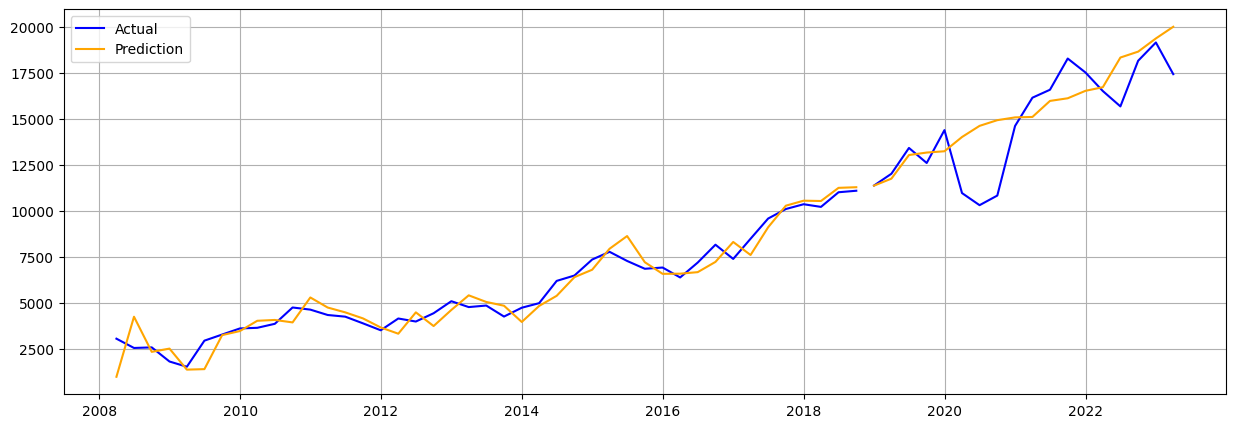

In [102]:
# Make predictions on the train set
train_pred = best_arima.predict_in_sample(X=train.drop(columns=train.columns[-1]))

# Plot the results for train set and test set
plt.figure(figsize=(15, 5))
plt.grid()

# Plot actual values for both train and test sets
plt.plot(train.index, train.iloc[:, -1], label='Actual', color='blue')
plt.plot(test.index, test.iloc[:, -1], color='blue')

# Plot predictions for both train and test sets
plt.plot(train.index, train_pred, label='Prediction', color='orange')
plt.plot(test.index, pred, color='orange')

plt.legend()
plt.show()


ARIMA (AutoRegressive Integrated Moving Average) and ARIMAX (AutoRegressive Integrated Moving Average with Exogenous Variables) are both time series modeling approaches, but they differ in terms of their incorporation of external factors and the complexity of their models. Here's a breakdown of the key differences between ARIMA and ARIMAX:

1. **ARIMA (AutoRegressive Integrated Moving Average):**
   - ARIMA models are used to forecast a time series based solely on its own historical values and the patterns observed within the series itself.
   - ARIMA models consist of three main components:
     - AutoRegressive (AR) terms: Utilize lagged values of the series to predict the current value. Represents the influence of past values on the present value.
     - Integrated (I) component: Involves differencing the series to achieve stationarity, which makes it easier to model and analyze. The differencing order (\(d\) parameter) indicates the number of times the series is differenced.
     - Moving Average (MA) terms: Use past forecast errors to predict the current value. Represents the impact of past errors on the present value.
   - ARIMA models do not include external factors or exogenous variables.

2. **ARIMAX (AutoRegressive Integrated Moving Average with Exogenous Variables):**
   - ARIMAX models extend the ARIMA framework by incorporating additional external factors, known as exogenous variables or covariates, that can influence the dependent variable (the time series being forecasted).
   - Exogenous variables could be factors like economic indicators, weather data, policy changes, etc., that are believed to affect the dependent variable.
   - ARIMAX models are denoted as SARIMAX(p,d,q)(P,D,Q)[s] with exogenous variables.
   - The exogenous variables are included in the model alongside the ARIMA components and can help capture variations in the dependent variable that are not explained by its own past values.

In summary, the key difference between ARIMA and ARIMAX lies in the inclusion of exogenous variables in the latter. While ARIMA focuses solely on the historical patterns of the time series itself, ARIMAX takes into account the influence of external factors on the time series by incorporating exogenous variables. The incorporation of exogenous variables makes ARIMAX models more suitable when external factors are expected to play a significant role in explaining the behavior of the time series.

The terms you've mentioned, "Log Likelihood," AIC (Akaike Information Criterion), BIC (Bayesian Information Criterion), and HQIC (Hannan-Quinn Information Criterion), are all related to statistical model selection and evaluation, particularly in the context of likelihood-based model comparisons. These metrics help in choosing the most appropriate model from a set of candidate models.

1. **Log Likelihood:**
The log likelihood is a measure of how well a statistical model explains the observed data. It quantifies the probability of the observed data given the parameters of the model. Higher log likelihood values indicate that the model better fits the data.

2. **AIC (Akaike Information Criterion):**
AIC is a model selection criterion that balances the goodness of fit of a model (measured by the log likelihood) with the complexity of the model. It penalizes models with more parameters to avoid overfitting. The AIC value for a model is calculated as -2 times the log likelihood plus 2 times the number of parameters in the model. Lower AIC values indicate better-fitting models.

3. **BIC (Bayesian Information Criterion):**
BIC is another model selection criterion that penalizes model complexity. Like AIC, it uses the log likelihood and the number of parameters, but the penalty for model complexity is stronger in BIC. The BIC value for a model is calculated as -2 times the log likelihood plus the logarithm of the number of data points times the number of parameters. Similar to AIC, lower BIC values indicate better-fitting models.

4. **HQIC (Hannan-Quinn Information Criterion):**
HQIC is another model selection criterion similar to AIC and BIC. It introduces a different penalty term for model complexity. The HQIC value for a model is calculated as -2 times the log likelihood plus 2 times the logarithm of the natural logarithm of the number of data points times the number of parameters. As with AIC and BIC, lower HQIC values indicate better-fitting models.

When comparing models using these criteria, you typically choose the model with the lowest AIC, BIC, or HQIC value, as this indicates the model that strikes the best balance between goodness of fit and model complexity.

It's important to note that while these criteria are useful, they are not definitive. Model selection should also consider domain knowledge, theoretical considerations, and other relevant factors.

Sure, here are the formulas for calculating AIC, BIC, and HQIC:

1. **AIC (Akaike Information Criterion):**
   AIC = -2 * Log Likelihood + 2 * Number of Parameters

2. **BIC (Bayesian Information Criterion):**
   BIC = -2 * Log Likelihood + Log(Number of Data Points) * Number of Parameters

3. **HQIC (Hannan-Quinn Information Criterion):**
   HQIC = -2 * Log Likelihood + 2 * Log(Log(Number of Data Points)) * Number of Parameters

In these formulas:

- **Log Likelihood:** This represents the logarithm of the likelihood function of the model given the data. It's a measure of how well the model fits the observed data.
- **Number of Parameters:** This refers to the number of parameters in the model. It indicates the complexity of the model.
- **Number of Data Points:** This is the total number of data points used in the analysis.

Remember that these criteria are used to compare models, and the model with the lowest value of AIC, BIC, or HQIC is often considered the best-fitting model among the candidate models. However, these criteria should be used in conjunction with other considerations, such as domain knowledge and theoretical understanding of the data and the models being compared.

The log likelihood value of -319.428 needs more context to be fully interpreted. Log likelihood is a measure used in statistics, particularly in the context of maximum likelihood estimation. It quantifies how well a statistical model explains or fits the observed data.

Here's how you can interpret the log likelihood value:

1. **Magnitude:** The magnitude of the log likelihood value itself doesn't hold a specific meaning on its own. What's important is comparing log likelihood values between different models or variations of the same model. Models with higher log likelihood values are considered to be a better fit to the data.

2. **Comparative Analysis:** If you have multiple models or variations of a model, you can compare their log likelihood values. The model with the highest log likelihood value is considered the best fit for the data among the options being compared.

3. **Model Fit:** In the context of maximum likelihood estimation, the goal is to find the parameter values that maximize the likelihood of the observed data. The log likelihood is used because it simplifies the calculations and properties of likelihood functions. When you maximize the log likelihood, you are essentially finding the parameter values that result in the best match between the model's predictions and the observed data.

4. **Negative Value:** The log likelihood value is typically negative. This is because the likelihood itself is a probability, and probabilities are between 0 and 1. Taking the logarithm of probabilities results in negative values, which makes calculations more manageable.

In summary, a log likelihood value of -319.428 indicates how well a specific model explains the observed data. However, for a more meaningful interpretation, you would need to compare this value to log likelihood values from other models to determine which model provides the best fit to the data.